In [2]:
%config Completer.use_jedi = False
# %matplotlib notebook
%matplotlib inline

import numpy as np
import math
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf

from scipy.io import mmread

# from scipy.sparse import csr_matrix
# from scipy.sparse import coo_matrix
# from scipy.sparse.csgraph import reverse_cuthill_mckee

from PIL import Image

In [3]:
pic_dim = pic_dim_x = pic_dim_y = 512

def density_RGB(den, dtx, dty):
    temp1 = 1.0 * den / ( dtx * dty) * (256**3)
    if temp1 == float("inf"):
        print('Infinity again')
        return (-1,-1,-1)
    else:
        temp = int(temp1)
        return ( temp / pic_dim**2 , (temp % pic_dim**2) / 256, (temp % pic_dim**2) % 256)

def datum_mapping(A):
    dim_x = A.shape[0]
    dim_y = A.shape[1]
    if dim_x != dim_y:
        print( 'Uneven array' )
        return []
    datum_x = dim_x // (pic_dim - 1)
    datum_y = dim_y // (pic_dim - 1)
    last_x = dim_x - datum_x * (pic_dim - 1)
    last_y = dim_y - datum_y * (pic_dim - 1)
#     print ( 'last_x = ' + str(last_x) + ' last_y = ' + str(last_y))
#     print ( 'Array of shape ('  + str(dim_x) + ',' + str(dim_y) + ') with nnz= ' + str(len(A.row)) +  ' has datum (' + str(datum_x) + ',' + str(datum_y) + ')')
    if datum_x==0 or datum_y==0:
#         print( '0 datum, terminating...')
        return []
    datum_density = np.zeros((pic_dim,pic_dim),dtype=np.int8)
    timer = time.clock()
    for col,row in zip (A.col, A.row) :
        dx  = min(row // datum_x, pic_dim - 1)    
        dy  = min(col // datum_x, pic_dim - 1)                    
        datum_density[dx][dy] = datum_density[dx][dy] + 1

    timer = time.clock() - timer
#     print ( "COO split time: " + str(timer))
    pic = np.zeros((pic_dim,pic_dim, 3), dtype=np.uint8)
    for i in range(0,(pic_dim - 1)):
        for j in range(0,(pic_dim - 1)):
            (pic[i][j][0], pic[i][j][1], pic[i][j][2]) = density_RGB(datum_density[i][j], datum_x, datum_y)
    if last_x != 0 and last_y !=0 :
        (pic[(pic_dim - 1)][(pic_dim - 1)][0], pic[(pic_dim - 1)][(pic_dim - 1)][1], pic[(pic_dim - 1)][(pic_dim - 1)][2]) = density_RGB(datum_density[(pic_dim - 1)][(pic_dim - 1)], last_x, last_y)
    return pic

def visualize_matrix_panastas(spm_coo, img_filename):
    pic = datum_mapping(spm_coo)
    img2 = Image.fromarray(pic, 'RGB')
    img2.save("/mnt/various/validation_matrices/panastas_images/"+img_filename)

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/scircuit.mtx",
"/mnt/various/validation_matrices/mac_econ_fwd500.mtx",
"/mnt/various/validation_matrices/raefsky3.mtx",
"/mnt/various/validation_matrices/bbmat.mtx",
"/mnt/various/validation_matrices/conf5_4-8x8-15.mtx",
"/mnt/various/validation_matrices/mc2depi.mtx",
"/mnt/various/validation_matrices/rma10.mtx",
"/mnt/various/validation_matrices/cop20k_A.mtx",
"/mnt/various/validation_matrices/webbase-1M.mtx",
"/mnt/various/validation_matrices/cant.mtx",
"/mnt/various/validation_matrices/pdb1HYS.mtx",
"/mnt/various/validation_matrices/TSOPF_RS_b300_c3.mtx",
"/mnt/various/validation_matrices/Chebyshev4.mtx",
"/mnt/various/validation_matrices/consph.mtx",
"/mnt/various/validation_matrices/shipsec1.mtx",
"/mnt/various/validation_matrices/PR02R.mtx",
"/mnt/various/validation_matrices/mip1.mtx",
# "/mnt/various/validation_matrices/rail4284.mtx",
"/mnt/various/validation_matrices/pwtk.mtx",
"/mnt/various/validation_matrices/crankseg_2.mtx",
"/mnt/various/validation_matrices/Si41Ge41H72.mtx",
"/mnt/various/validation_matrices/TSOPF_RS_b2383.mtx",
"/mnt/various/validation_matrices/in-2004.mtx",
"/mnt/various/validation_matrices/Ga41As41H72.mtx",
"/mnt/various/validation_matrices/eu-2005.mtx",
"/mnt/various/validation_matrices/wikipedia-20051105.mtx",
"/mnt/various/validation_matrices/rajat31.mtx",
"/mnt/various/validation_matrices/ldoor.mtx",
"/mnt/various/validation_matrices/circuit5M.mtx",
"/mnt/various/validation_matrices/bone010.mtx",
"/mnt/various/validation_matrices/cage15.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix_panastas(spm_coo, img_filename)

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/pwtk.mtx",
"/mnt/various/validation_matrices/crankseg_2.mtx",
"/mnt/various/validation_matrices/Si41Ge41H72.mtx",
"/mnt/various/validation_matrices/TSOPF_RS_b2383.mtx",
"/mnt/various/validation_matrices/in-2004.mtx",
"/mnt/various/validation_matrices/Ga41As41H72.mtx",
"/mnt/various/validation_matrices/eu-2005.mtx",
"/mnt/various/validation_matrices/wikipedia-20051105.mtx",
"/mnt/various/validation_matrices/rajat31.mtx",
"/mnt/various/validation_matrices/ldoor.mtx",
"/mnt/various/validation_matrices/circuit5M.mtx",
"/mnt/various/validation_matrices/bone010.mtx",
"/mnt/various/validation_matrices/cage15.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix_panastas(spm_coo, img_filename)

---

In [11]:
def mmread_fun(filename):
    start = time.time()
    ###################################################################
    spm_coo = mmread(filename)
    filename = filename.split("/")[-1]

    nr_rows = spm_coo.get_shape()[0]
    nr_cols = spm_coo.get_shape()[1]
    nr_nnzs = spm_coo.getnnz()
    spm = spm_coo.tocsr()
    row_ptr = spm.indptr
    col_ind = spm.indices
    values = spm.data

    mem_footprint = round((row_ptr.nbytes + col_ind.nbytes + values.nbytes)/(1024*1024),3)
    print(filename, ":\tdimensions", spm_coo.get_shape(), "/ nnz", spm_coo.getnnz(),"/ mem footprint",mem_footprint,'MB (CSR)')
    ###################################################################
    end = time.time()
    print(">>> Took me", round(end-start,3), "seconds to read matrix")
    return spm_coo, spm

max_dim = 1024
max_ratio = 16
# old - my way
def visualize_matrix(spm_coo, img_filename):
    start = time.time()
    ###################################################################
    rows = spm_coo.get_shape()[0]
    cols = spm_coo.get_shape()[1]
    if(rows==0 or cols==0):
        ratio = 1
    else:
        ratio = rows/cols
        if(ratio>max_ratio):
            ratio = max_ratio # to be able to plot something that is barely visible, unfortunately can't do something for this!
        if(ratio<(1/max_ratio)):
            ratio = 1/max_ratio # to be able to plot something that is barely visible, unfortunately can't do something for this!
    if(ratio>1):
        v_dim_x = max_dim
        v_dim_y = math.ceil(v_dim_x/ratio)        
    else:
        v_dim_y = max_dim
        v_dim_x = math.ceil(v_dim_y*ratio)
    
    visual = np.zeros((v_dim_x, v_dim_y))     # perhaps add 3 dimensions in the future, for density of each pixel   
    factor_r = math.ceil(rows/v_dim_x)
    factor_c = math.ceil(cols/v_dim_y)
    for i in range(len(spm_coo.data)):
        row = spm_coo.row[i]
        col = spm_coo.col[i]
        val = spm_coo.data[i]
        v_row = math.floor(row/factor_r)
        v_col = math.floor(col/factor_c)  
        visual[v_row][v_col] += 1
#         print(row, '->', v_row, '\t\t', col, '->' , v_col)
#         if(i%100000 == 0):
#             print(i)
#             img = Image.fromarray(visual*1.0/visual.max(),'RGB')
#             img.show()
    ###################################################################
    end = time.time()
    print(">>> Took me", round(end-start,3), "seconds to create image of matrix")
    start = time.time()
    ###################################################################
    fig = gcf()
    fig.set_size_inches(64, 64)
    plt.spy(visual[:,:], markersize=1)
    
    locs, labels = plt.xticks()
    labels = [int(item*factor_c) for item in locs[1:-1]]
    plt.xticks(locs[1:-1], labels)
    locs, labels = plt.yticks()
    labels = [int(item*factor_r) for item in locs[1:-1]]
    plt.yticks(locs[1:-1], labels)

    plt.title(img_filename)
    plt.show()
    # fig.savefig("generated_matrices/images/"+img_filename, dpi=100, bbox_inches='tight')
    fig.savefig("/mnt/various/SpMV-Research/validation_matrices/v2_dgal/images/"+img_filename, dpi=100, bbox_inches='tight')
    
    ###################################################################
    end = time.time()
    print(">>> Took me", round(end-start,3), "seconds to plot and save image of matrix\n\n")
    
# # do it with Octave, to save new matrix too - DEPRECATED
# def reverse_cuthill_mckee_conversion(spm_coo, spm):
#     rcm_perm = reverse_cuthill_mckee(csr_matrix(spm))
#     rev_perm_dict = {k : rcm_perm.tolist().index(k) for k in rcm_perm}
#     perm_i = [rev_perm_dict[ii] for ii in spm_coo.row]
#     perm_j = [rev_perm_dict[jj] for jj in spm_coo.col]
#     spm_coo_rcm = coo_matrix((spm_coo.data, (perm_i, perm_j)))
#     return spm_coo_rcm

synthetic_4284_4284_9017780_avg2104.991_std764.374_random_bw1.0_skew20.33_n14.mtx :	dimensions (4284, 4284) / nnz 9017780 / mem footprint 103.217 MB (CSR)
>>> Took me 12.074 seconds to read matrix
>>> Took me 52.712 seconds to create image of matrix


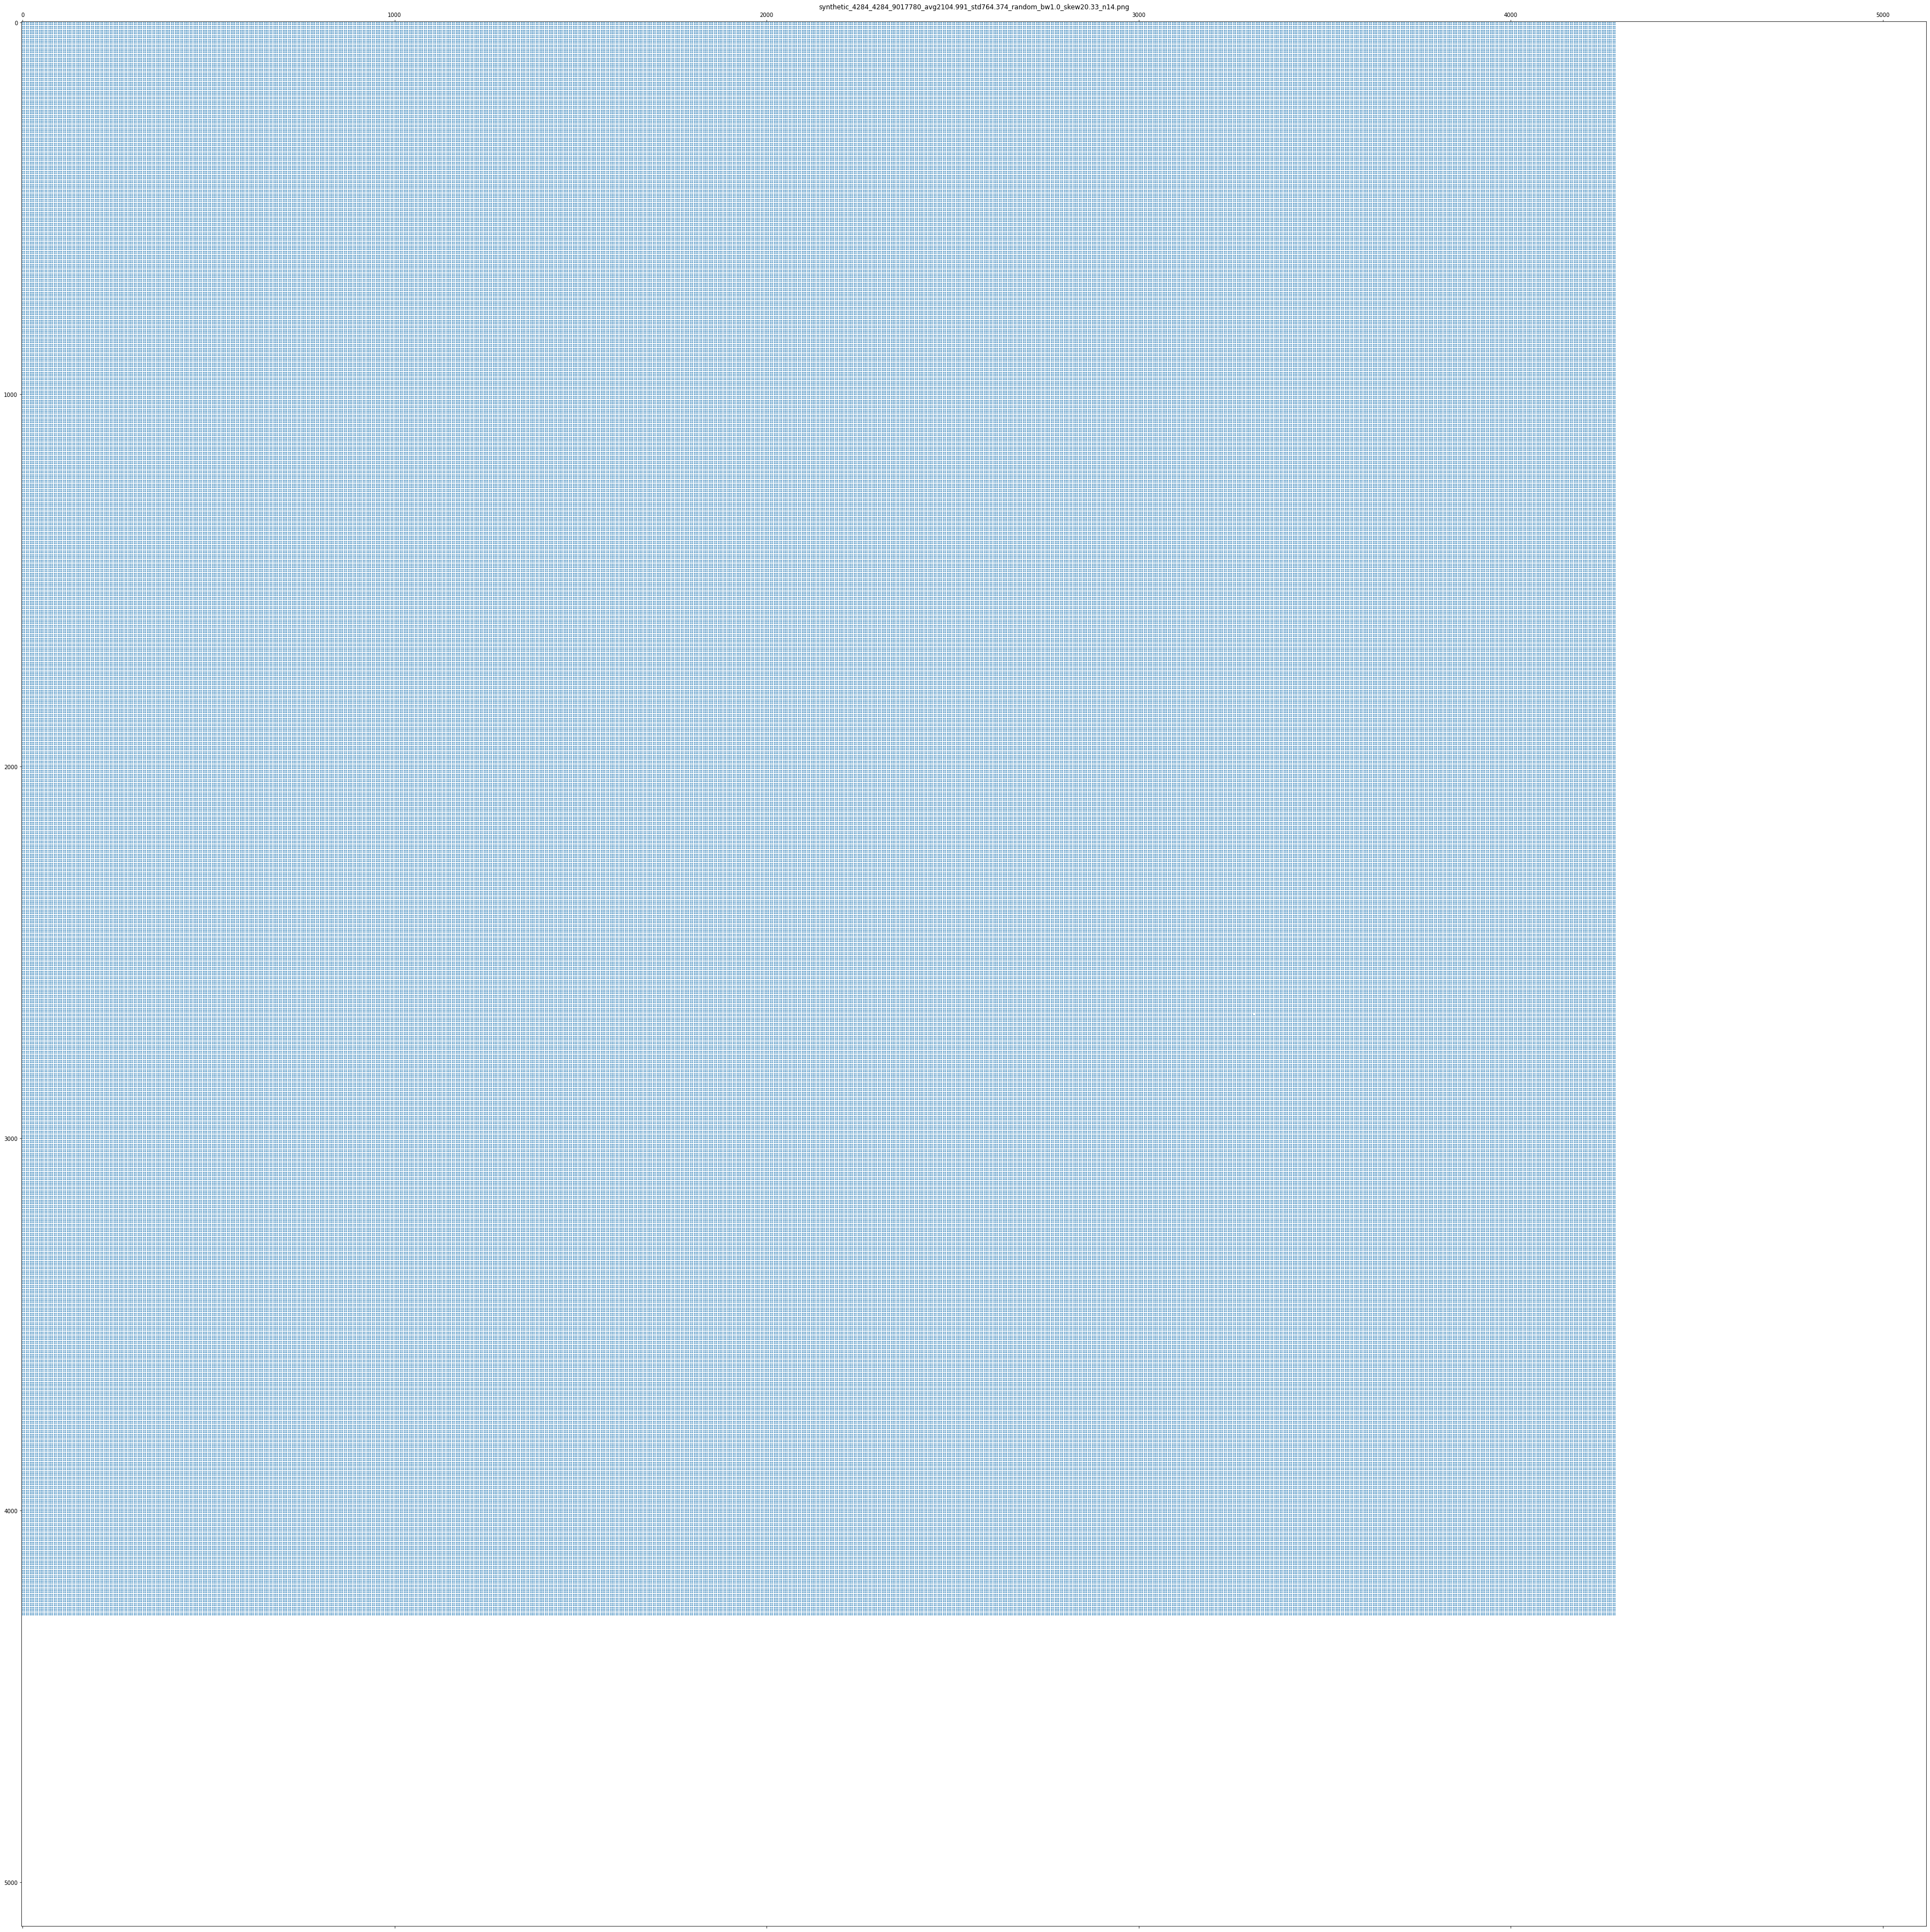

>>> Took me 3.163 seconds to plot and save image of matrix


synthetic_21200_21200_1488681_avg70.221_std6.341_random_bw0.066_skew0.139_n14.mtx :	dimensions (21200, 21200) / nnz 1488681 / mem footprint 17.117 MB (CSR)
>>> Took me 3.412 seconds to read matrix
>>> Took me 9.821 seconds to create image of matrix


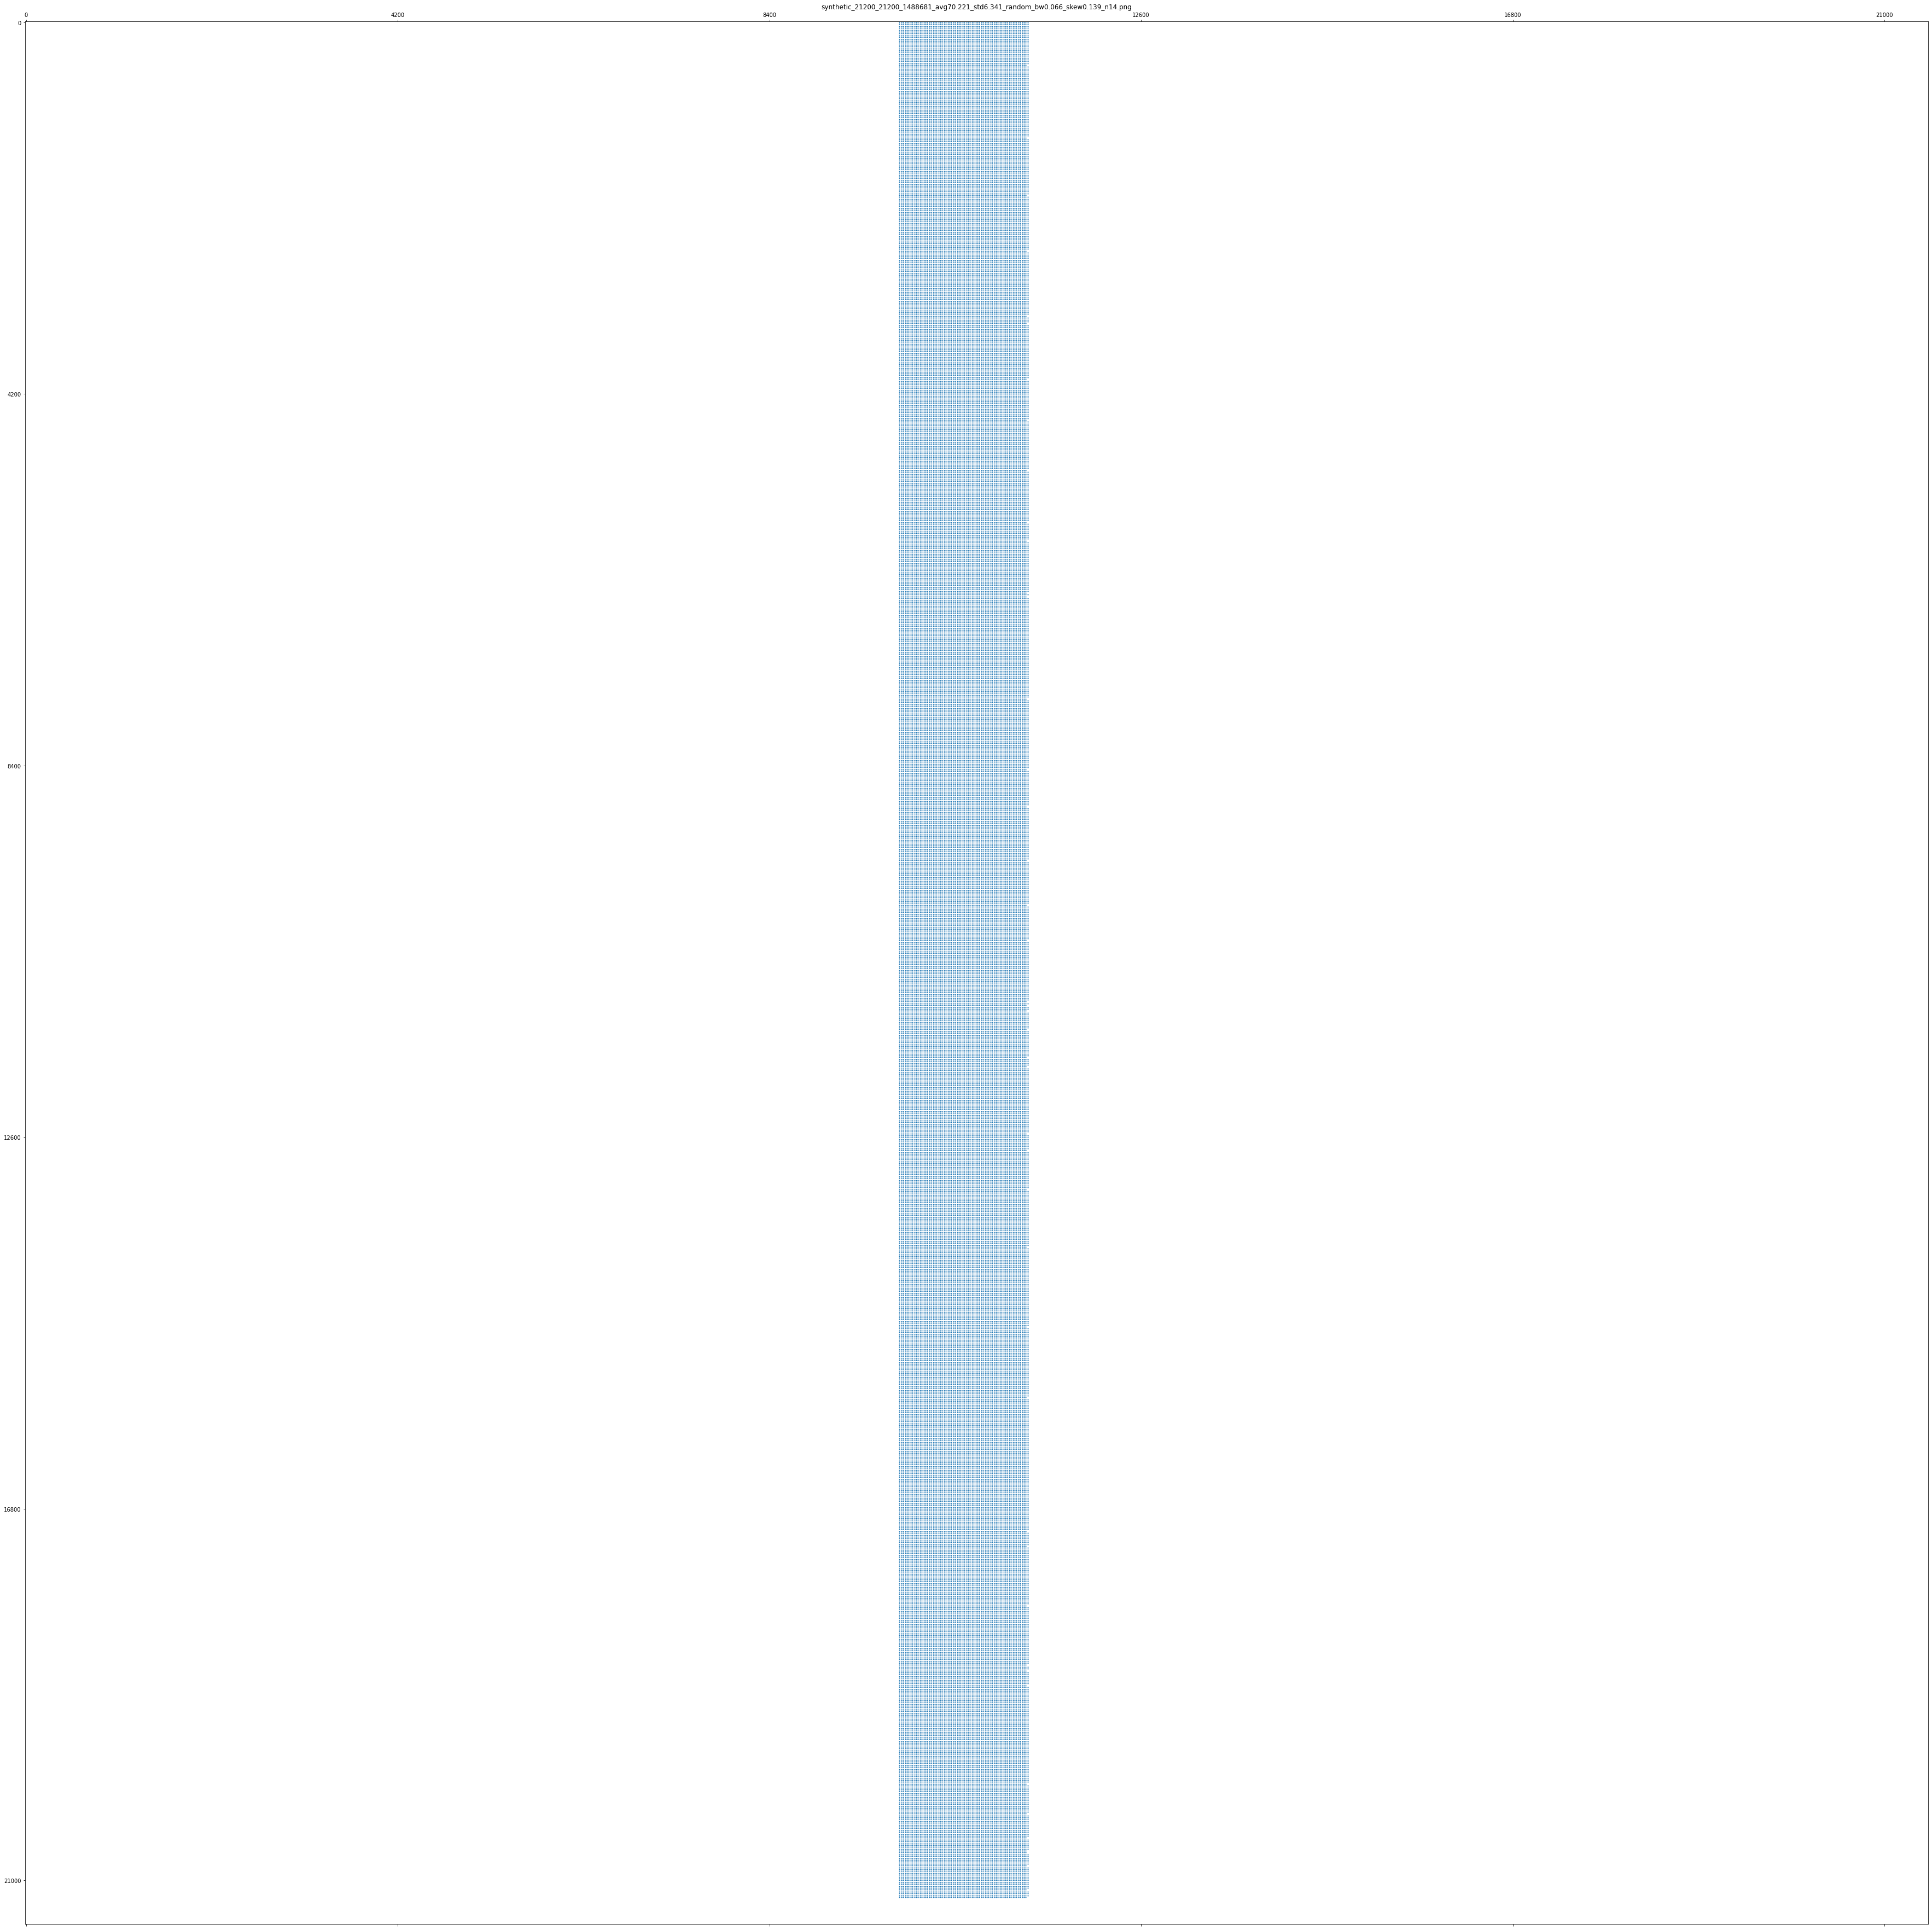

>>> Took me 3.441 seconds to plot and save image of matrix


synthetic_36417_36417_4343880_avg119.282_std31.869_random_bw0.13_skew0.71_n14.mtx :	dimensions (36417, 36417) / nnz 4343880 / mem footprint 49.851 MB (CSR)
>>> Took me 10.812 seconds to read matrix
>>> Took me 26.348 seconds to create image of matrix


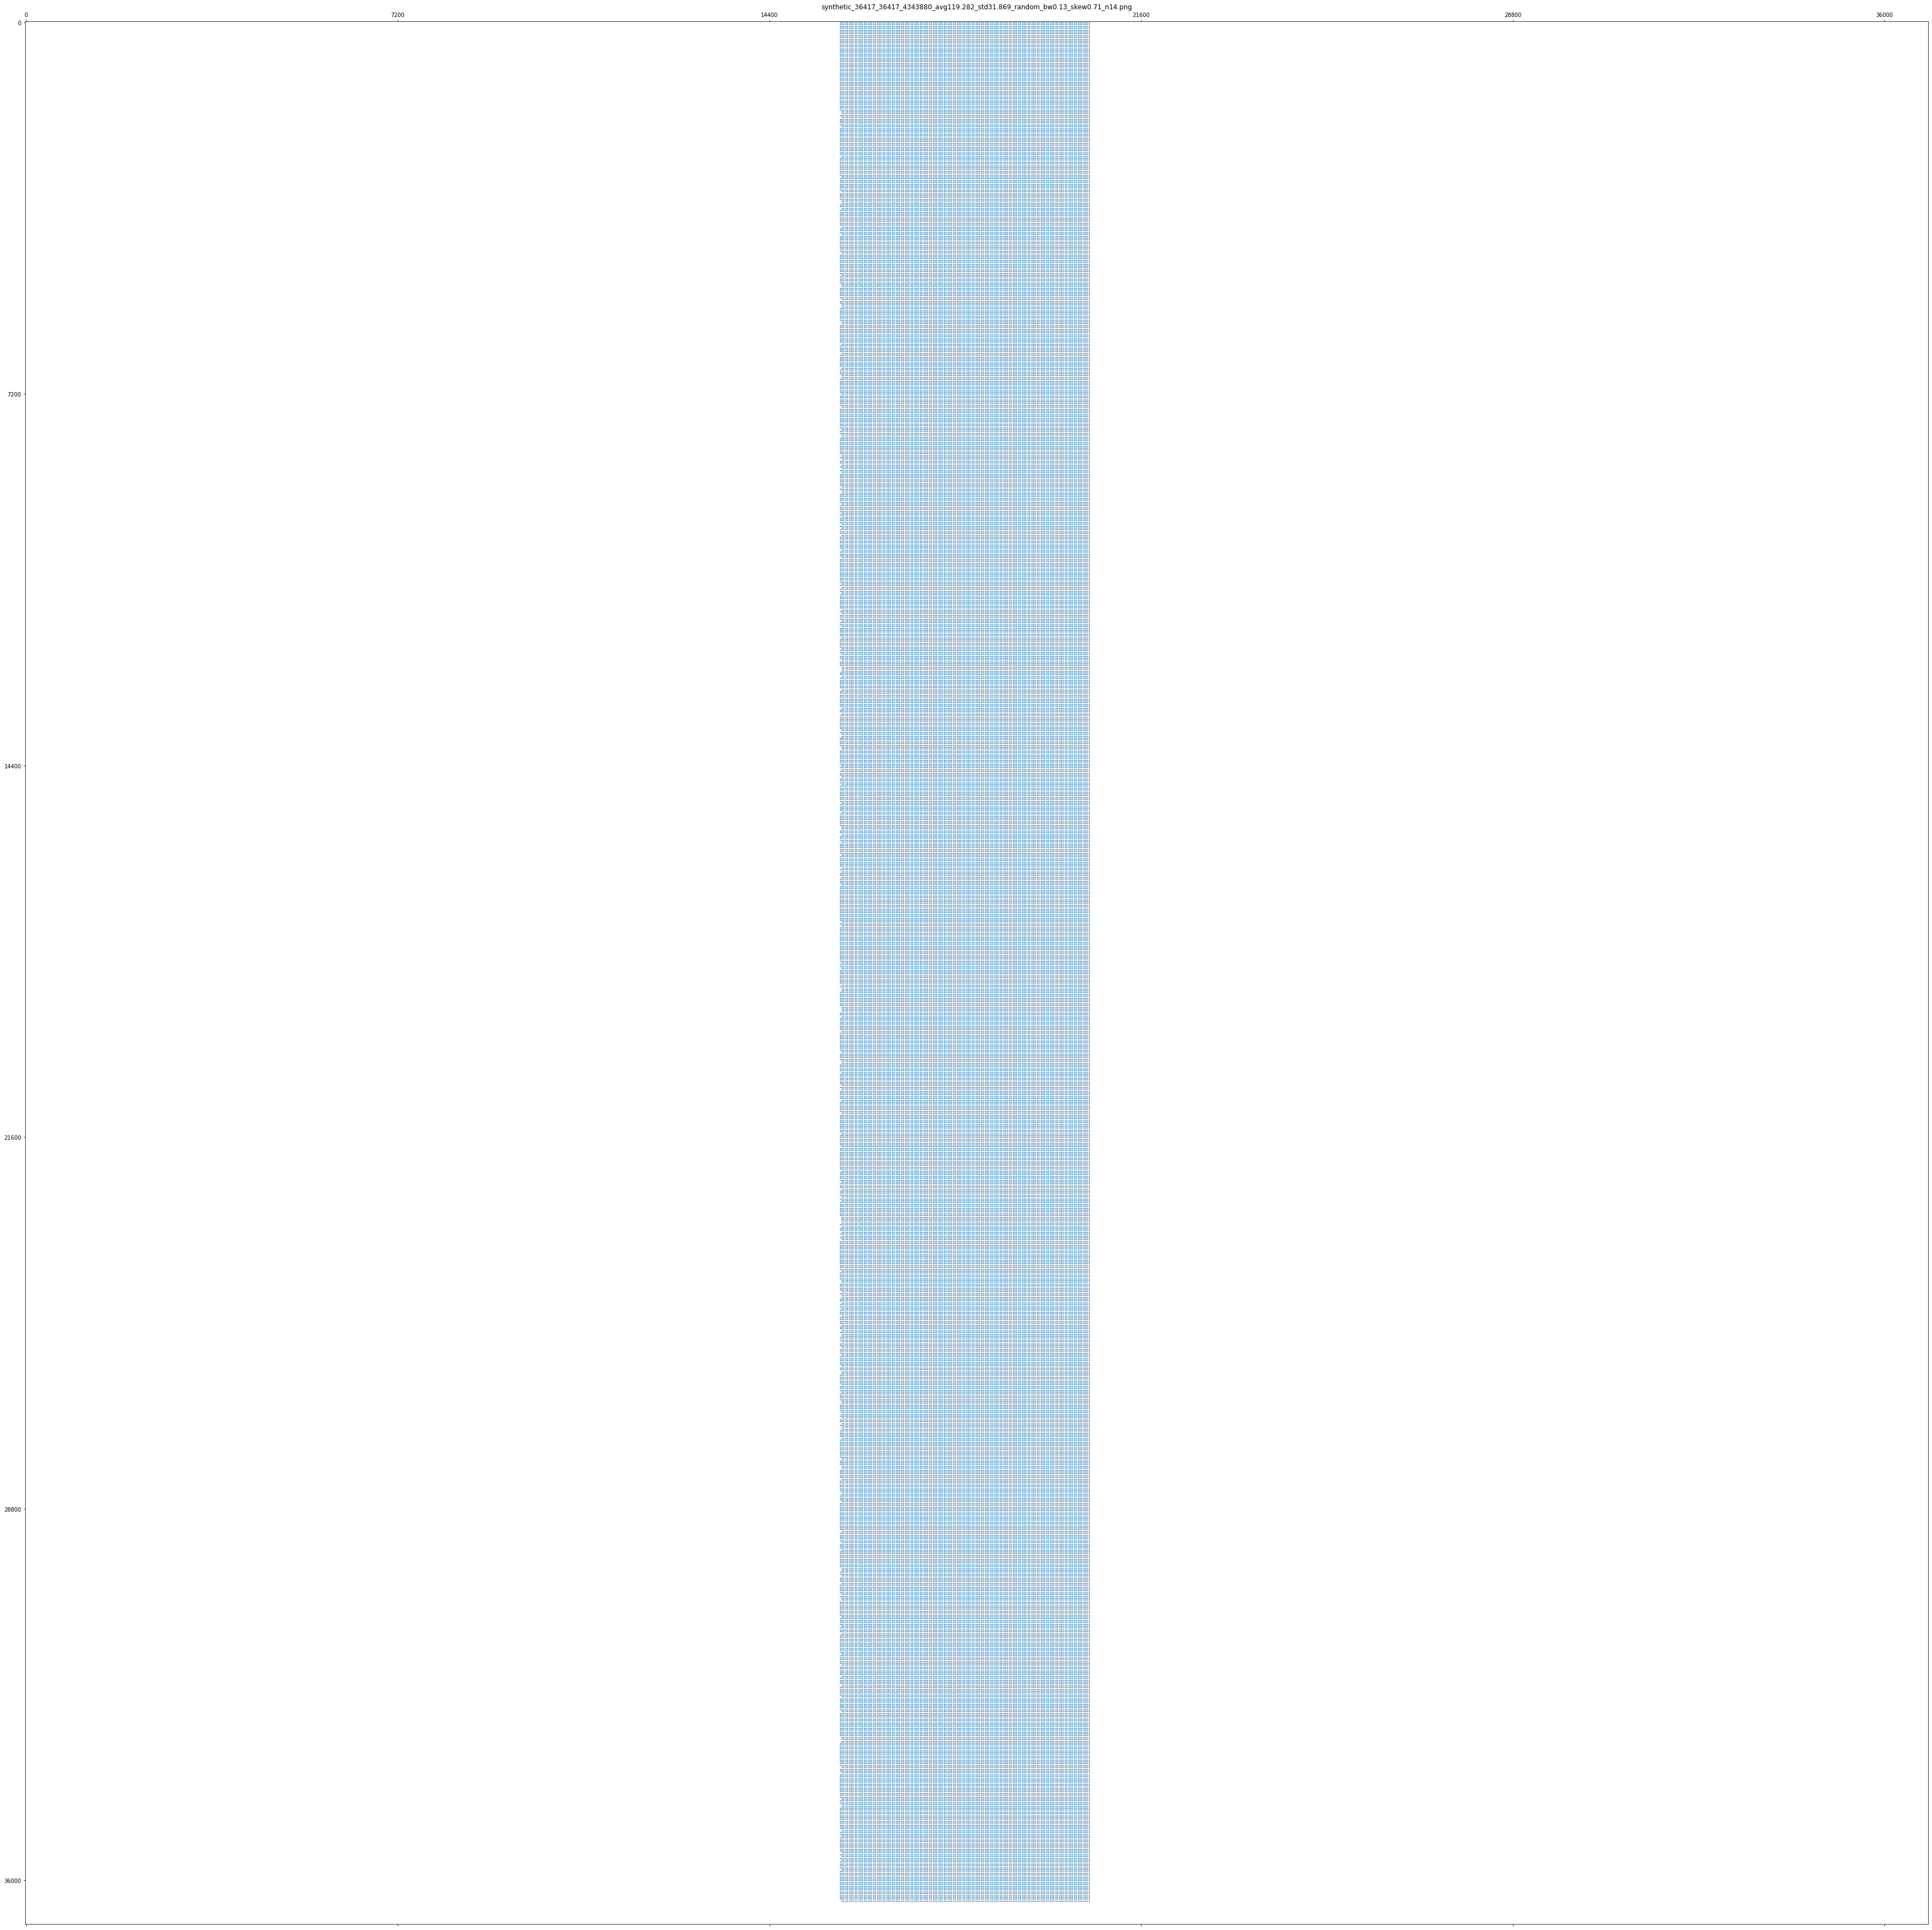

>>> Took me 2.371 seconds to plot and save image of matrix


synthetic_38120_38120_14577949_avg382.423_std245.445_random_bw0.482_skew1.317_n14.mtx :	dimensions (38120, 38120) / nnz 14577949 / mem footprint 166.977 MB (CSR)
>>> Took me 38.973 seconds to read matrix
>>> Took me 89.316 seconds to create image of matrix


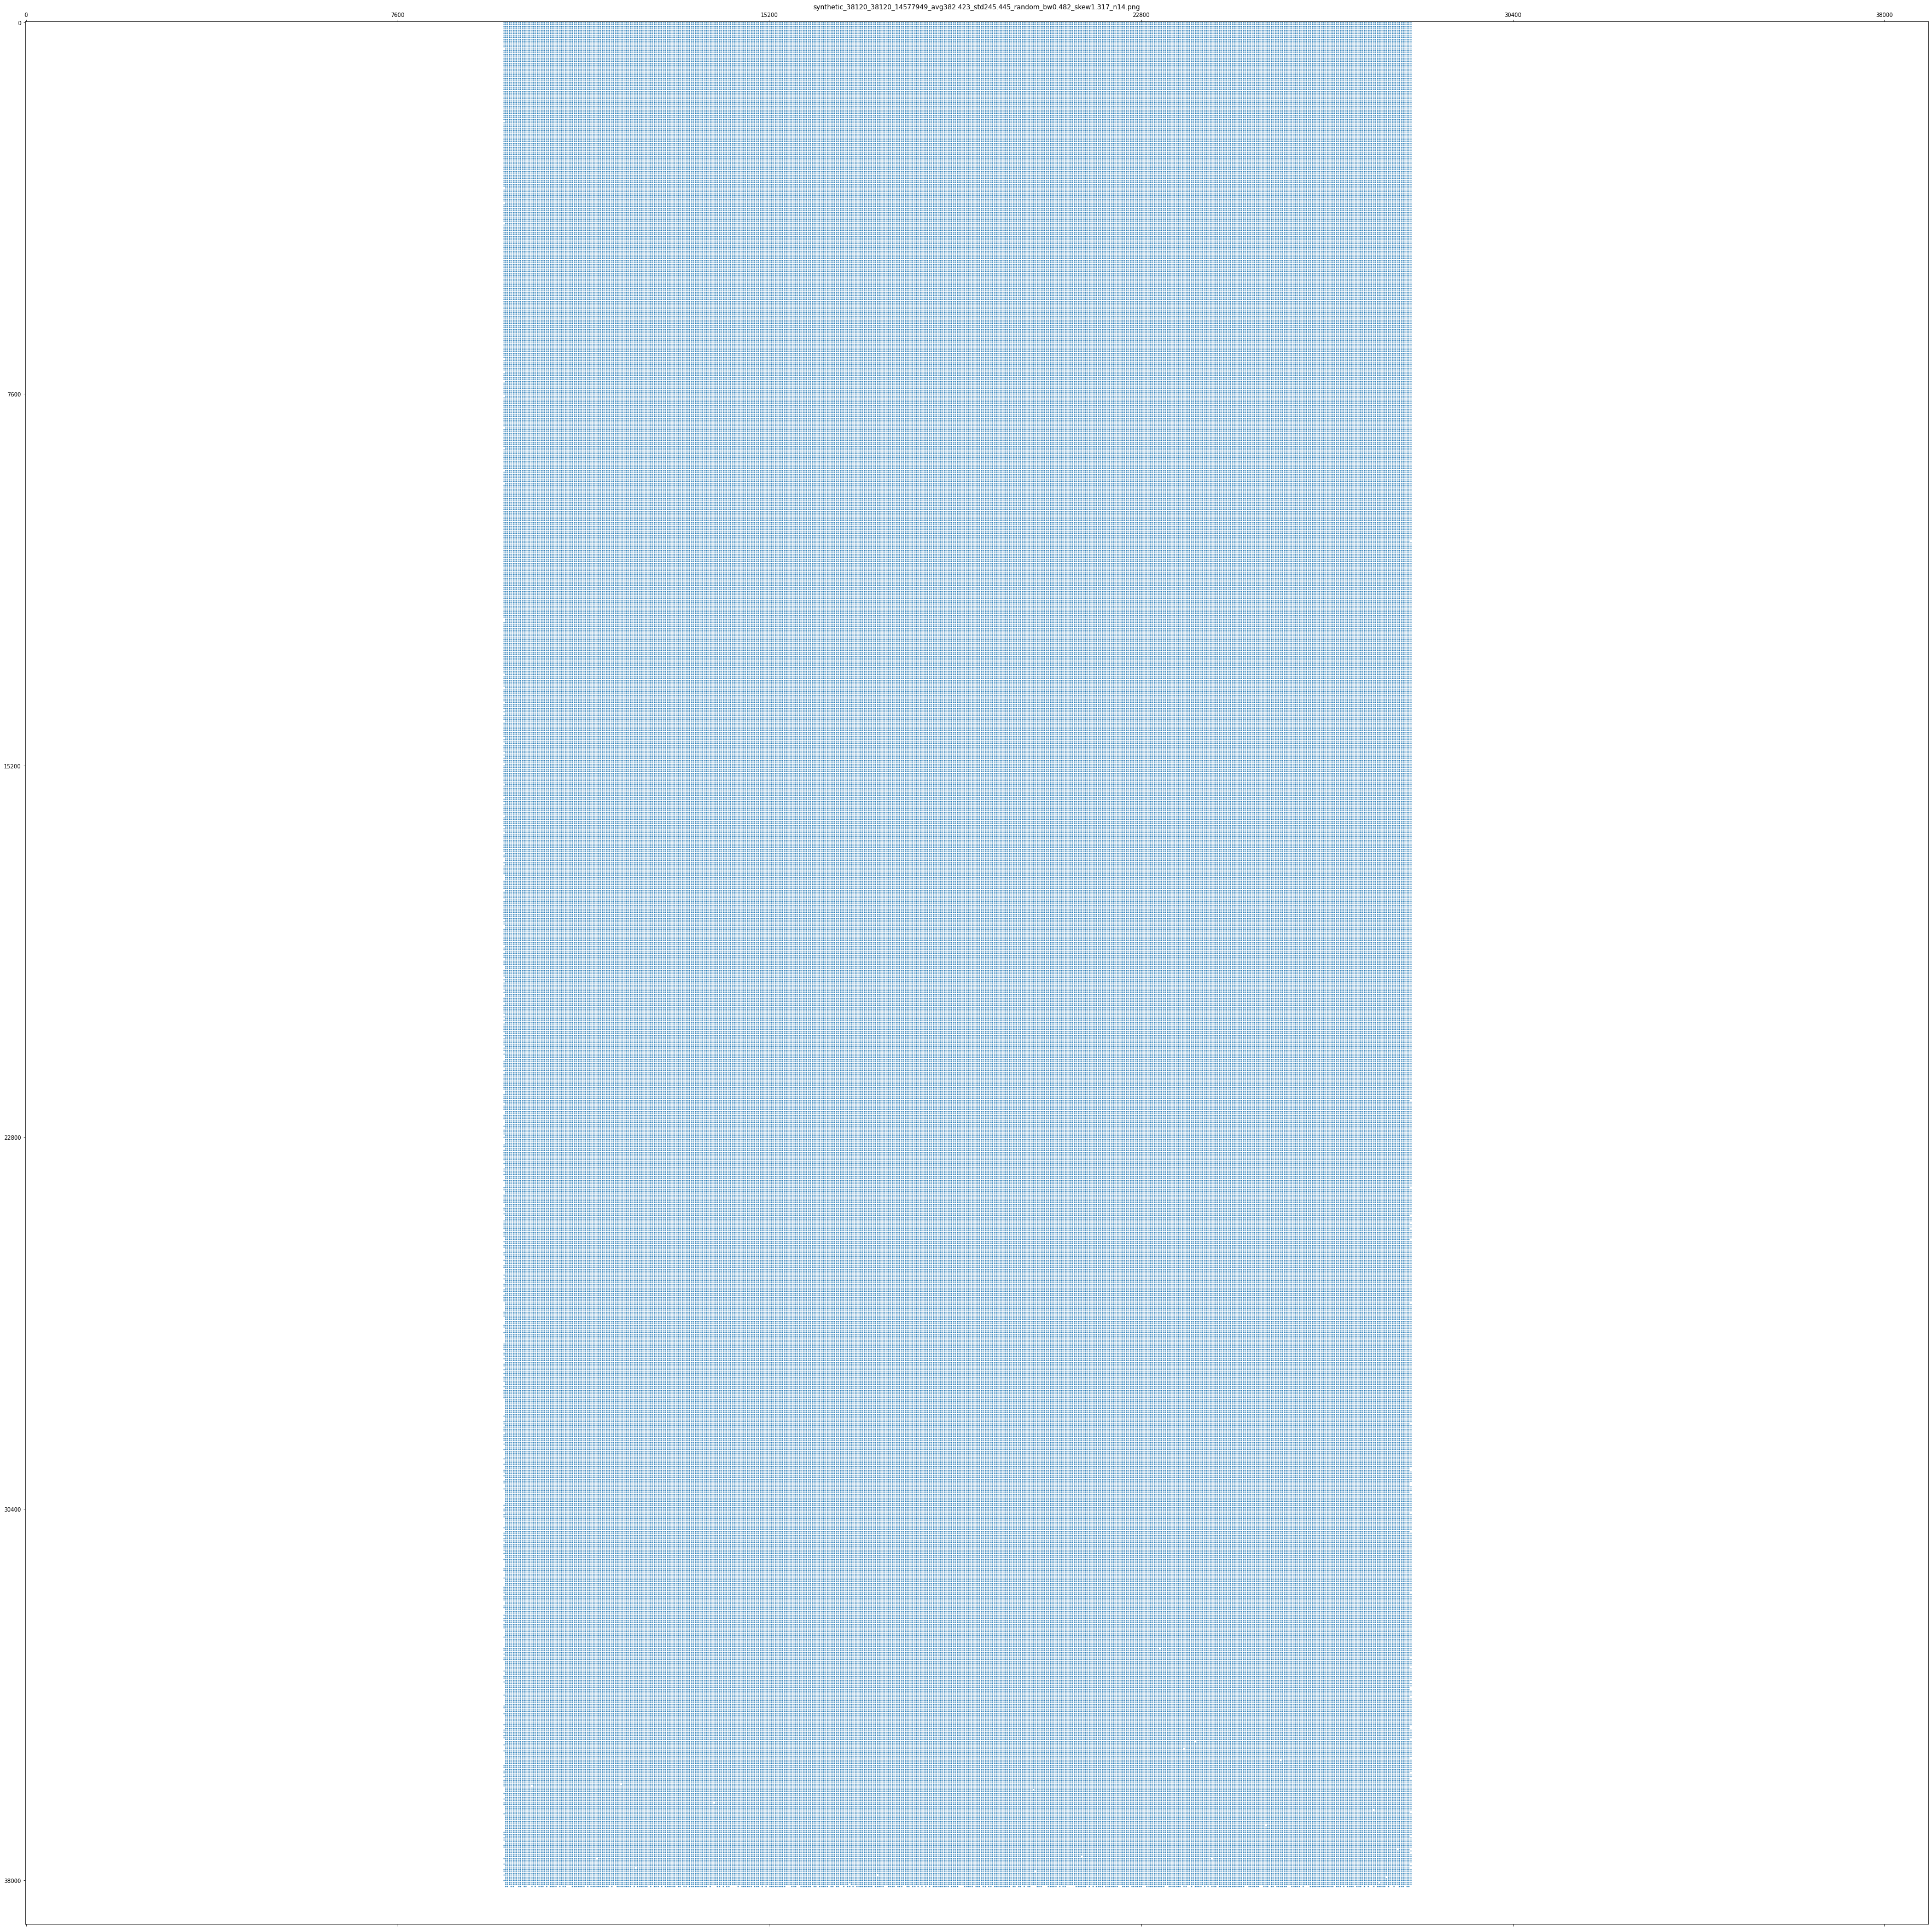

>>> Took me 3.013 seconds to plot and save image of matrix


synthetic_38744_38744_1768999_avg45.659_std31.436_random_bw0.029_skew1.755_n14.mtx :	dimensions (38744, 38744) / nnz 1768999 / mem footprint 20.392 MB (CSR)
>>> Took me 2.814 seconds to read matrix
>>> Took me 11.139 seconds to create image of matrix


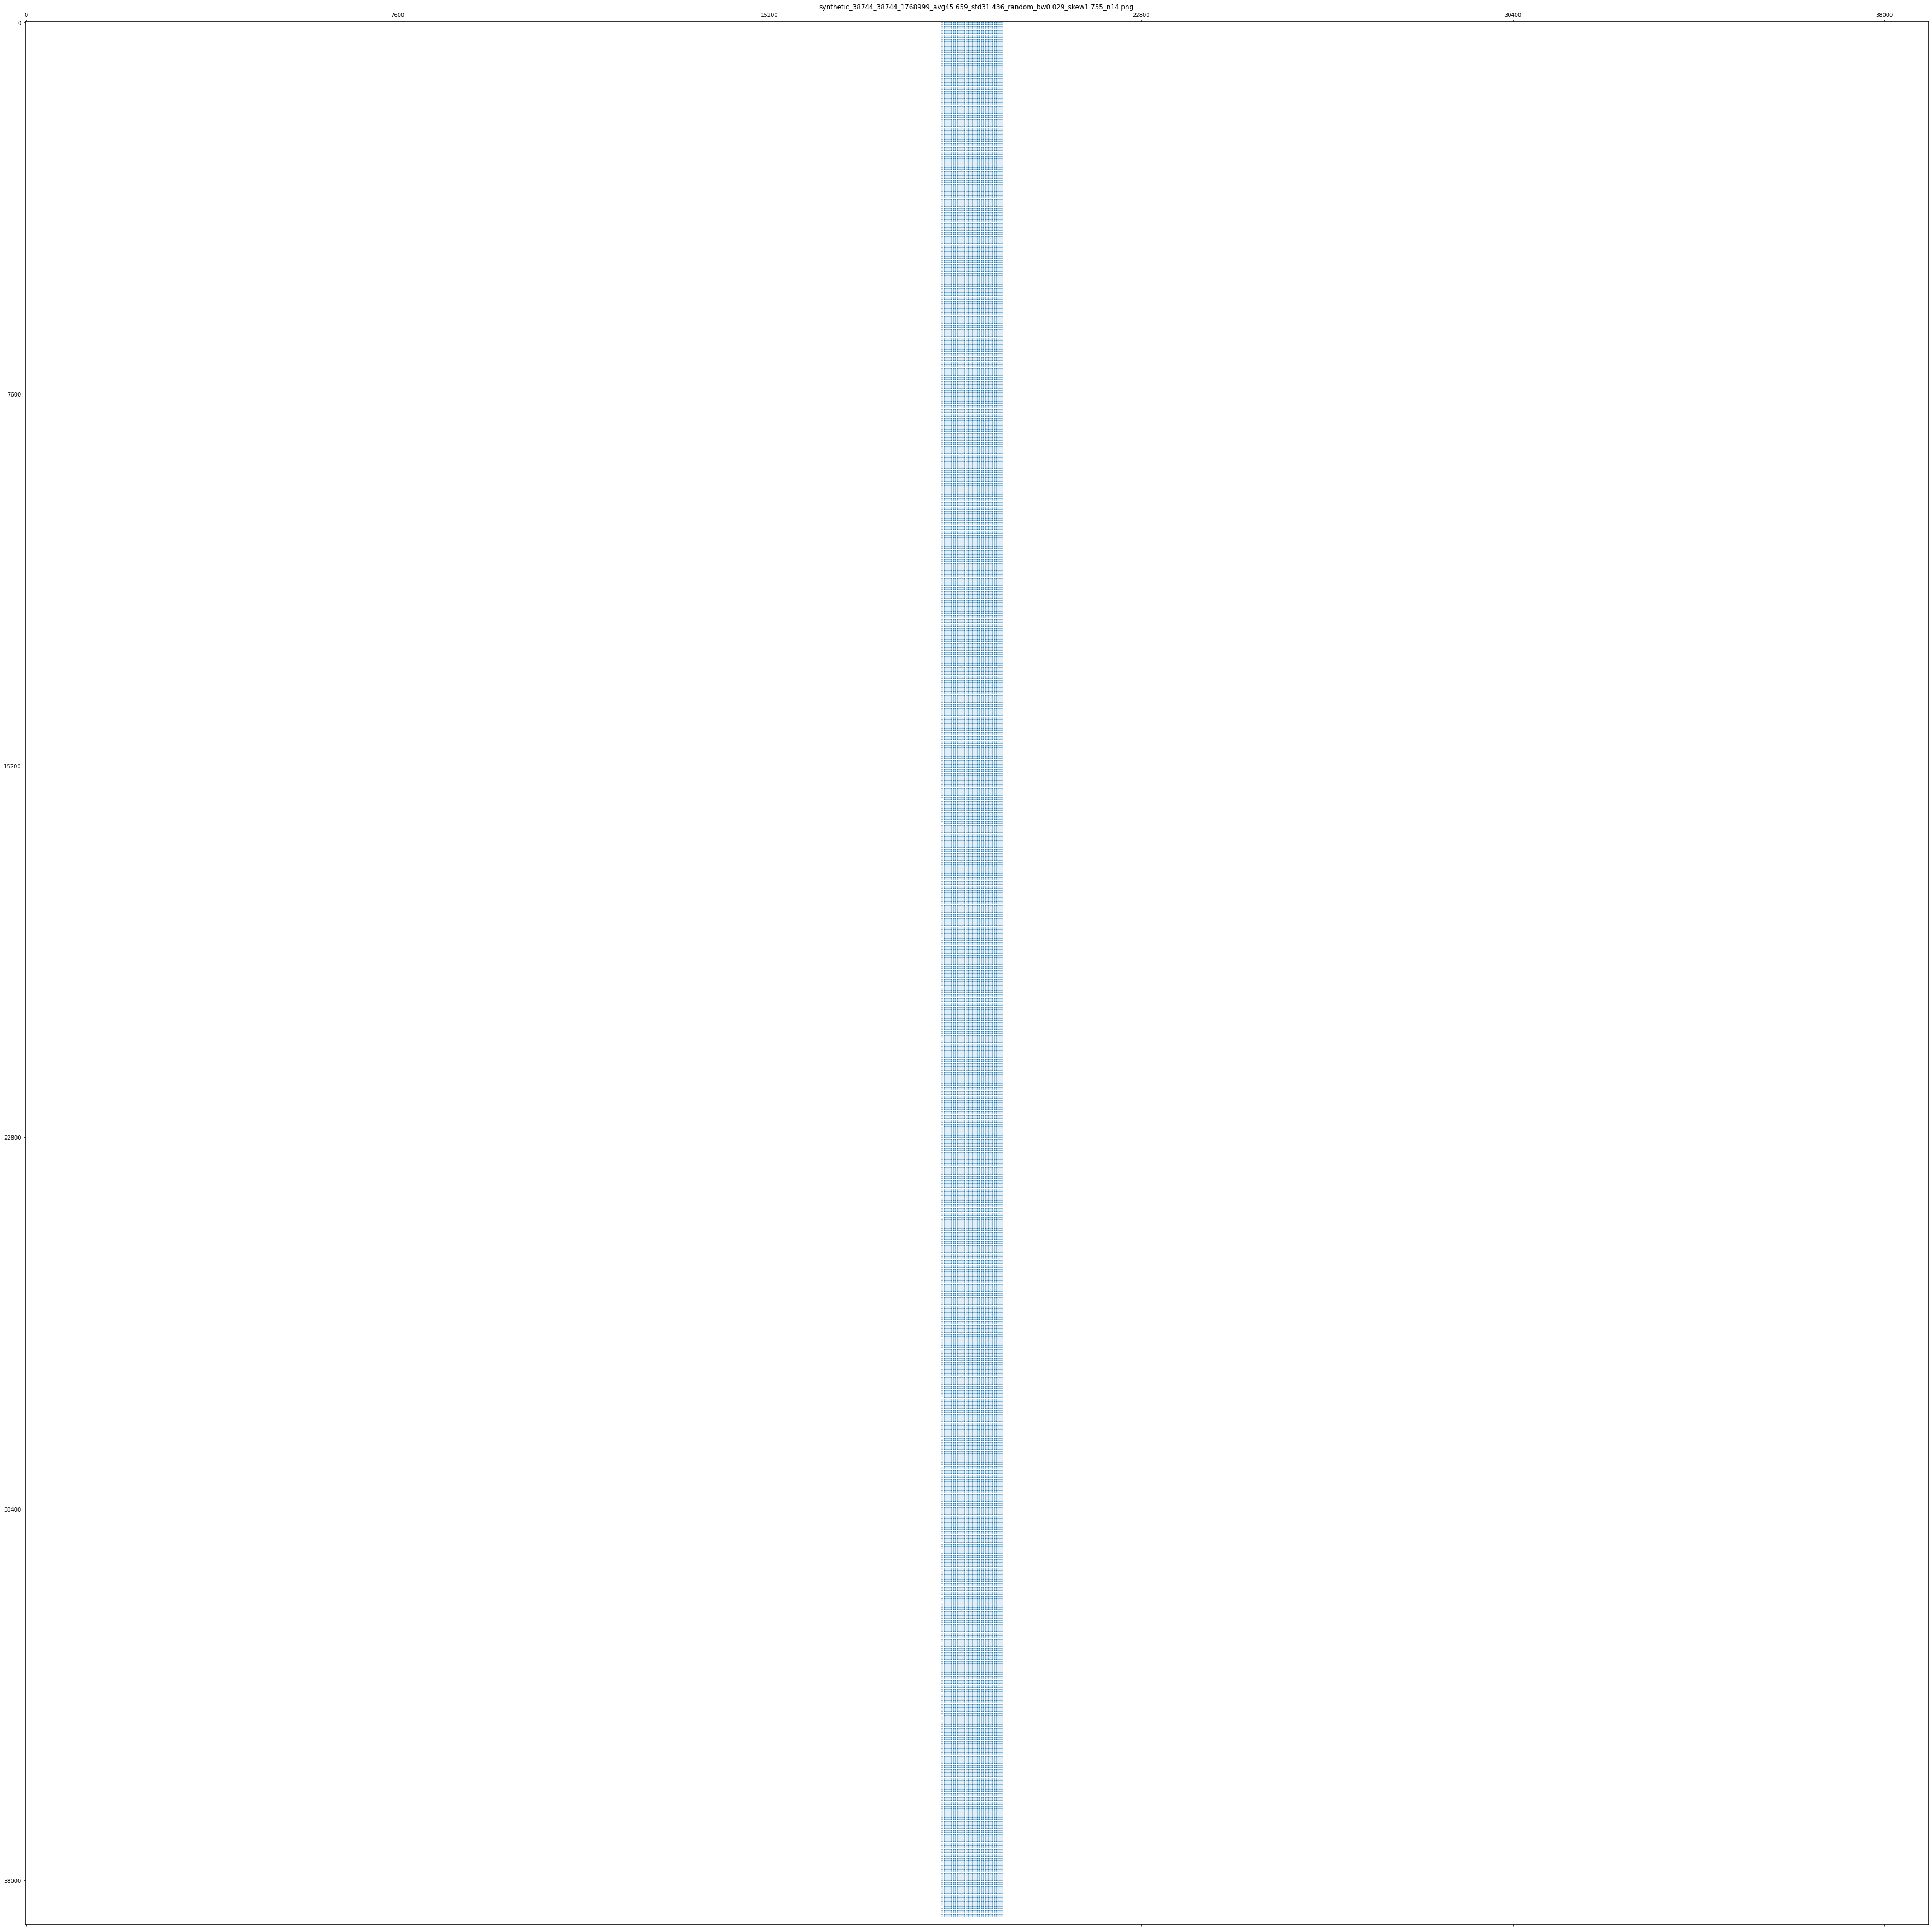

>>> Took me 2.591 seconds to plot and save image of matrix


synthetic_42138_42138_3884671_avg92.189_std51.06_random_bw0.602_skew0.995_n14.mtx :	dimensions (42138, 42138) / nnz 3884671 / mem footprint 44.617 MB (CSR)
>>> Took me 7.475 seconds to read matrix
>>> Took me 24.149 seconds to create image of matrix


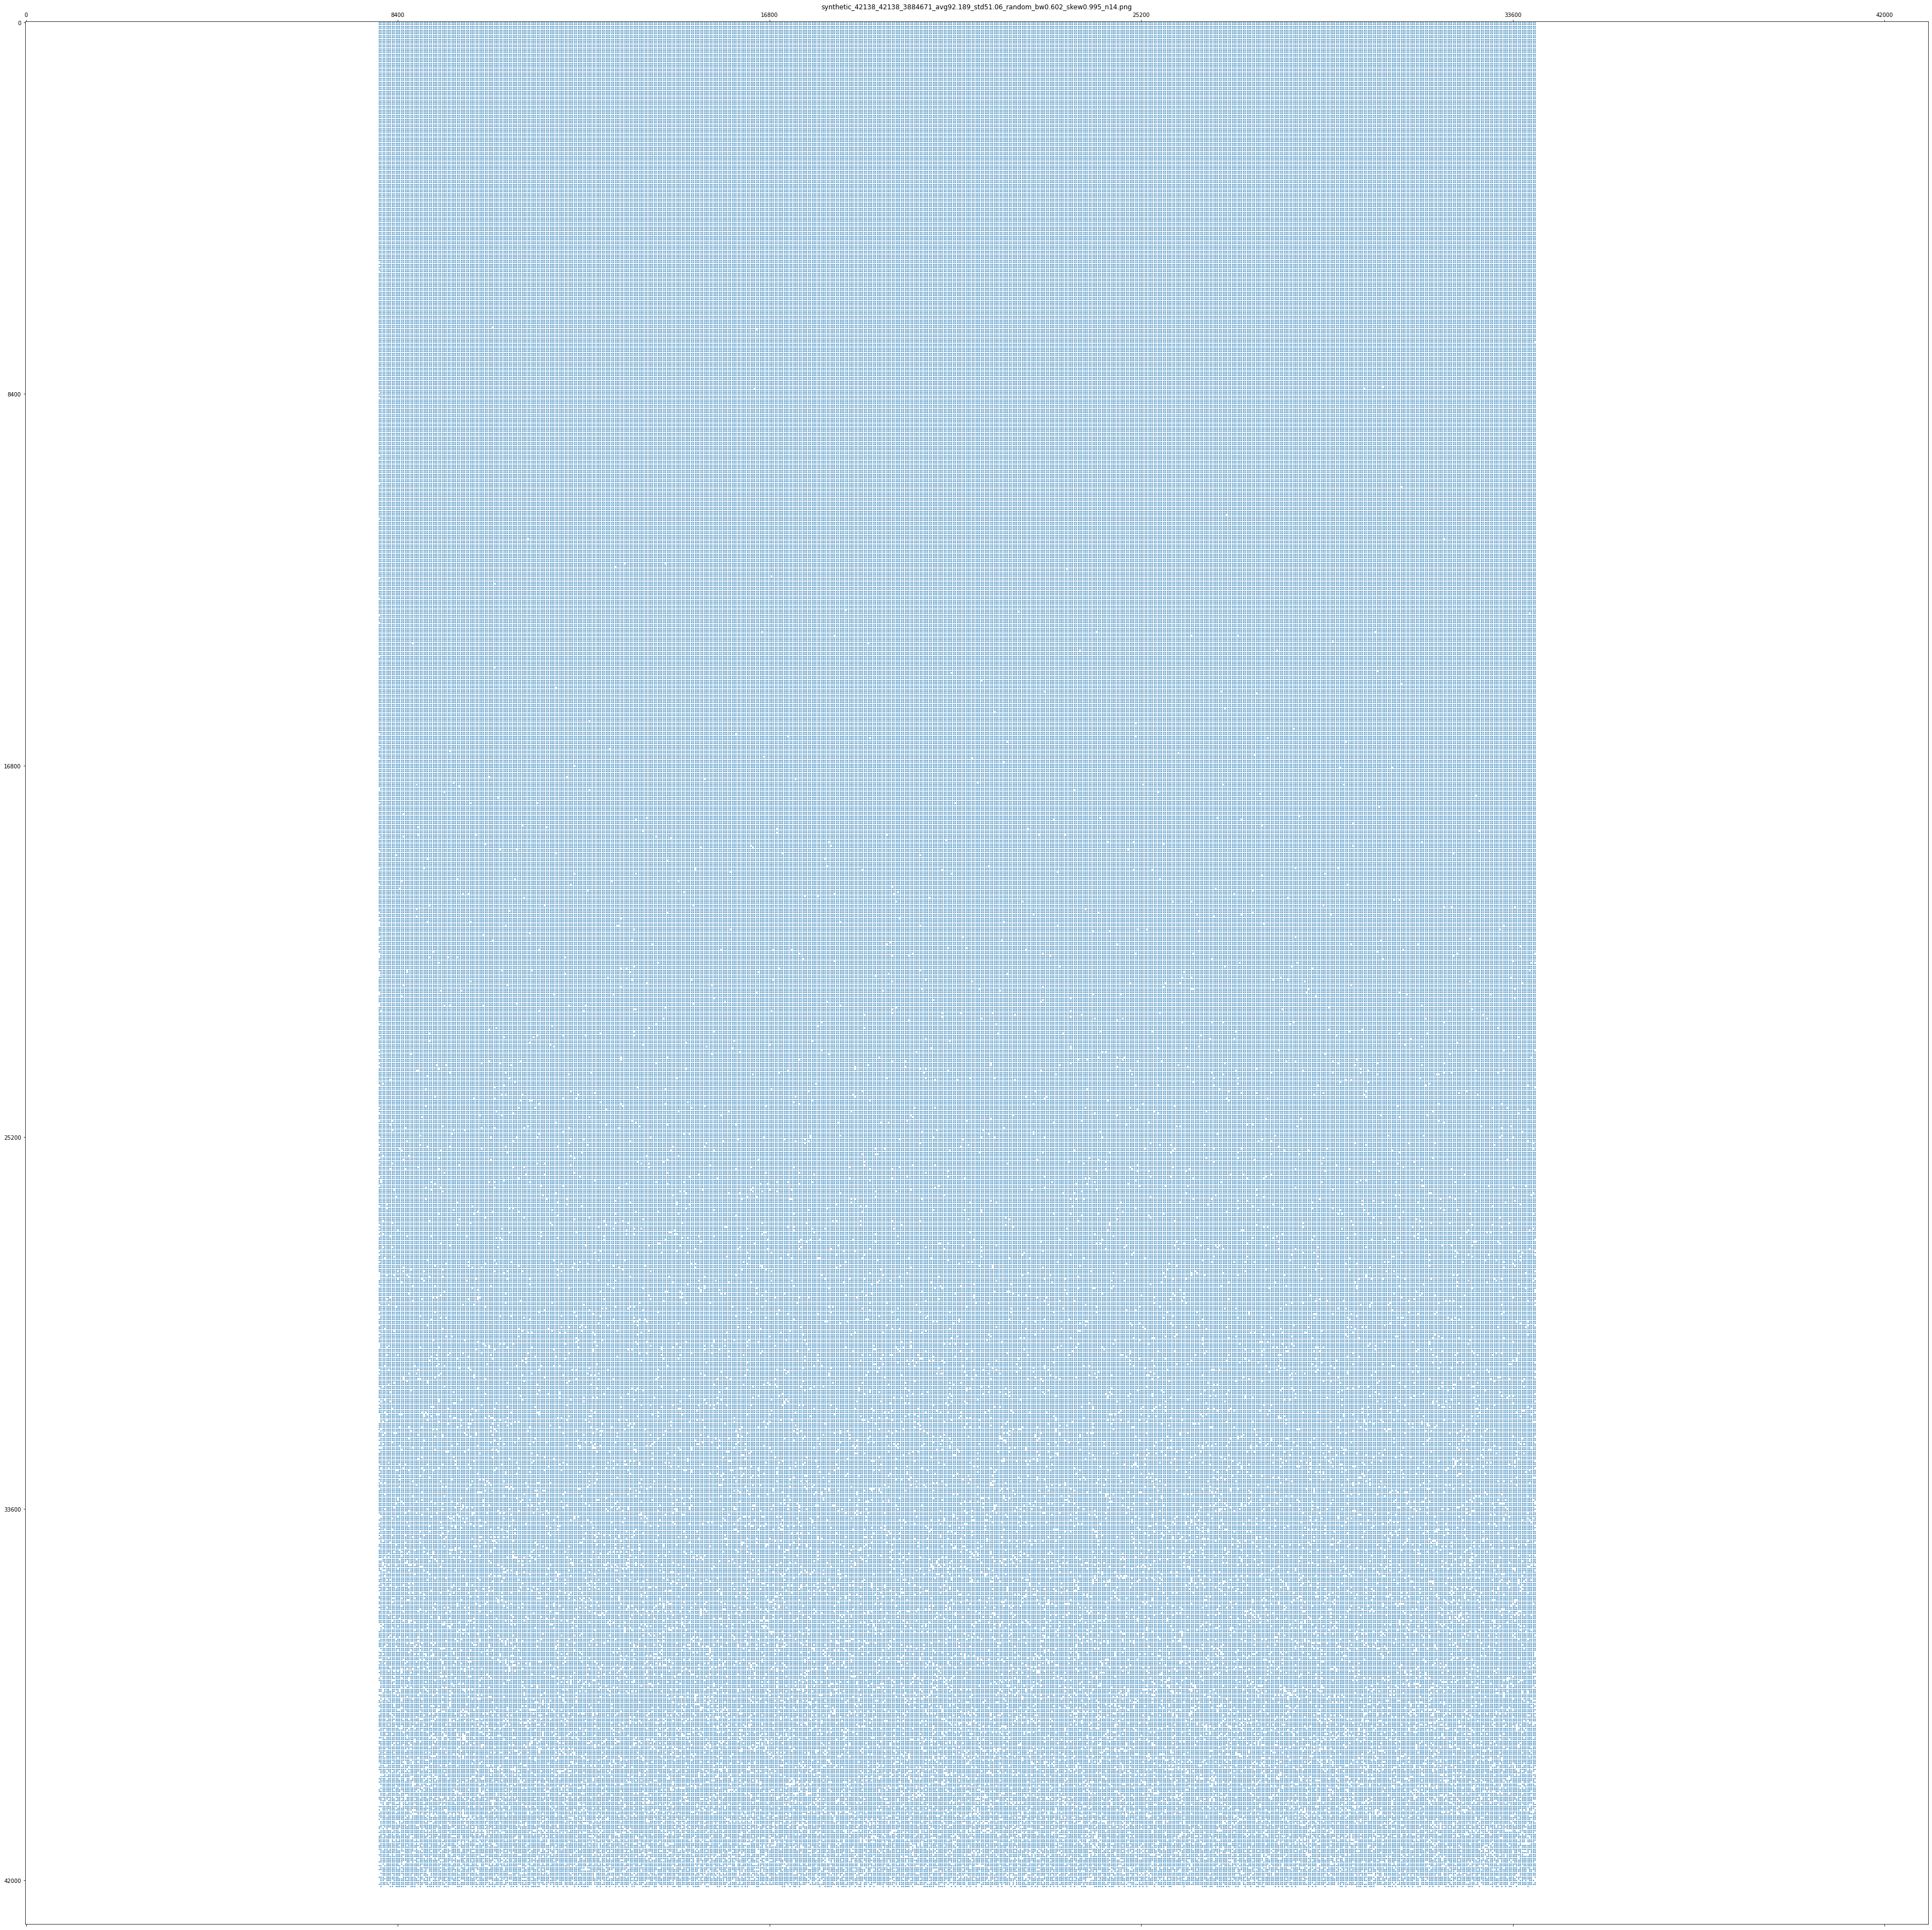

>>> Took me 3.349 seconds to plot and save image of matrix


synthetic_46835_46835_2372893_avg50.665_std27.766_random_bw0.186_skew1.861_n14.mtx :	dimensions (46835, 46835) / nnz 2372893 / mem footprint 27.334 MB (CSR)
>>> Took me 5.742 seconds to read matrix
>>> Took me 14.83 seconds to create image of matrix


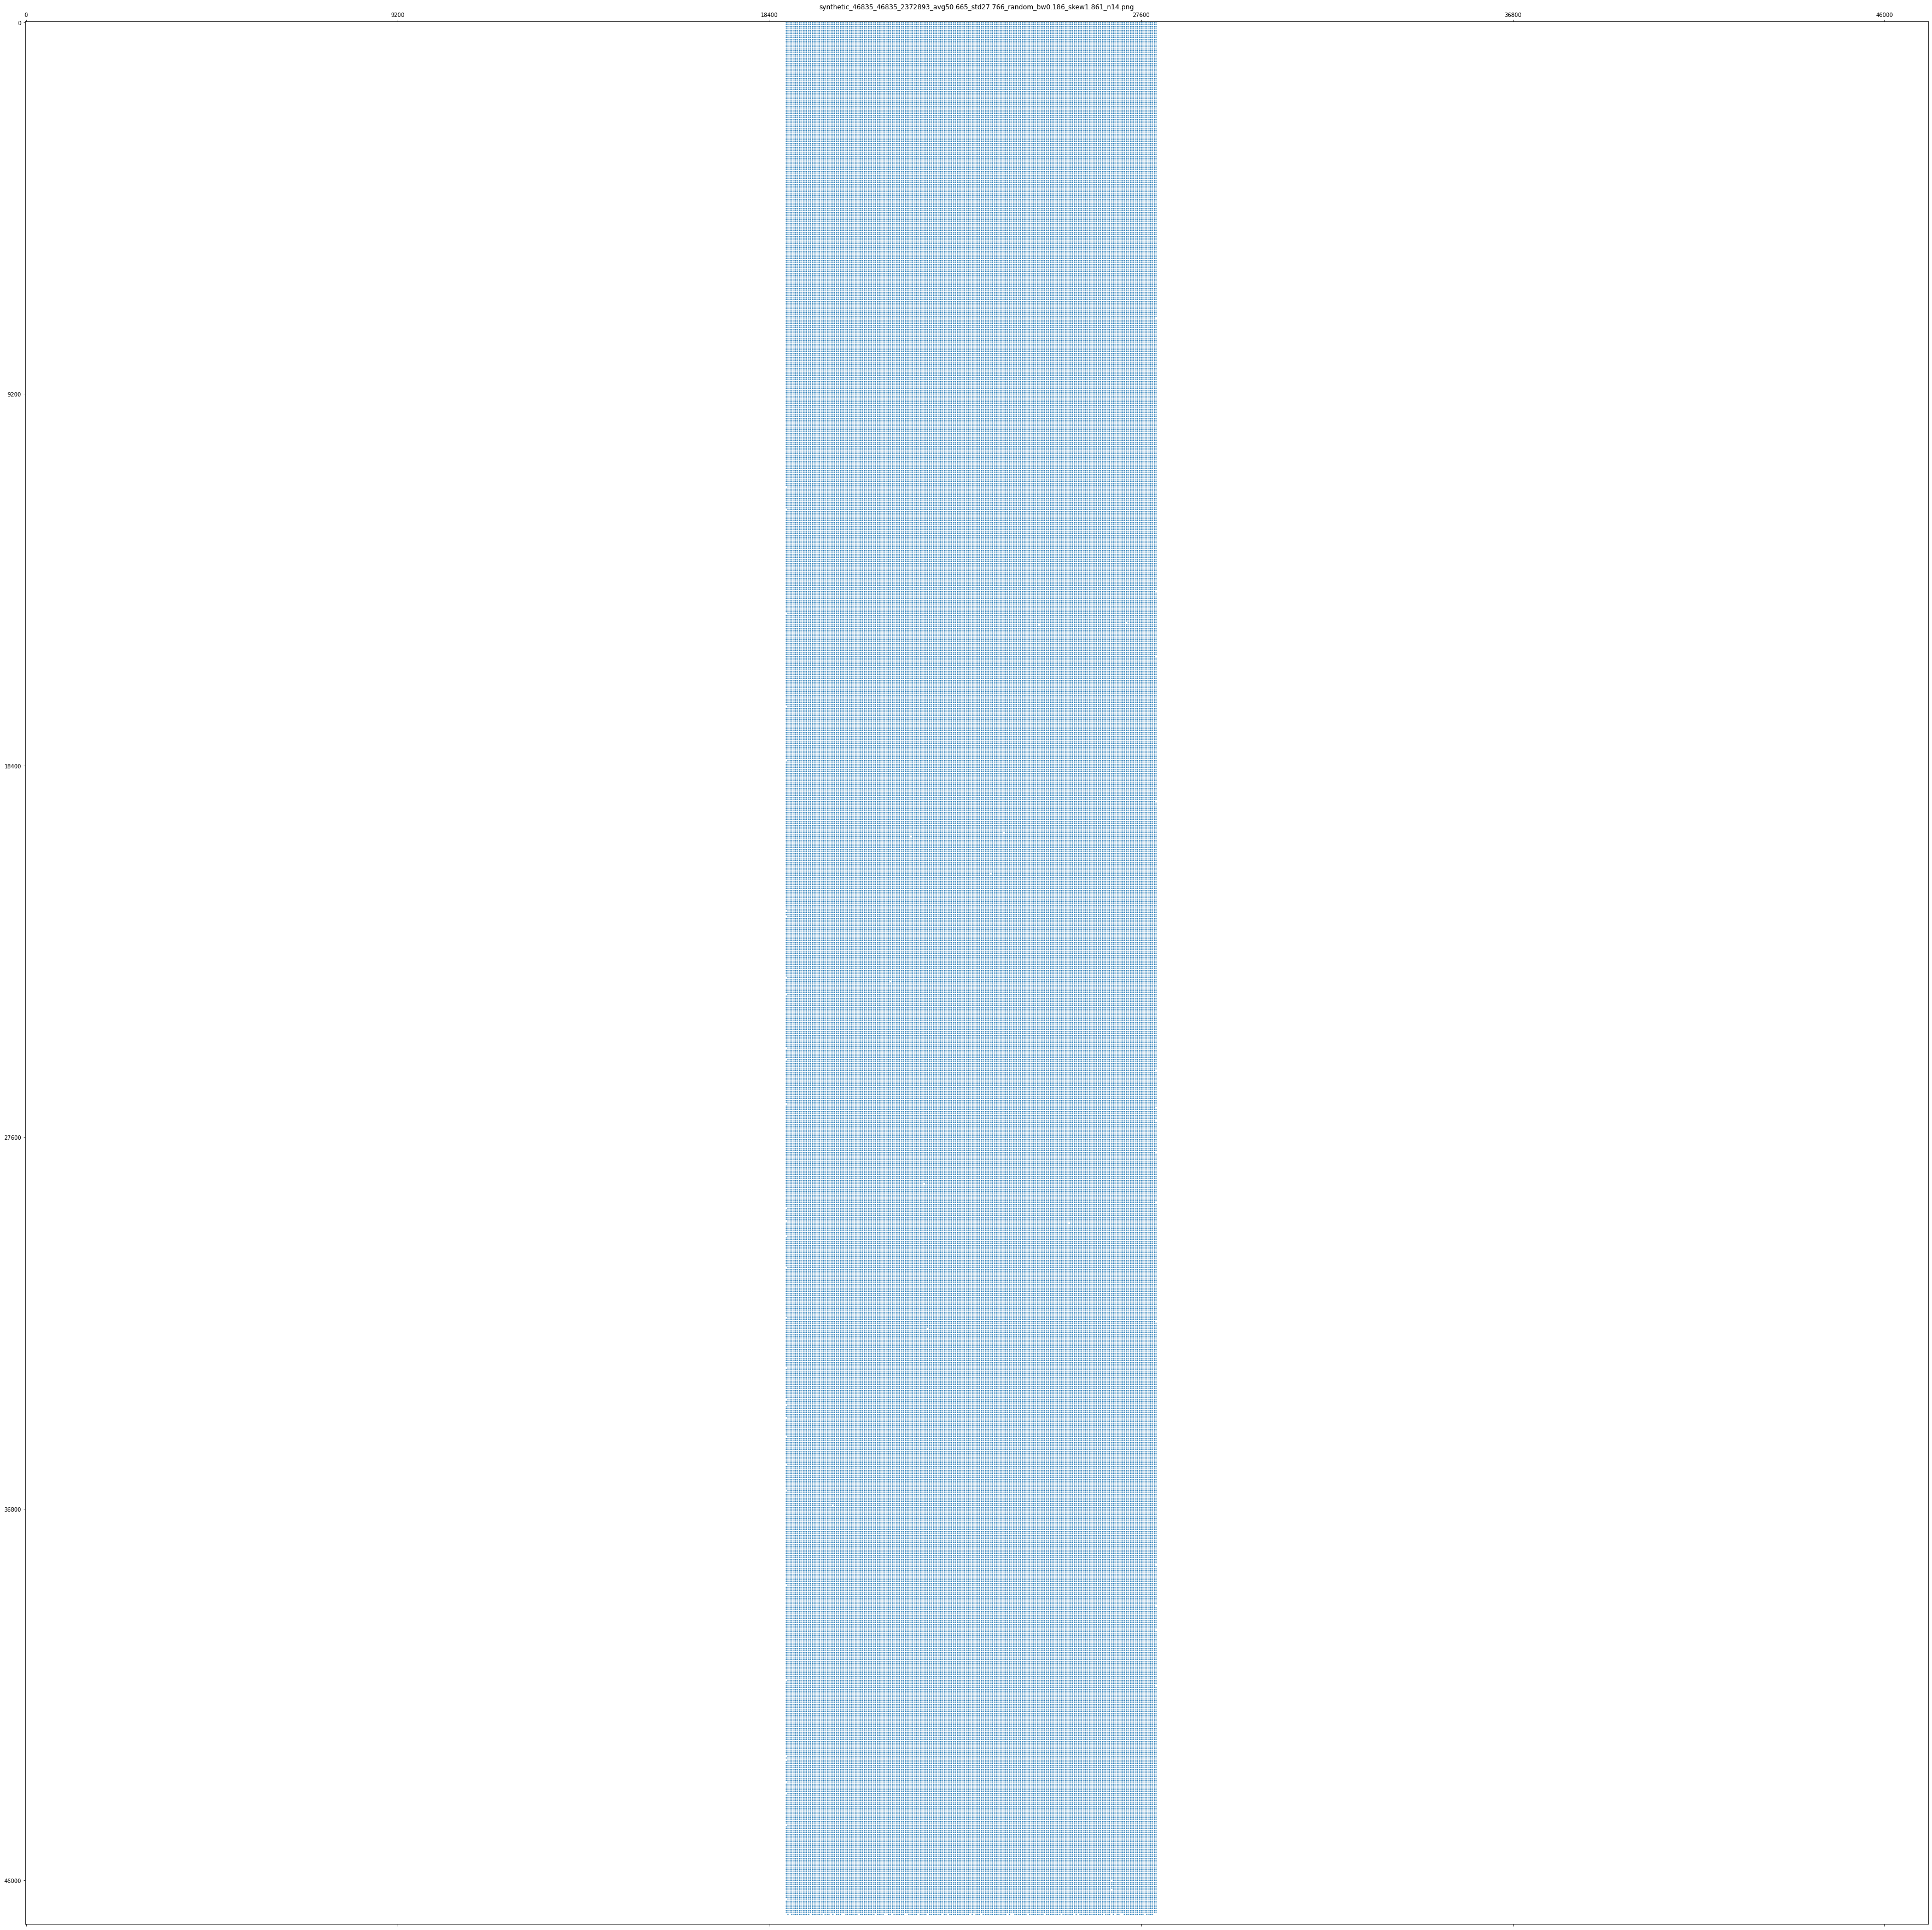

>>> Took me 2.668 seconds to plot and save image of matrix


synthetic_62451_62451_4007810_avg64.175_std14.044_random_bw0.009_skew0.216_n14.mtx :	dimensions (62451, 62451) / nnz 4007810 / mem footprint 46.104 MB (CSR)
>>> Took me 22.859 seconds to read matrix
>>> Took me 23.638 seconds to create image of matrix


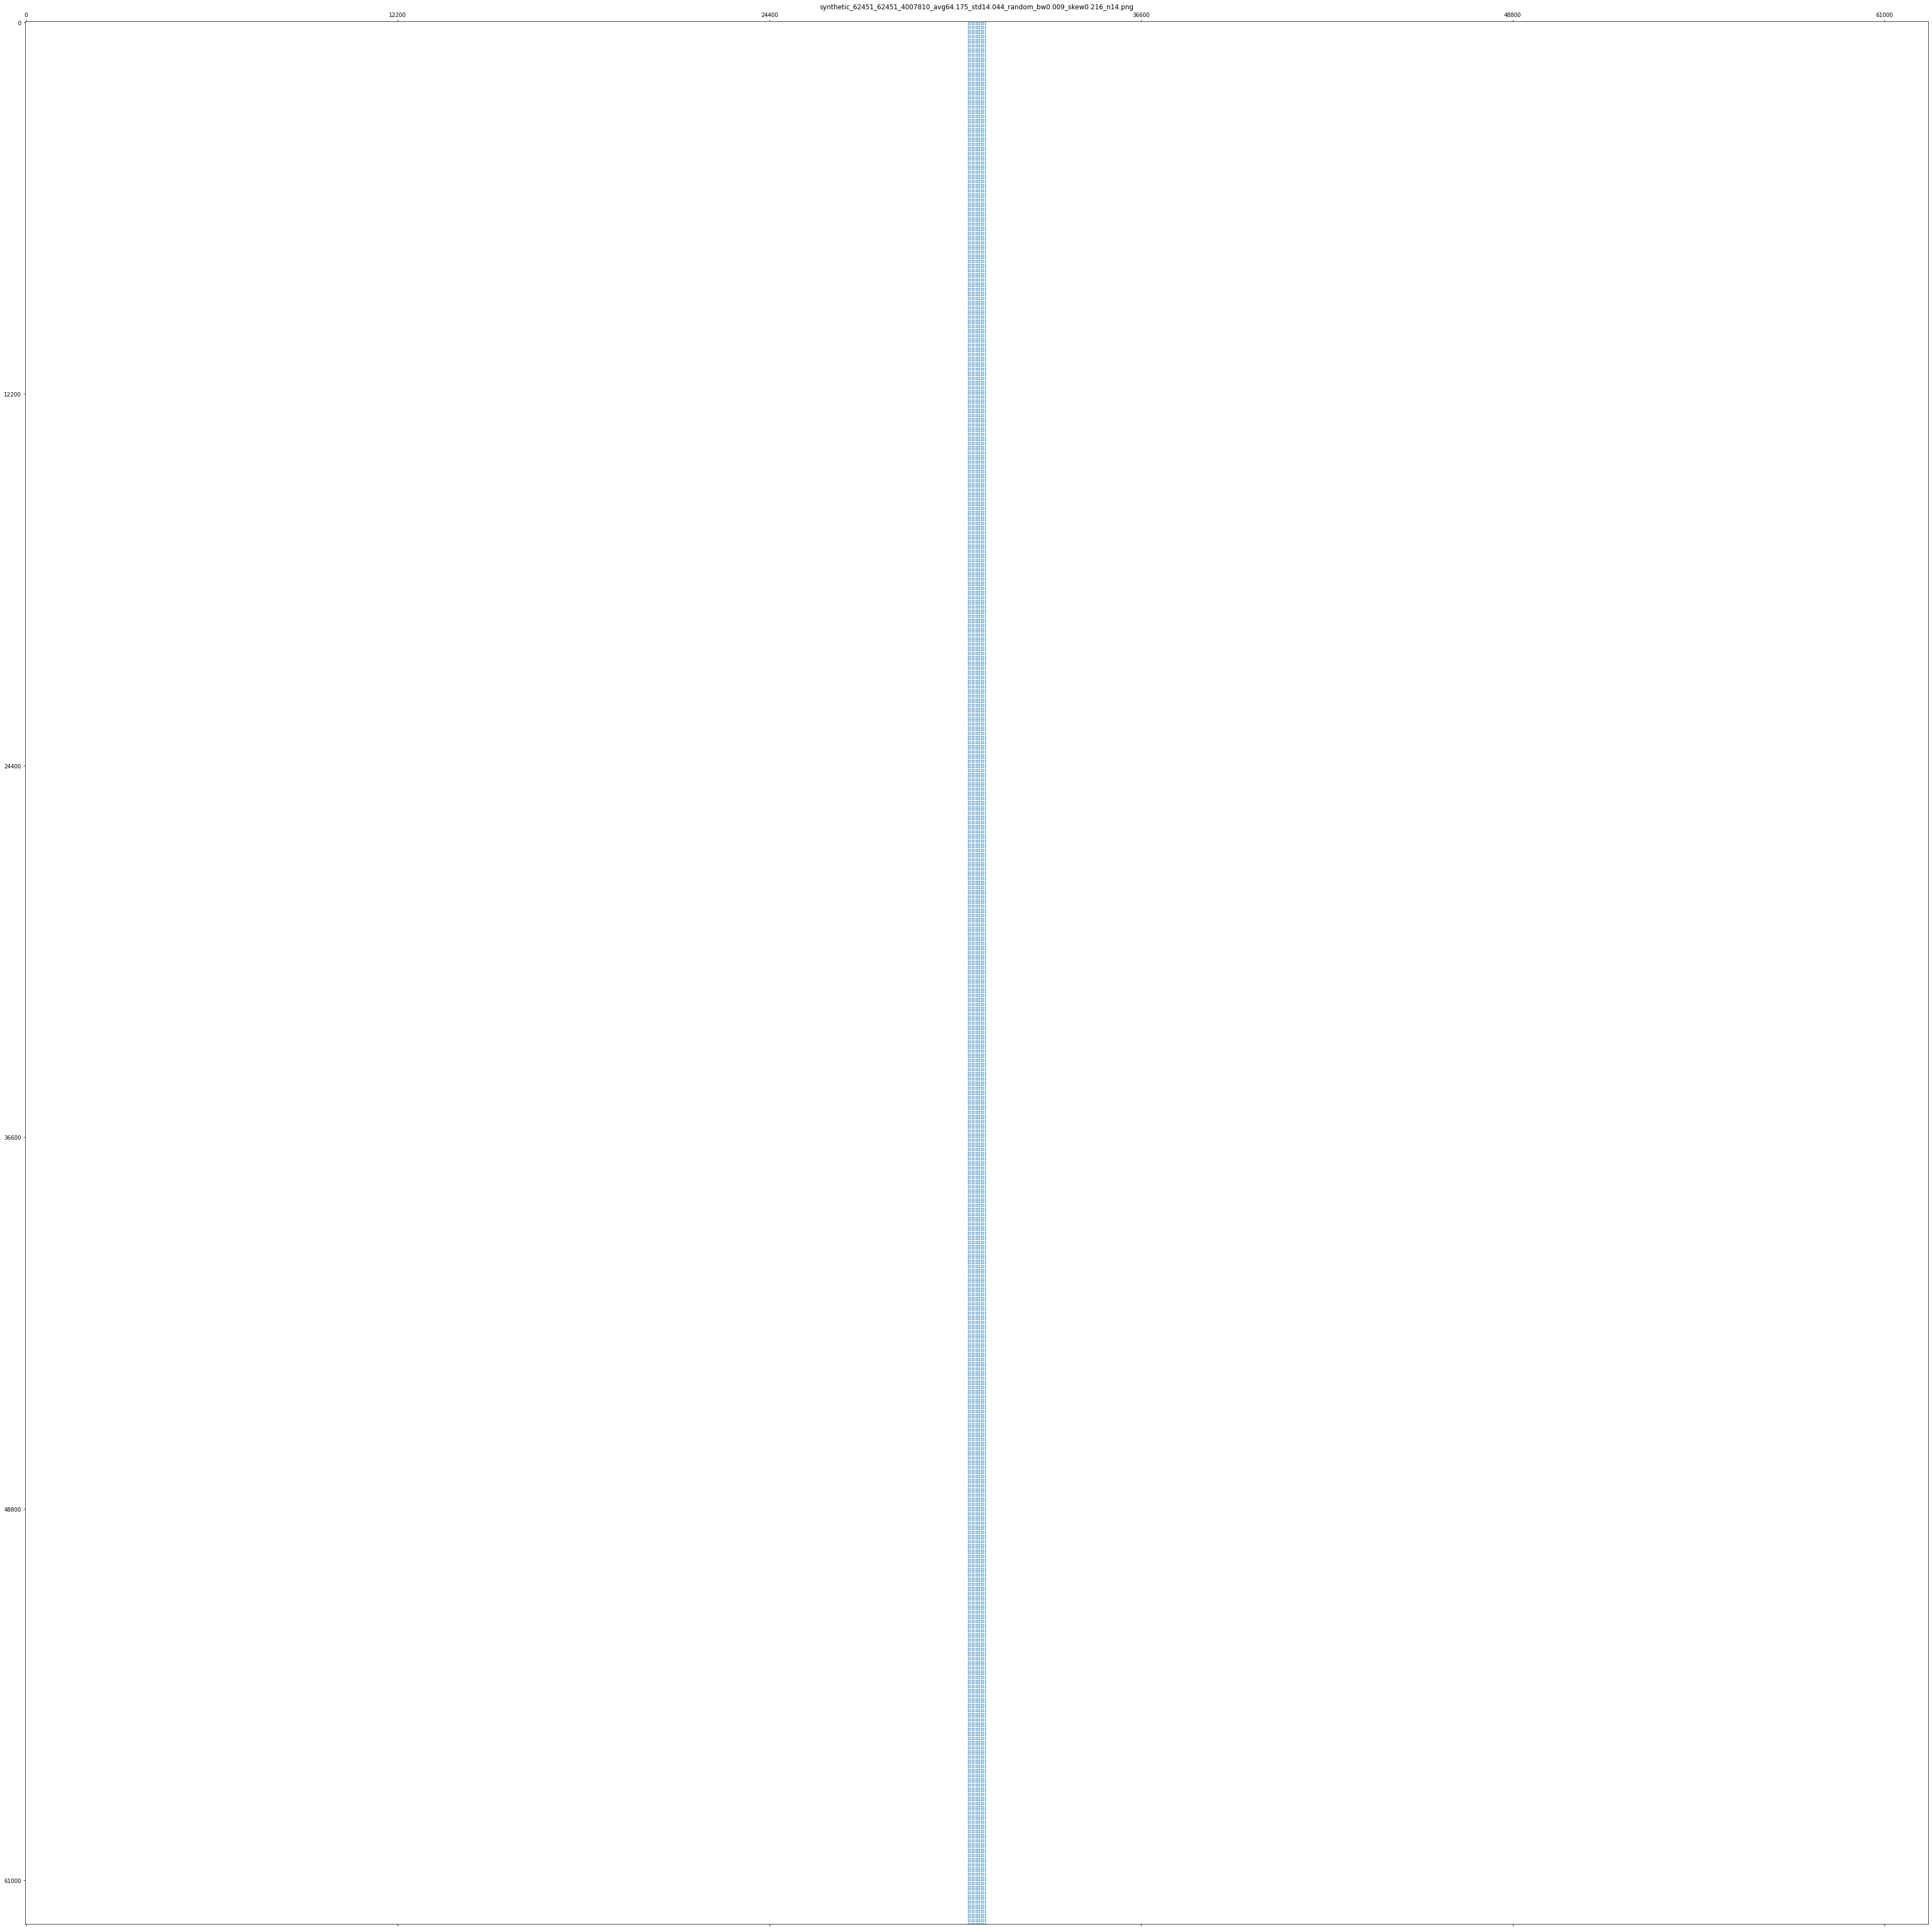

>>> Took me 2.602 seconds to plot and save image of matrix


synthetic_63838_63838_14150047_avg221.656_std96.326_random_bw0.866_skew14.444_n14.mtx :	dimensions (63838, 63838) / nnz 14150047 / mem footprint 162.178 MB (CSR)
>>> Took me 37.223 seconds to read matrix
>>> Took me 89.102 seconds to create image of matrix


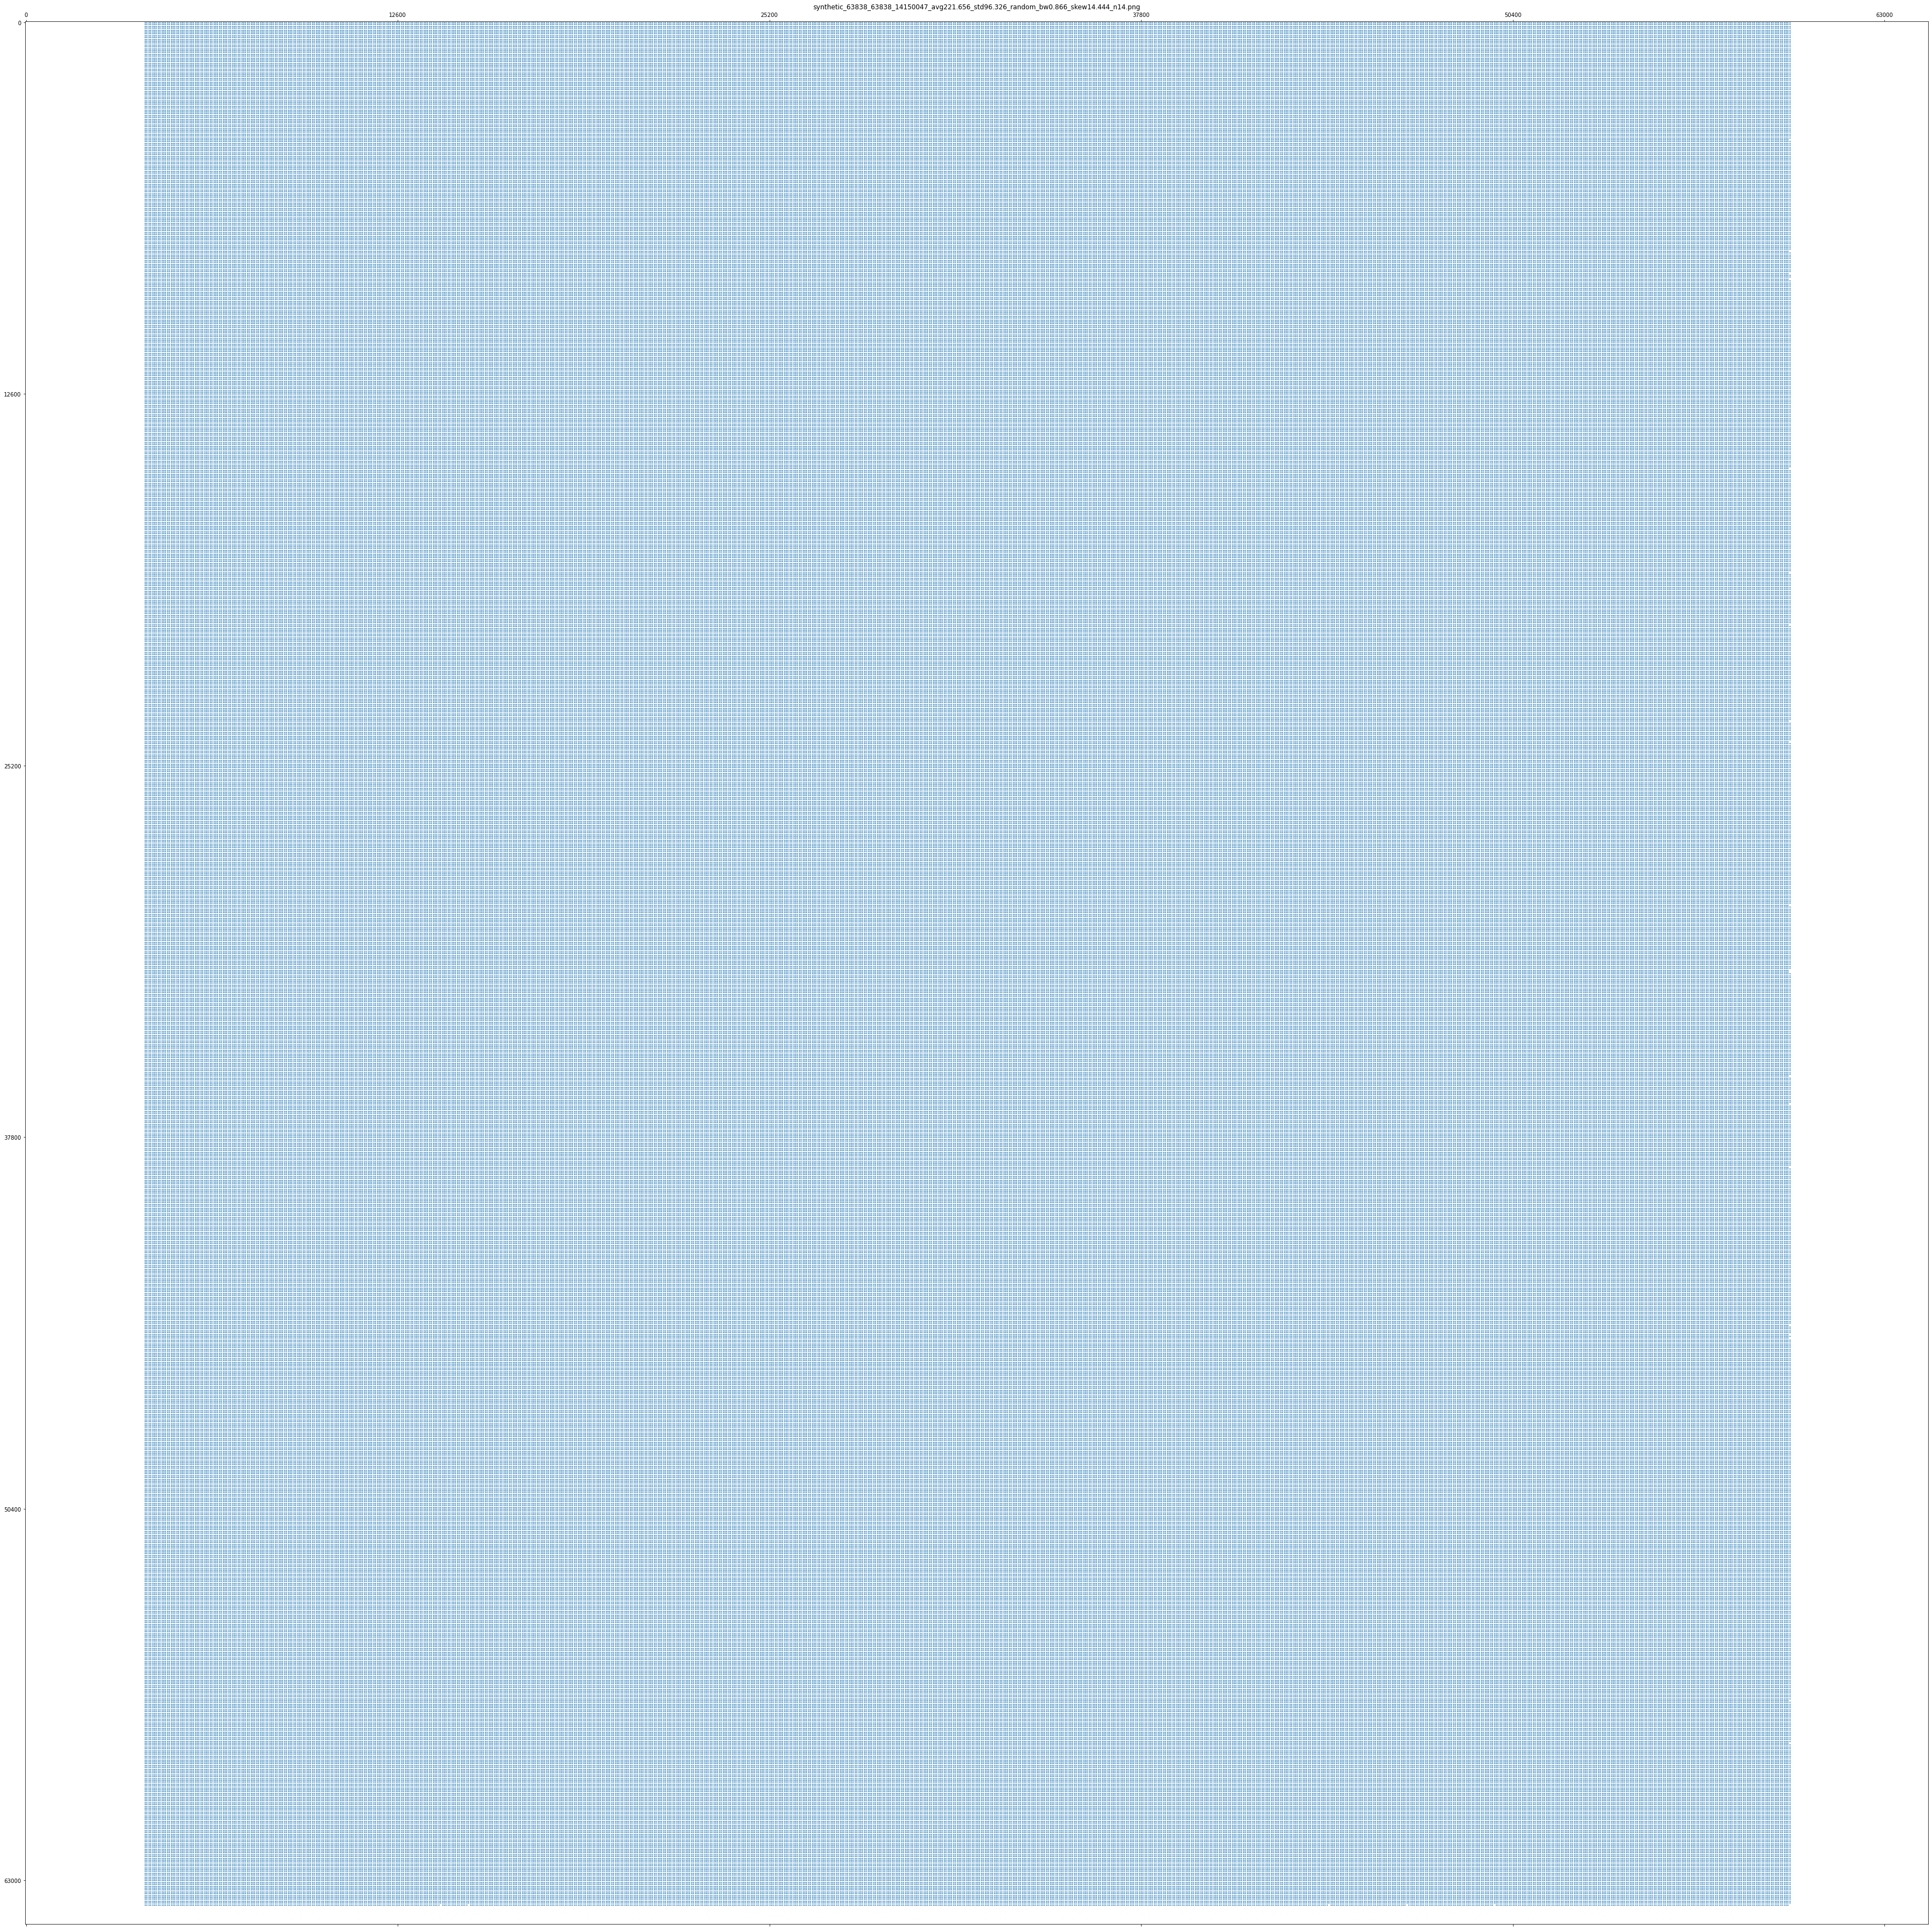

>>> Took me 3.565 seconds to plot and save image of matrix


synthetic_66463_66463_10387201_avg156.285_std398.714_random_bw0.59_skew425.242_n14.mtx :	dimensions (66463, 66463) / nnz 10387201 / mem footprint 119.126 MB (CSR)
>>> Took me 38.37 seconds to read matrix
>>> Took me 63.975 seconds to create image of matrix


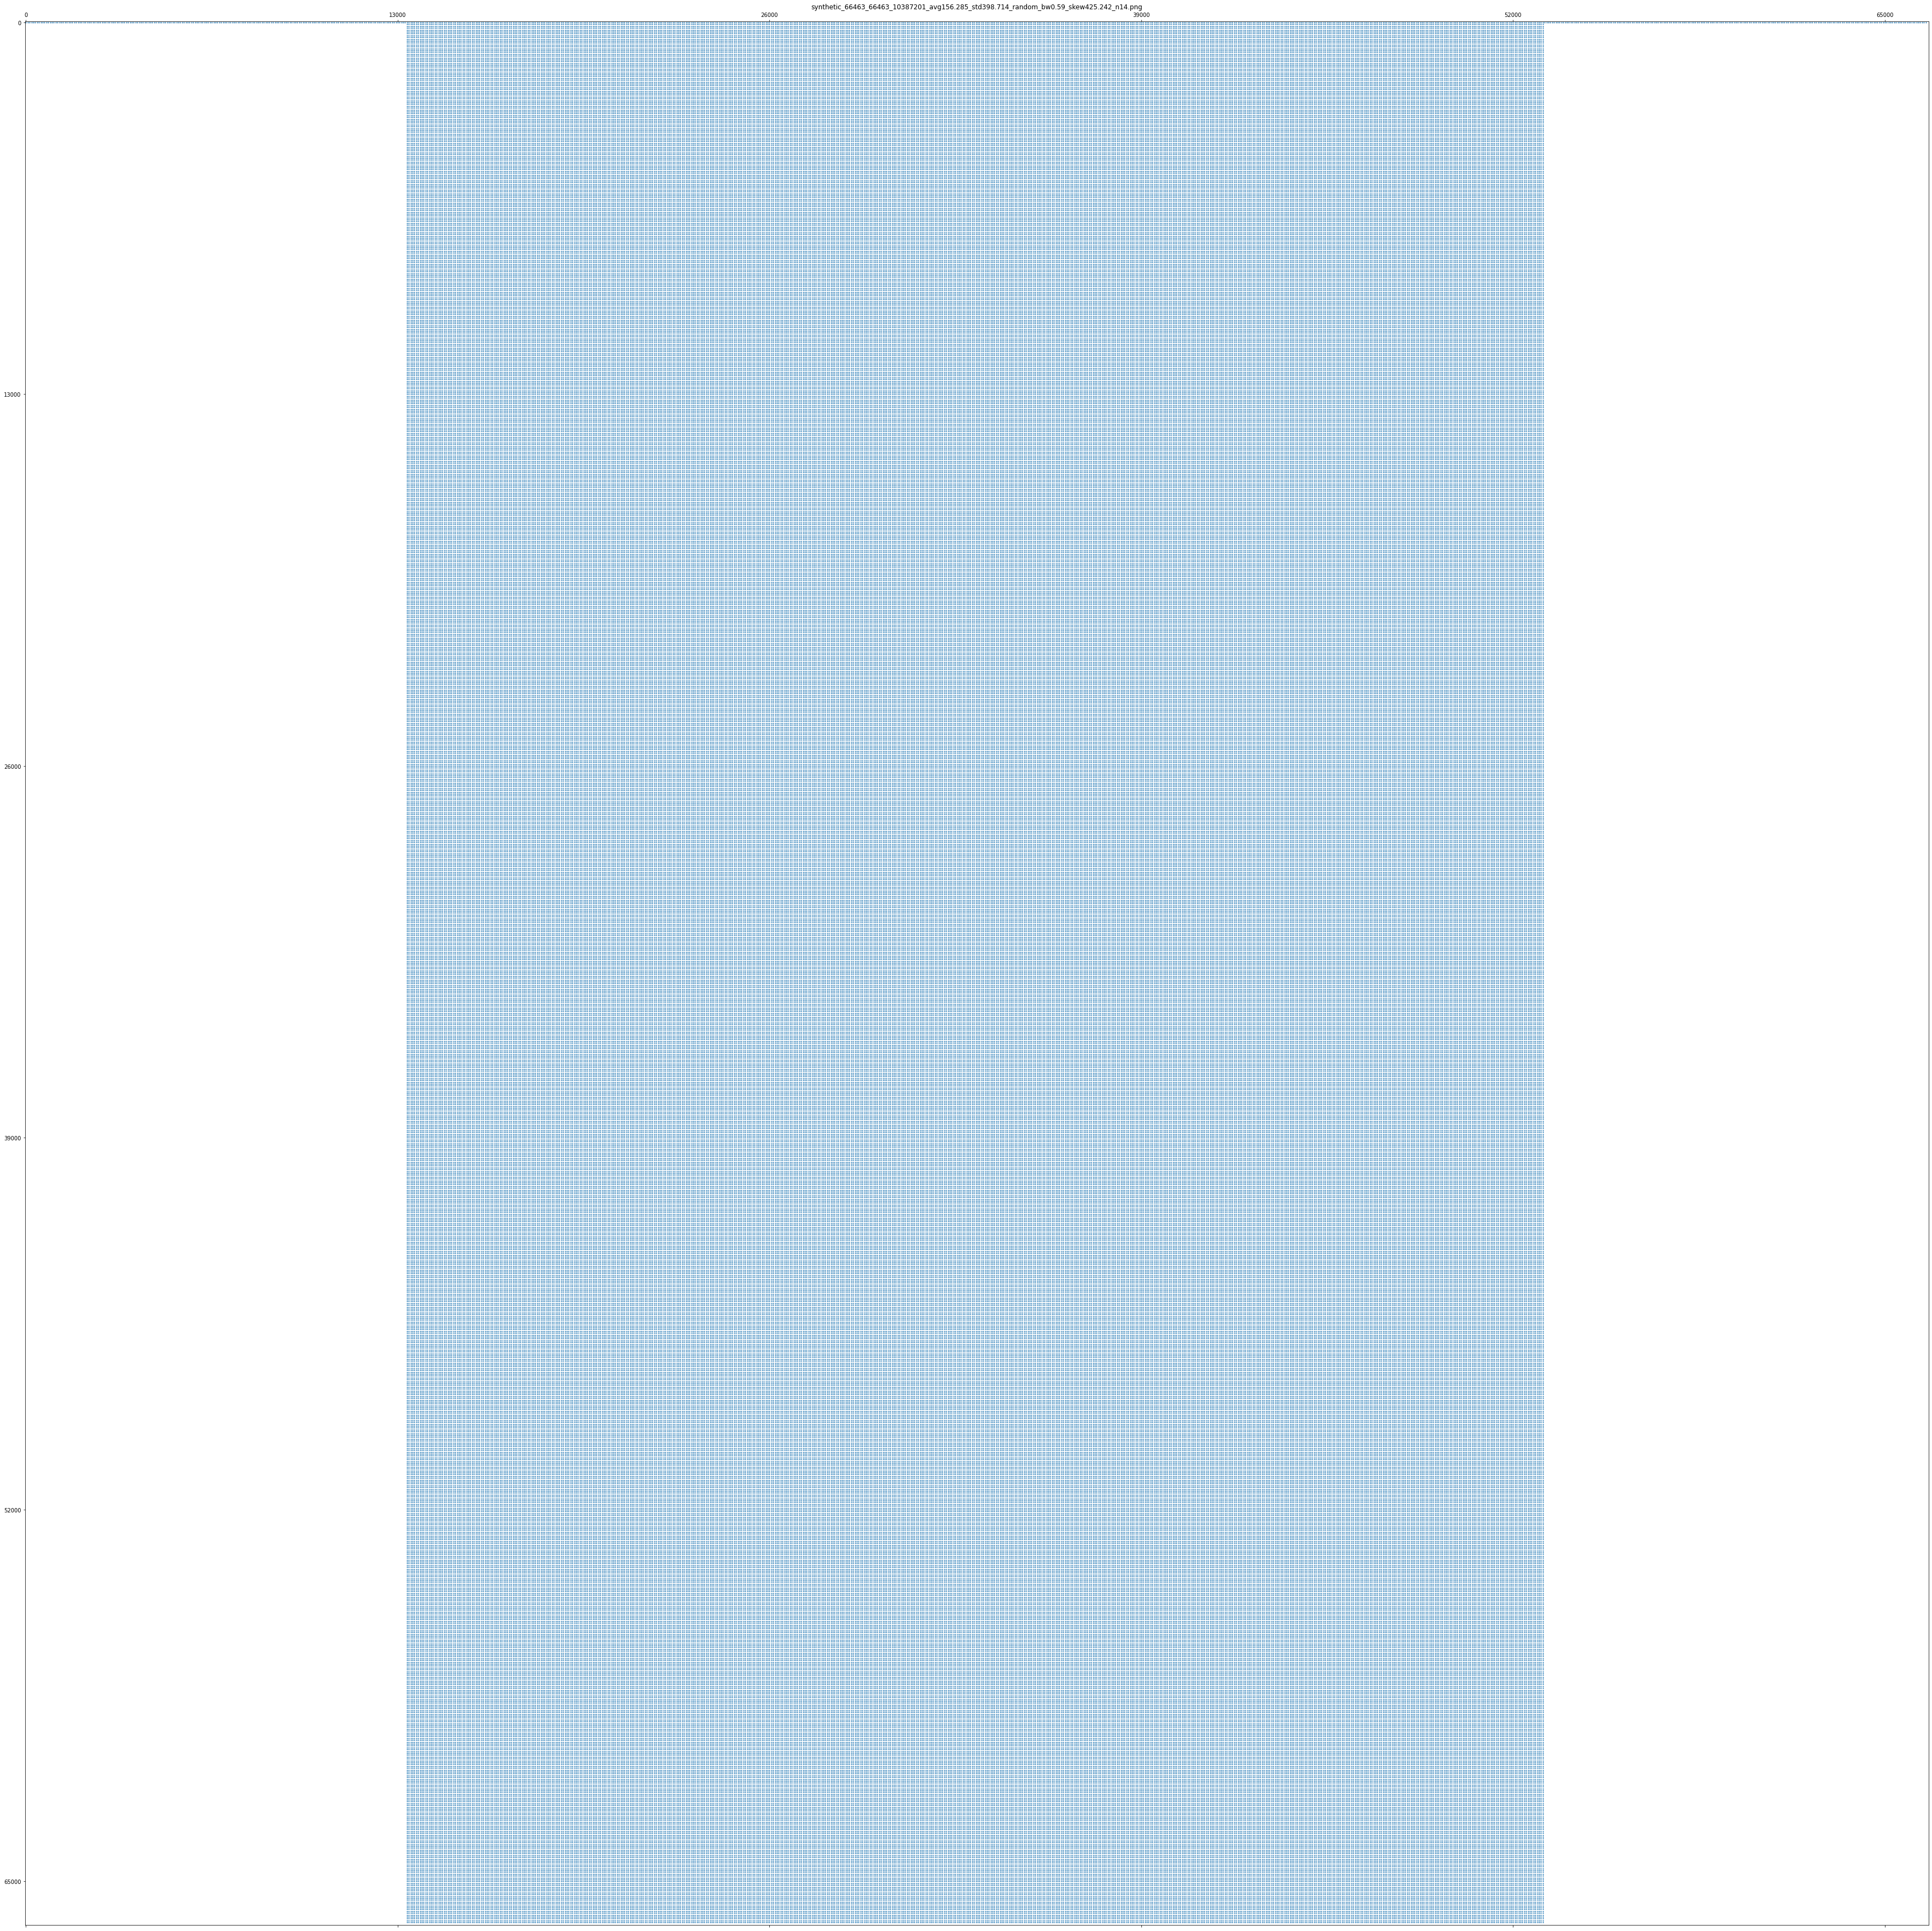

>>> Took me 3.234 seconds to plot and save image of matrix


synthetic_68121_68121_5407070_avg79.374_std1077.003_random_bw0.045_skew861.9_n14.mtx :	dimensions (68121, 68121) / nnz 5407070 / mem footprint 62.139 MB (CSR)
>>> Took me 8.683 seconds to read matrix
>>> Took me 33.715 seconds to create image of matrix


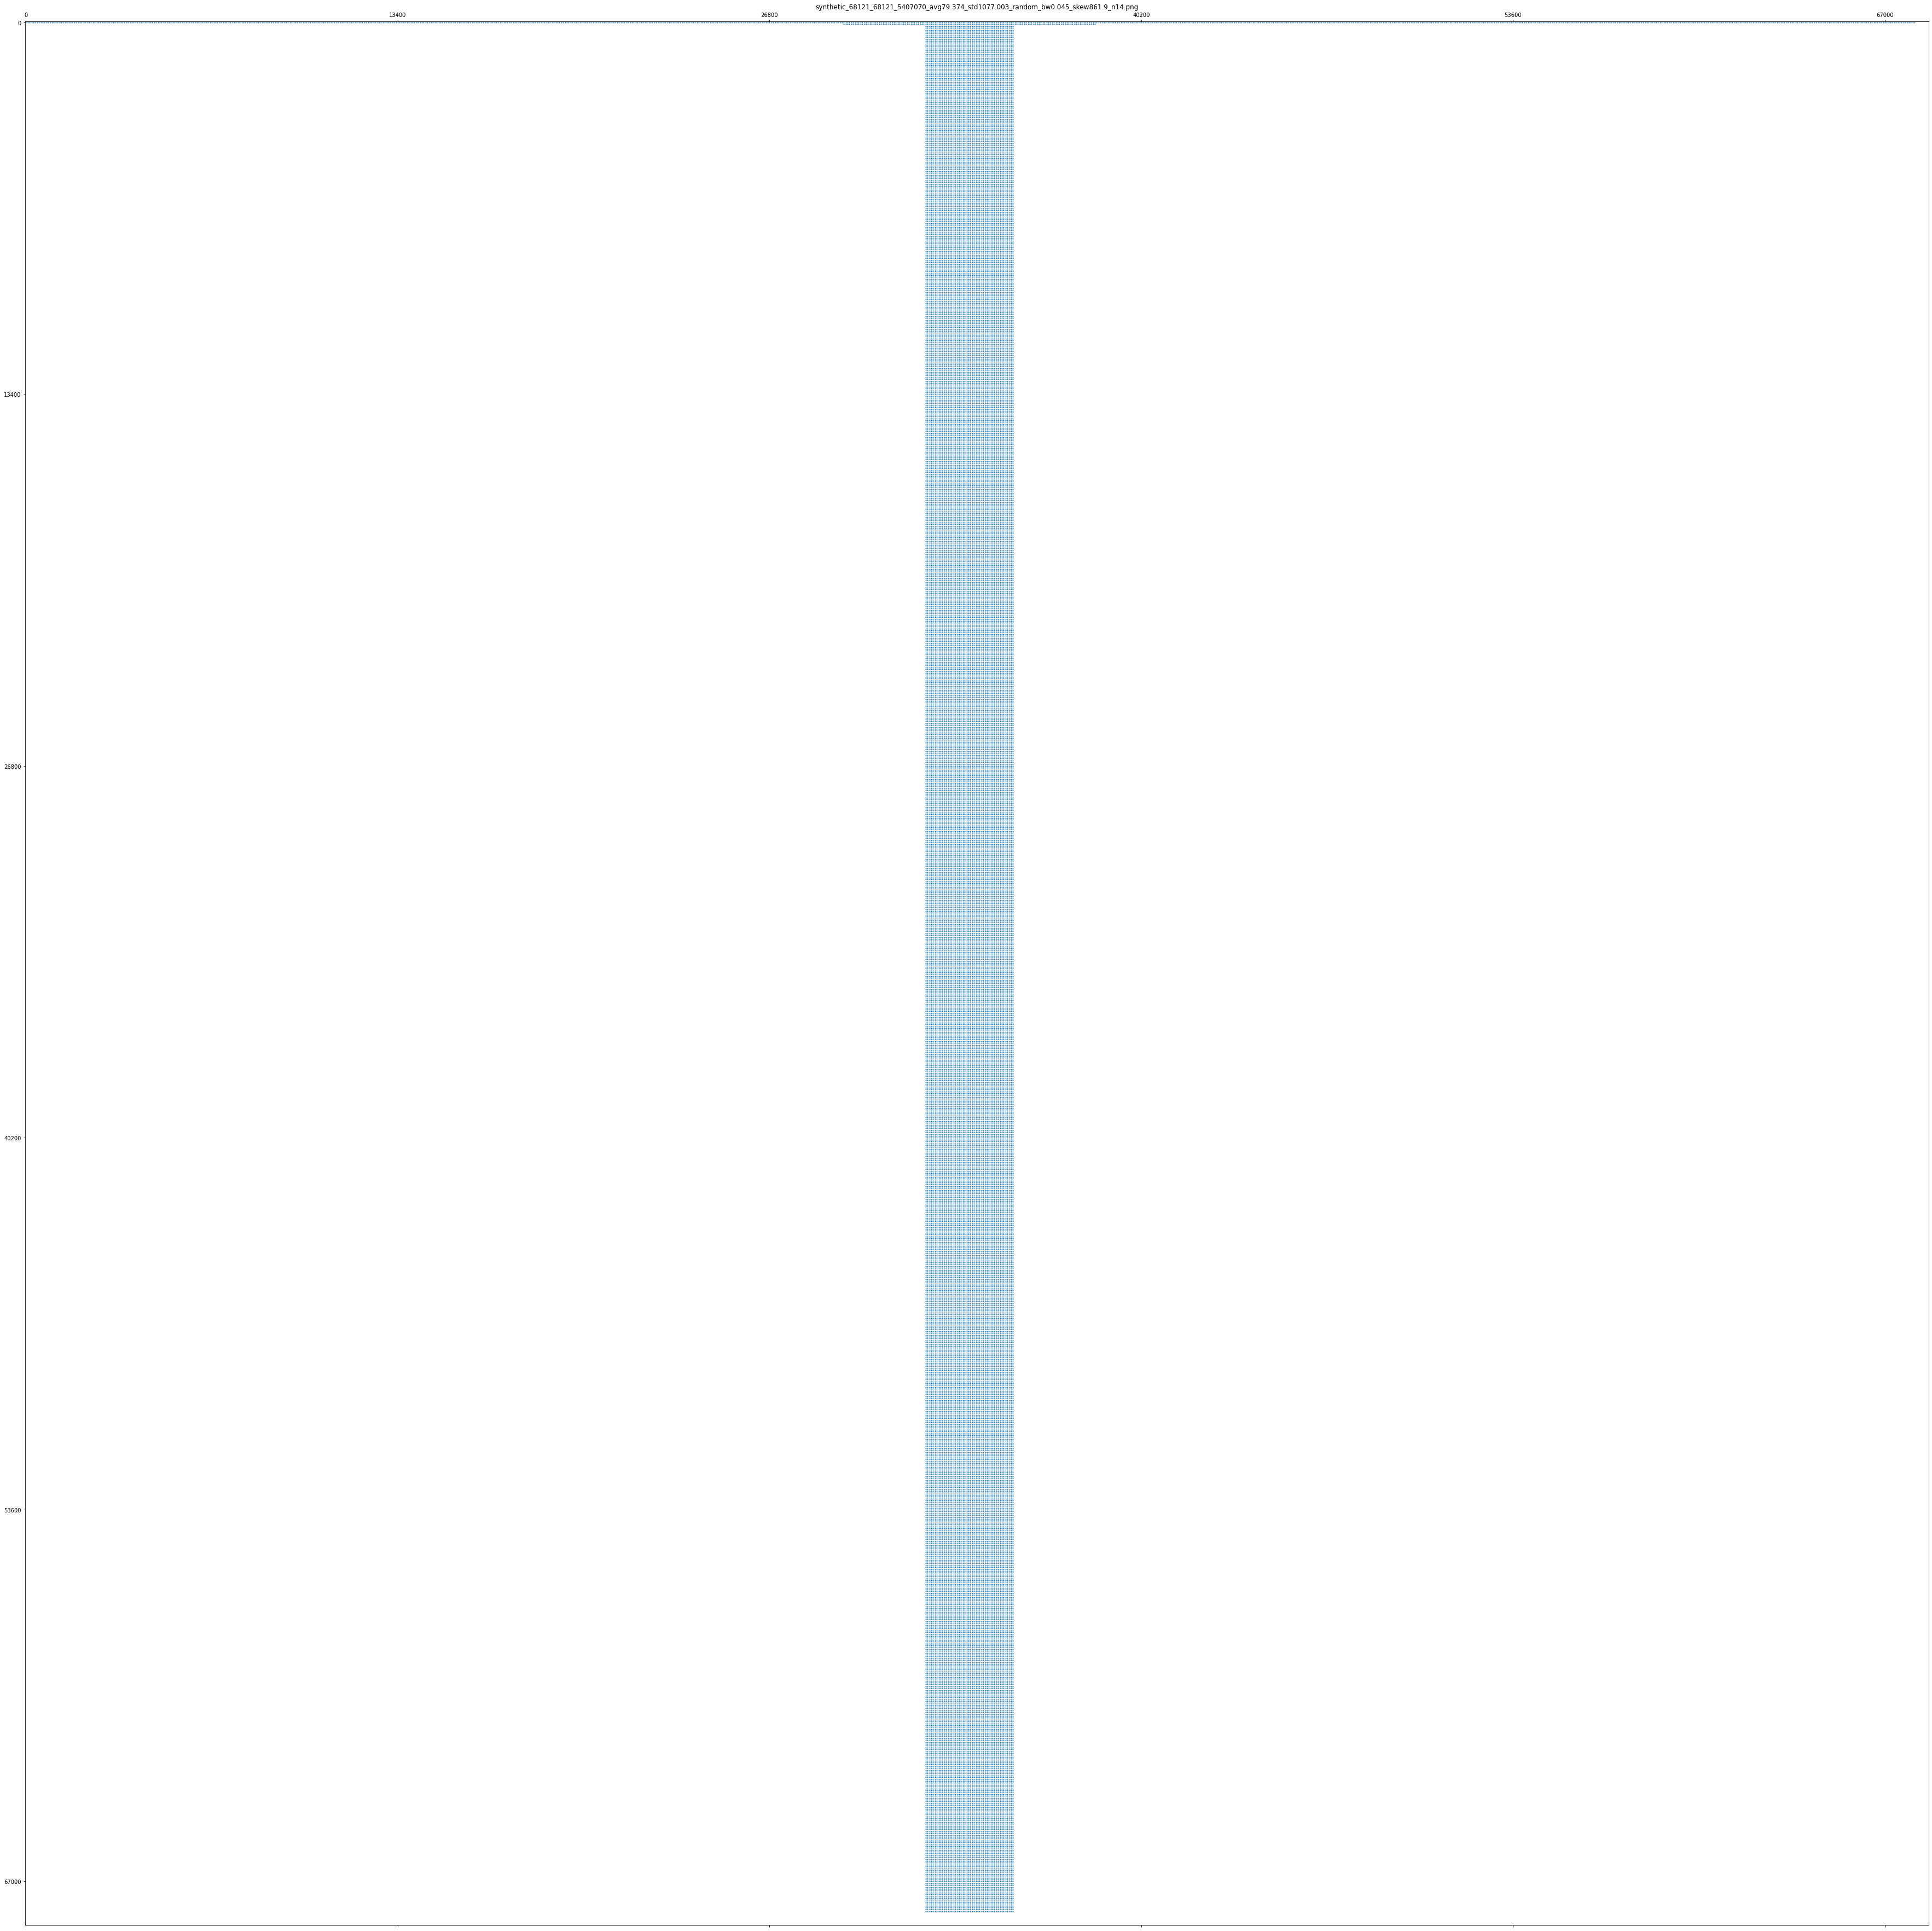

>>> Took me 2.881 seconds to plot and save image of matrix


synthetic_83334_83334_6011057_avg72.132_std19.105_random_bw0.07_skew0.123_n14.mtx :	dimensions (83334, 83334) / nnz 6011057 / mem footprint 69.109 MB (CSR)
>>> Took me 11.633 seconds to read matrix
>>> Took me 39.935 seconds to create image of matrix


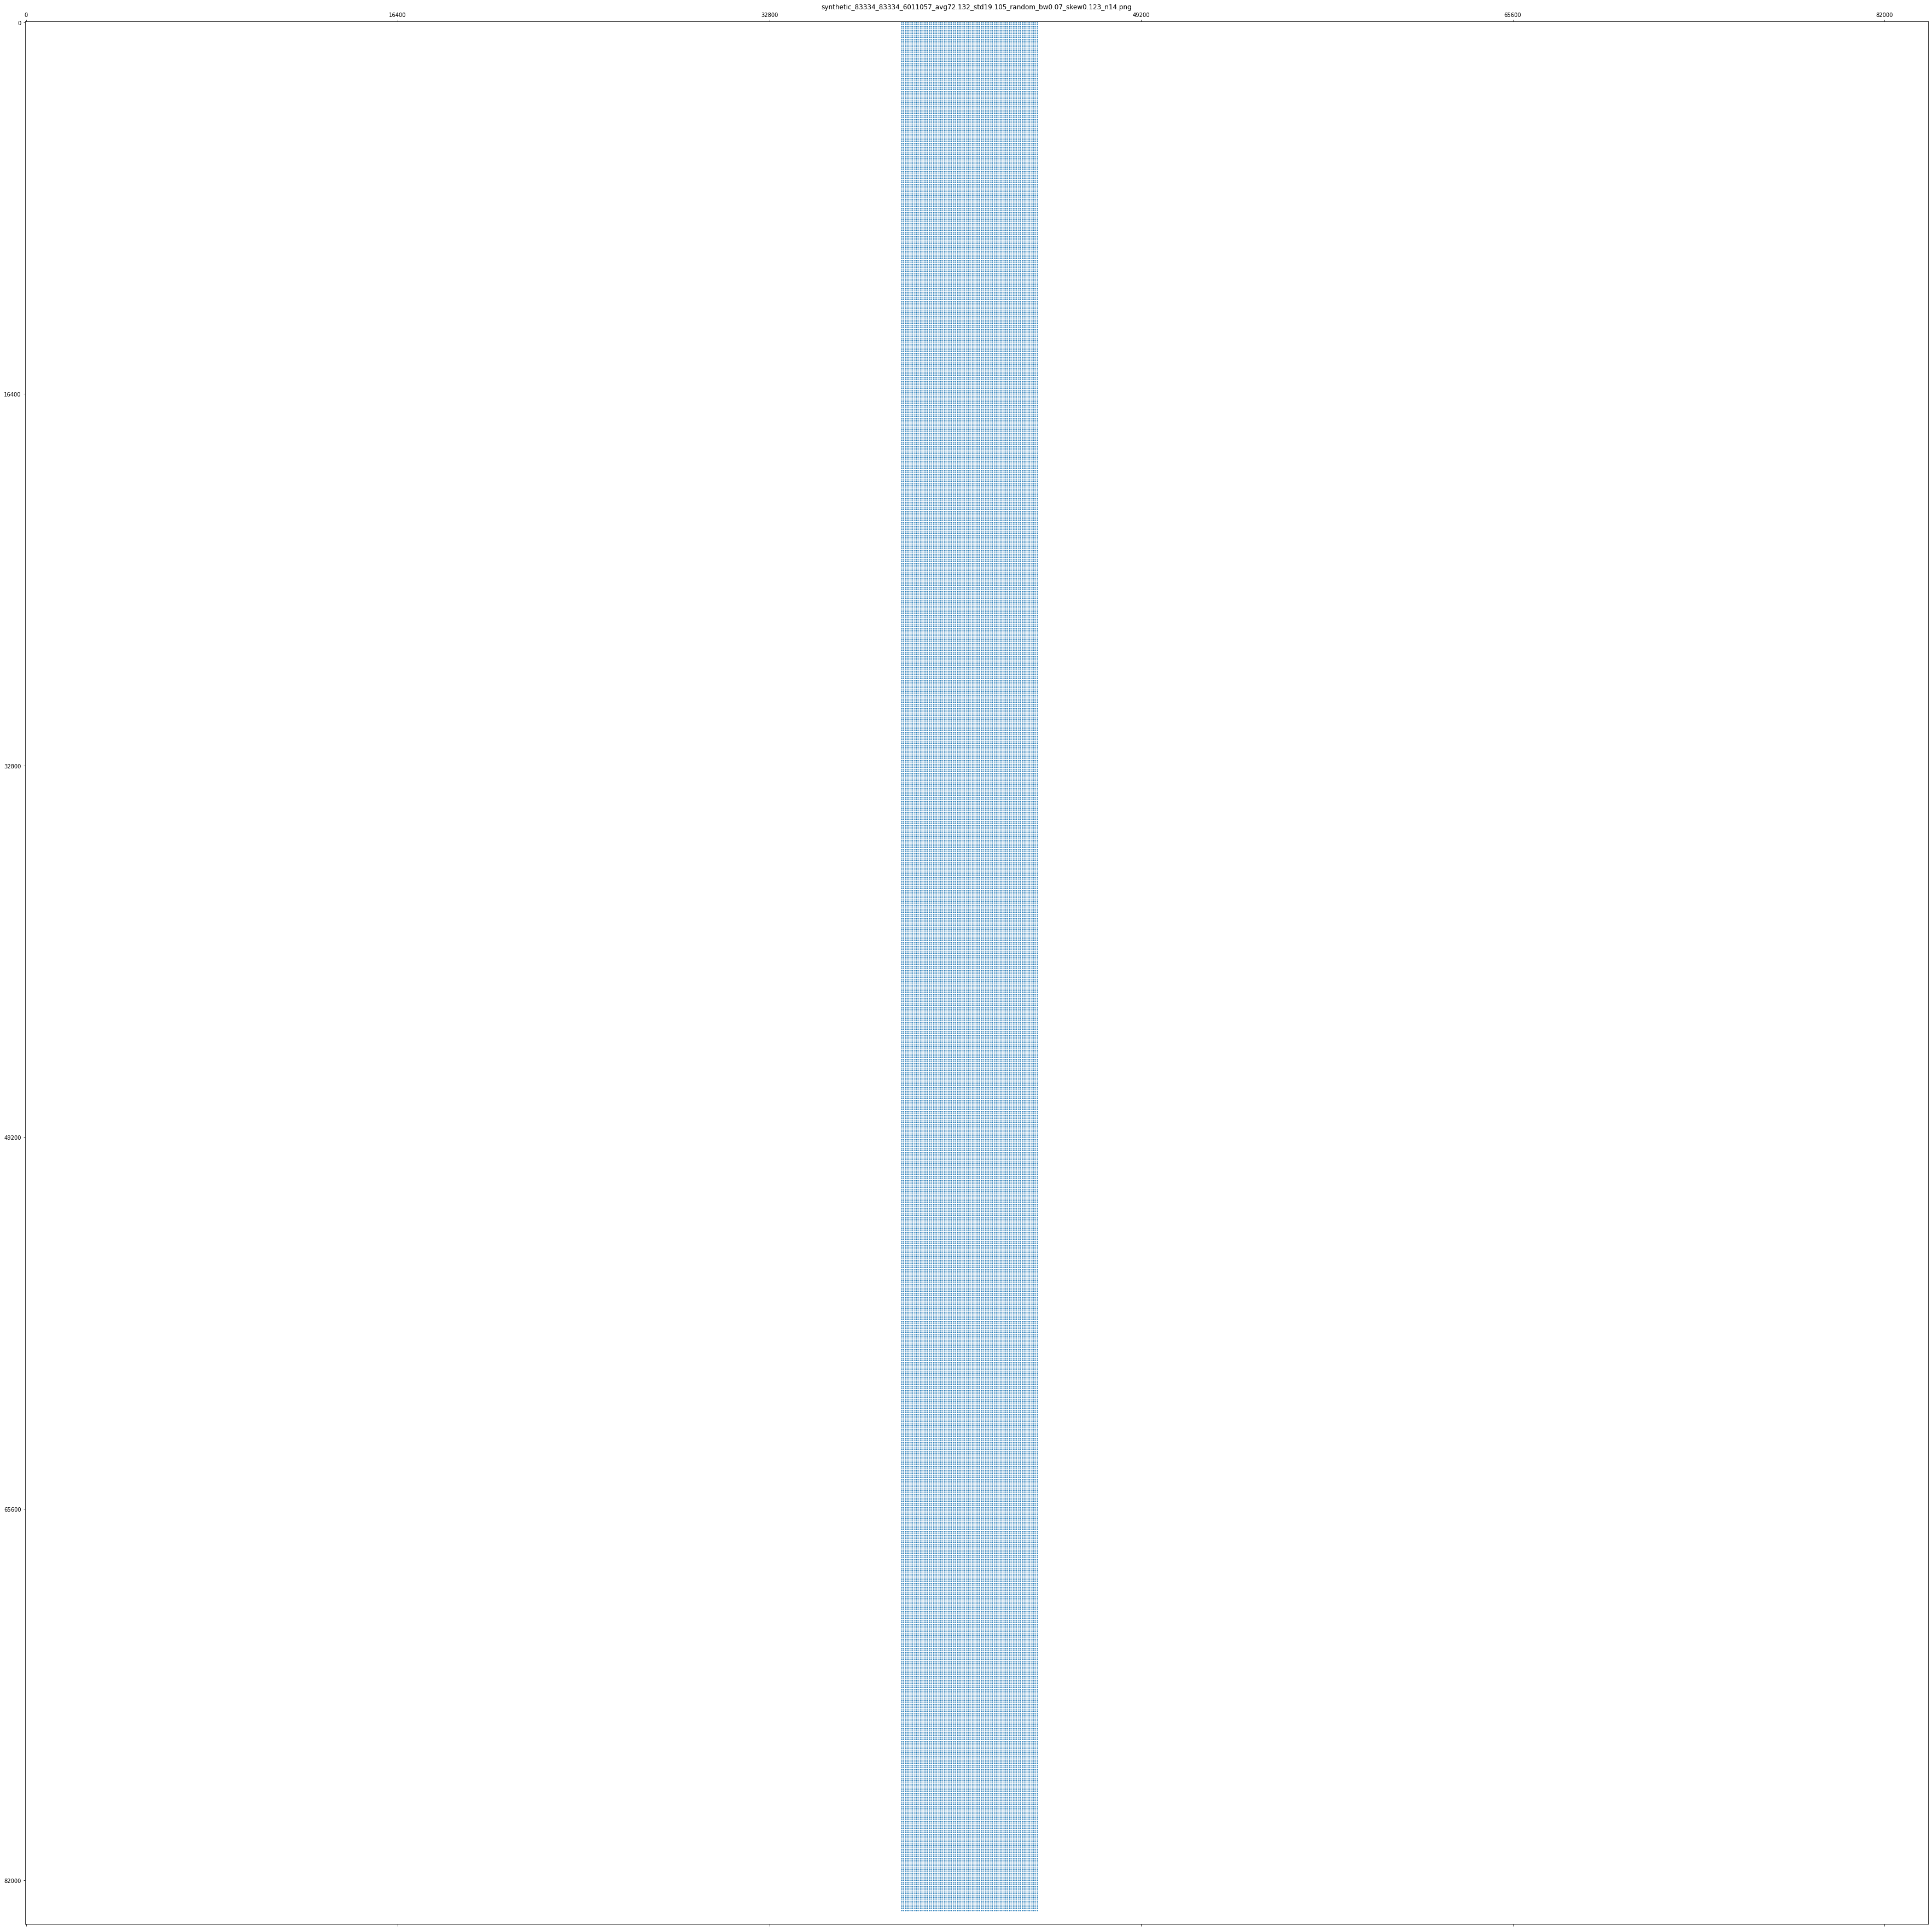

>>> Took me 2.659 seconds to plot and save image of matrix


synthetic_121192_121192_2626755_avg21.674_std13.799_random_bw0.608_skew2.741_n14.mtx :	dimensions (121192, 121192) / nnz 2626755 / mem footprint 30.523 MB (CSR)
>>> Took me 4.561 seconds to read matrix
>>> Took me 17.7 seconds to create image of matrix


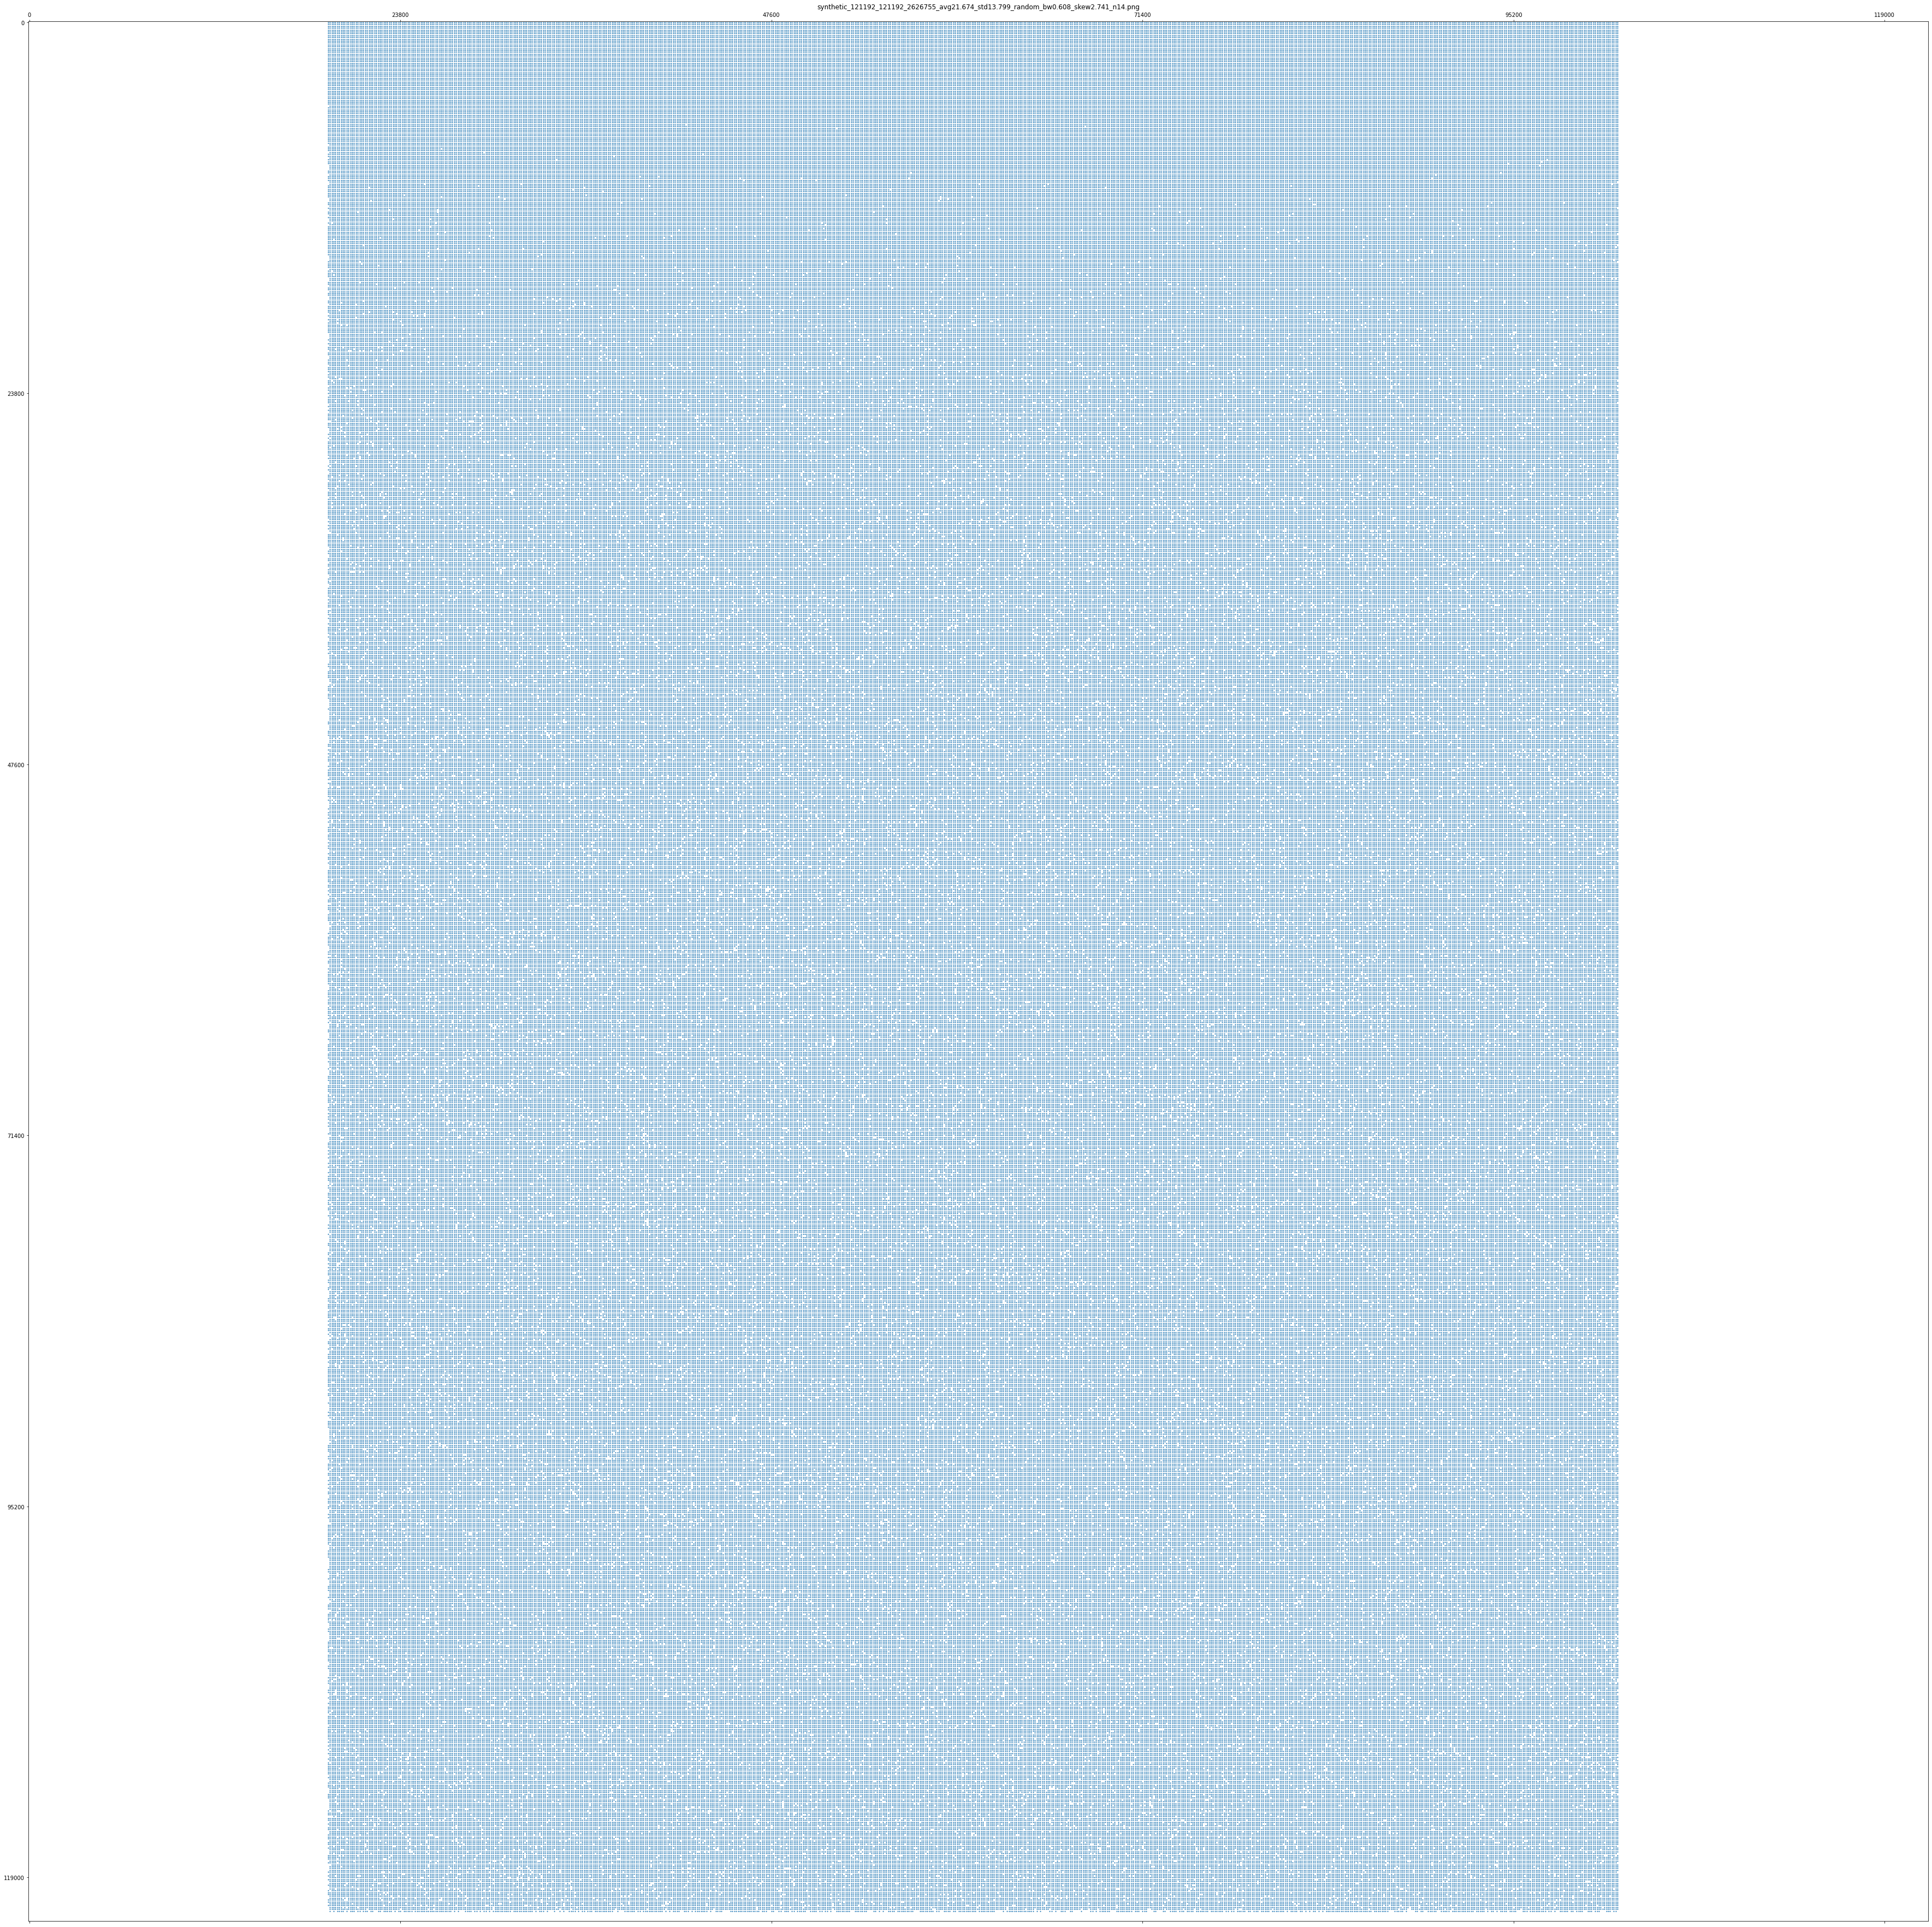

>>> Took me 3.422 seconds to plot and save image of matrix


synthetic_140874_140874_7813336_avg55.463_std11.085_random_bw0.046_skew0.839_n14.mtx :	dimensions (140874, 140874) / nnz 7813336 / mem footprint 89.954 MB (CSR)
>>> Took me 13.493 seconds to read matrix
>>> Took me 48.438 seconds to create image of matrix


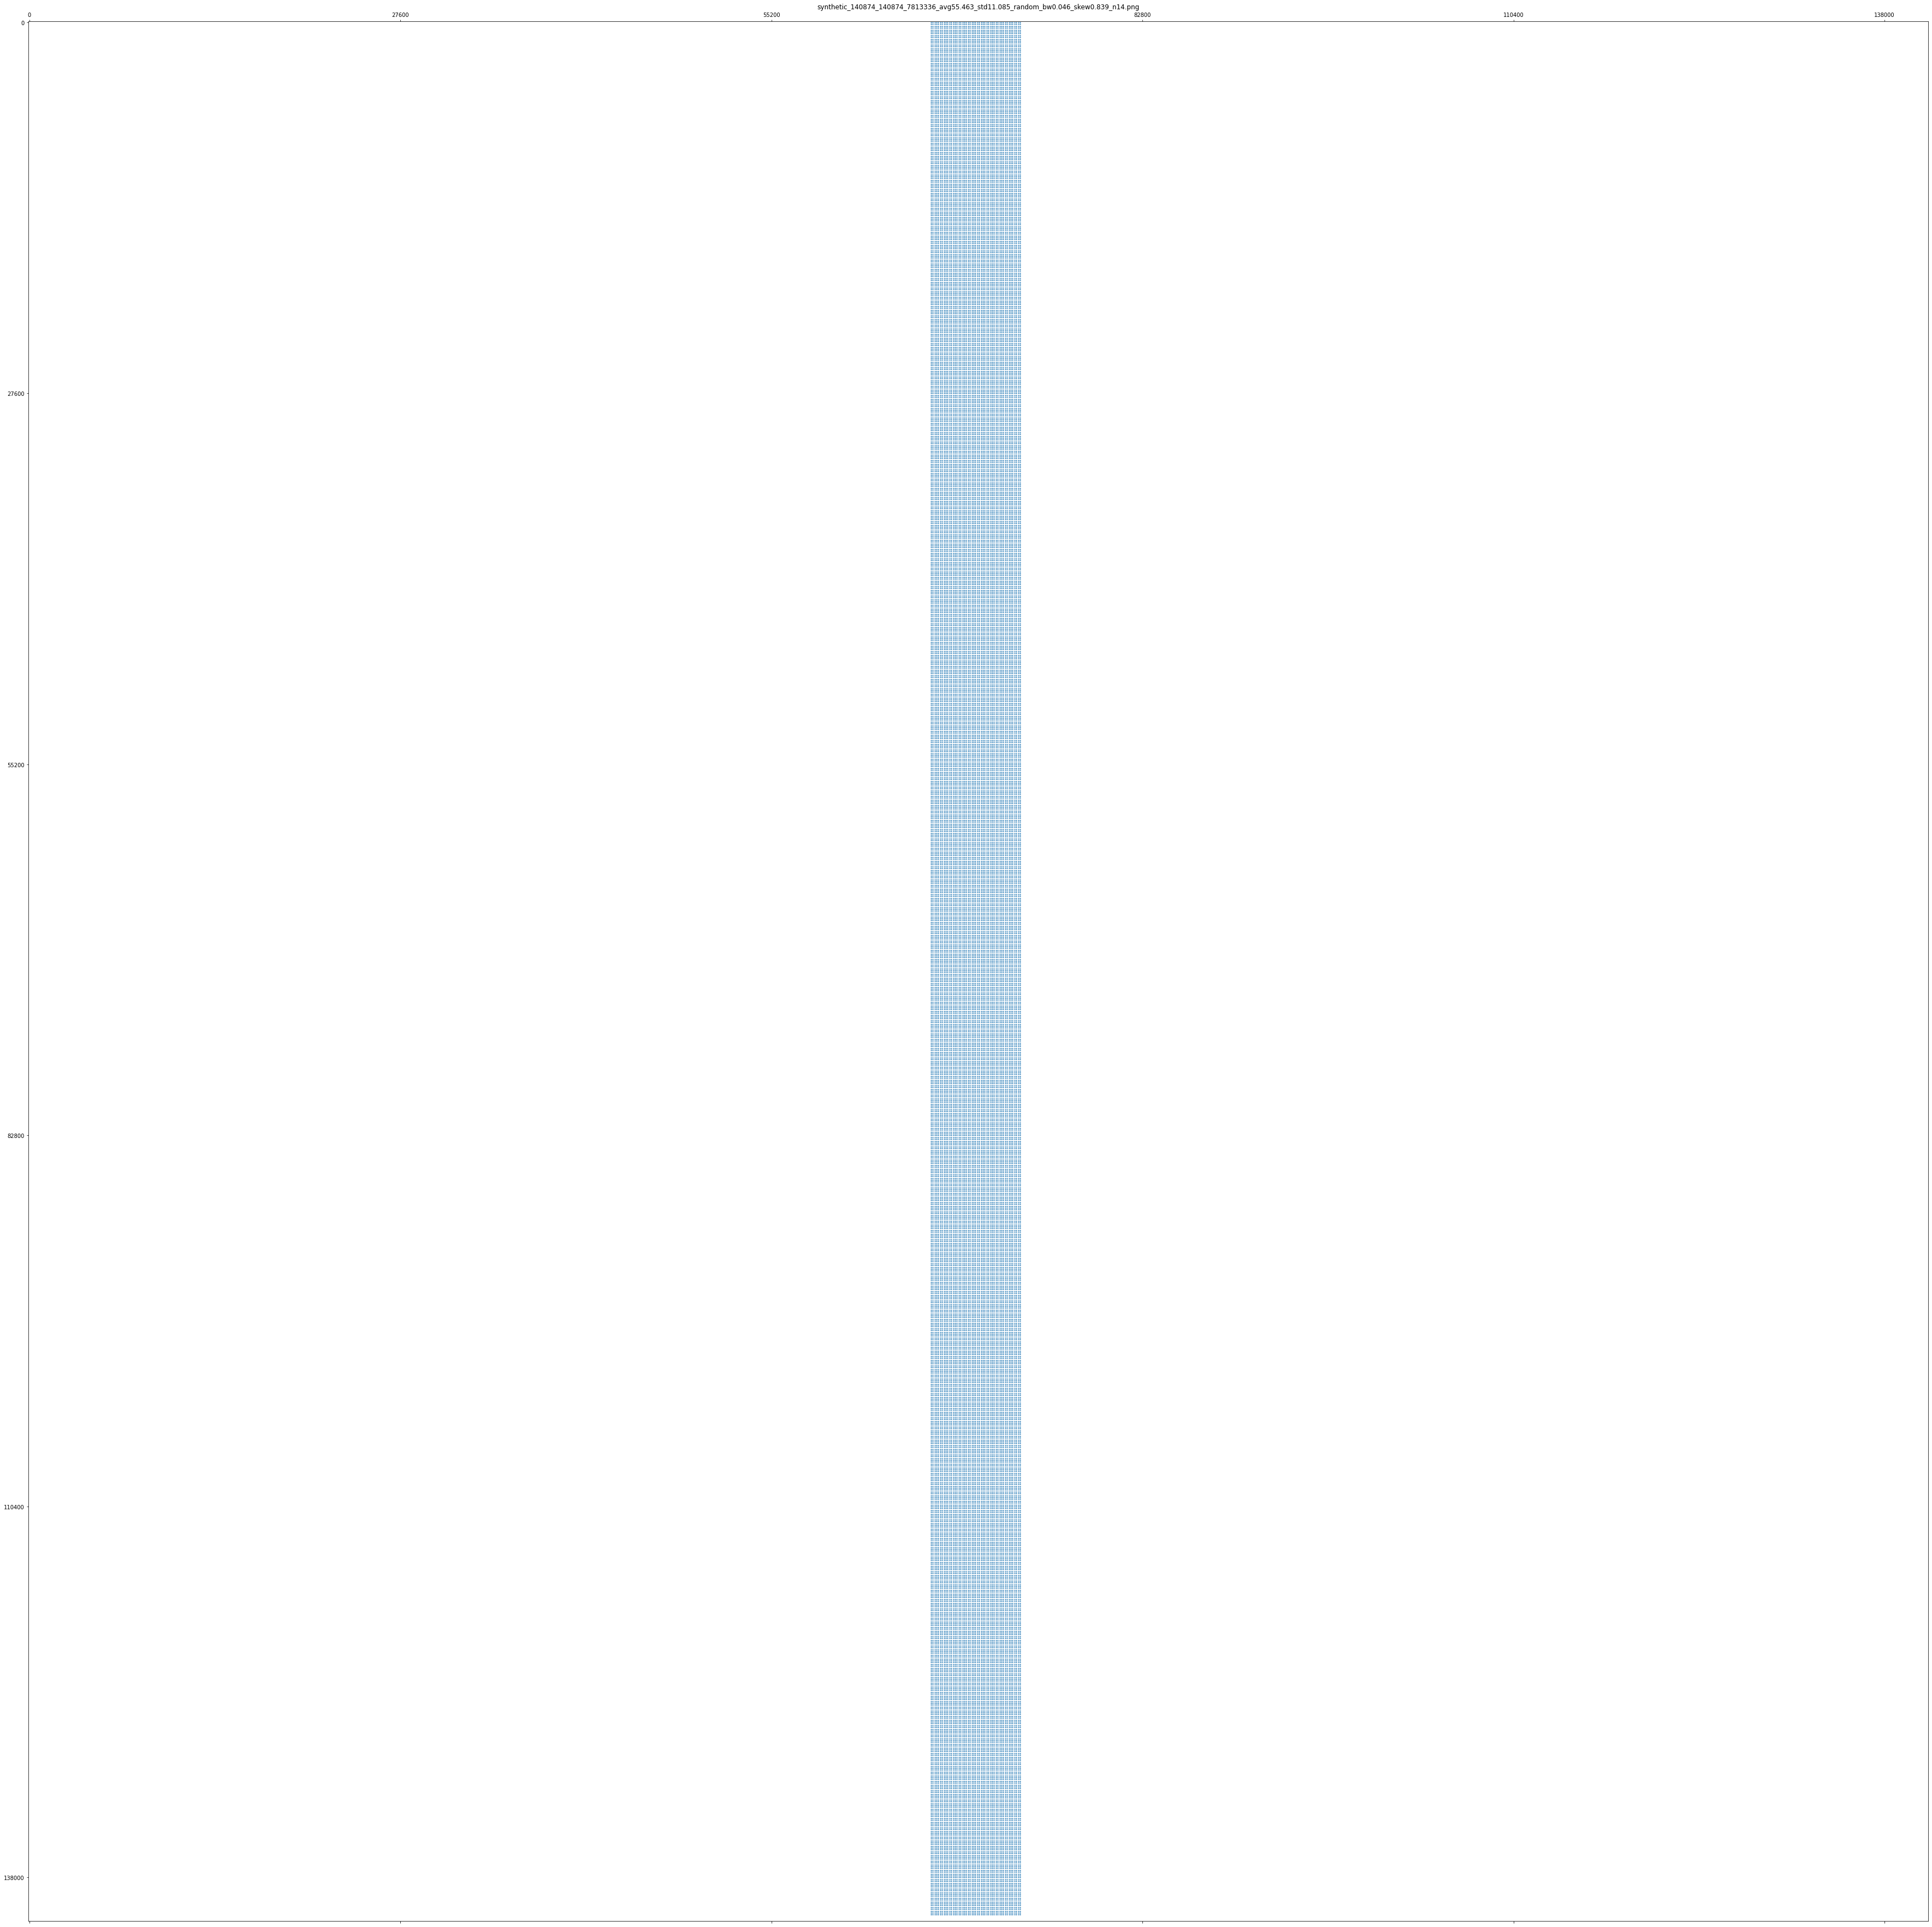

>>> Took me 2.416 seconds to plot and save image of matrix


synthetic_161070_161070_8186221_avg50.824_std19.687_random_bw0.039_skew0.81_n14.mtx :	dimensions (161070, 161070) / nnz 8186221 / mem footprint 94.298 MB (CSR)
>>> Took me 13.981 seconds to read matrix
>>> Took me 52.212 seconds to create image of matrix


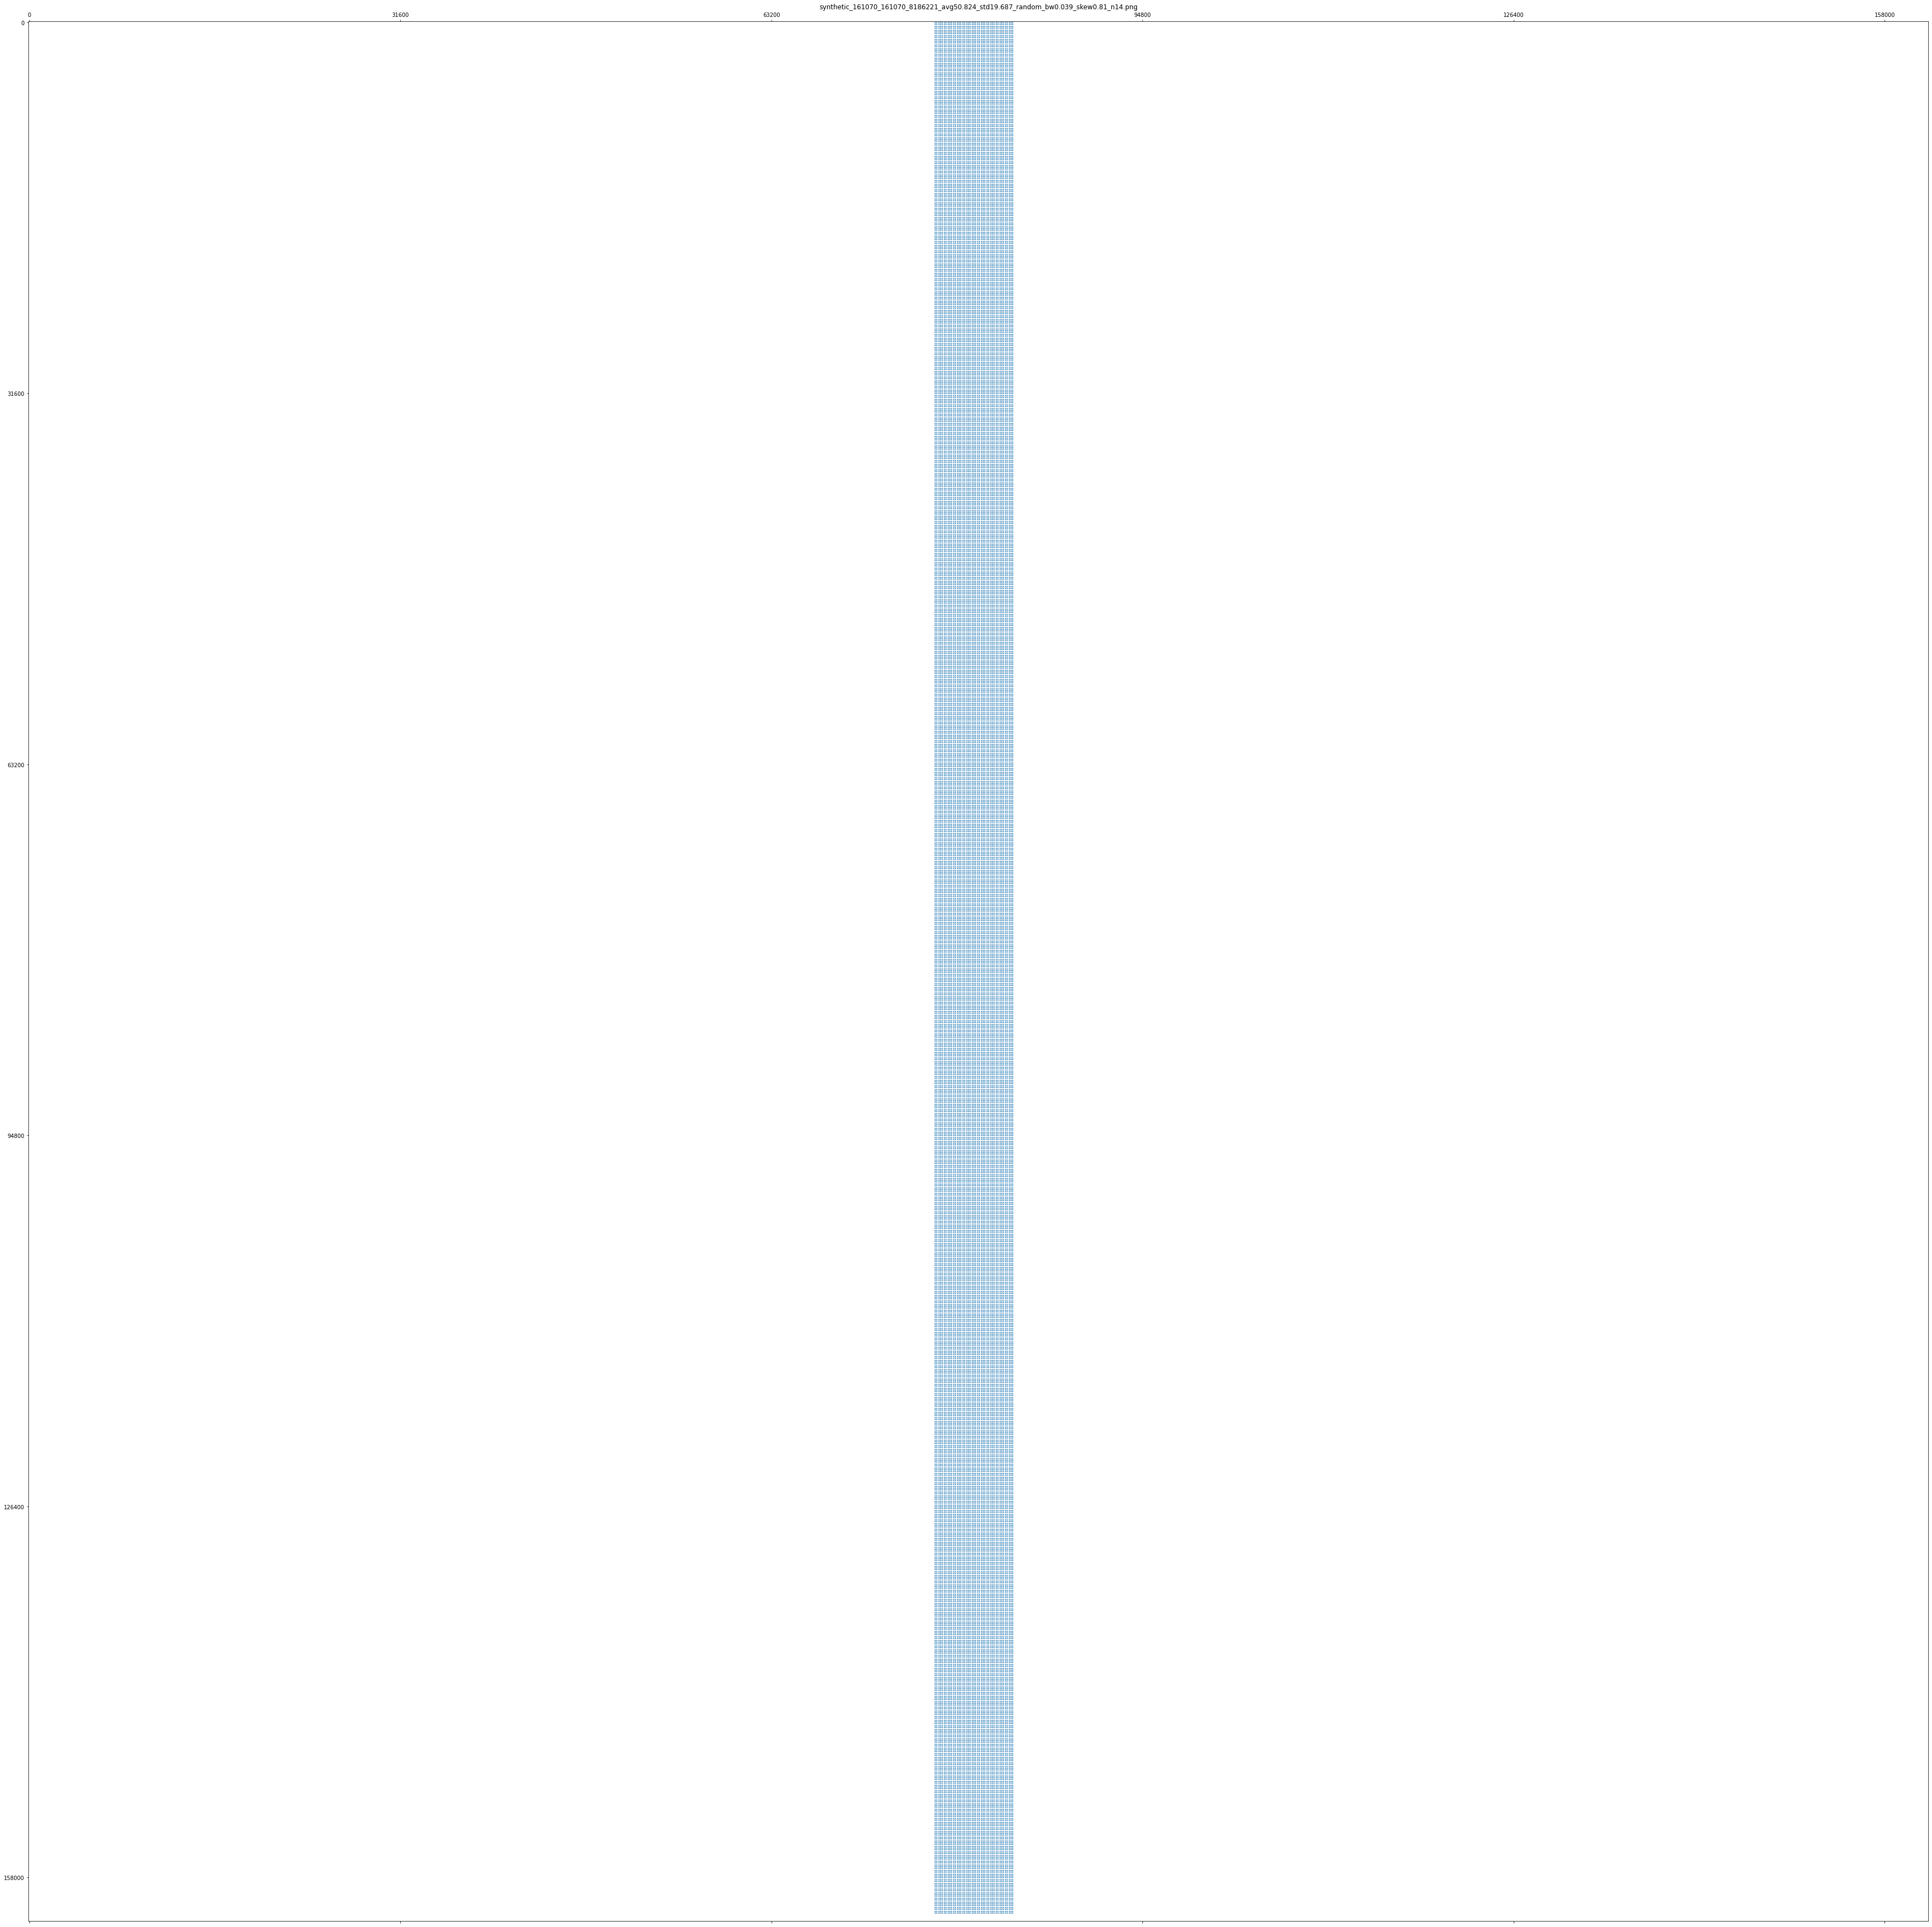

>>> Took me 2.48 seconds to plot and save image of matrix


synthetic_170998_170998_958305_avg5.604_std4.459_random_bw0.287_skew61.947_n14.mtx :	dimensions (170998, 170998) / nnz 958305 / mem footprint 11.619 MB (CSR)
>>> Took me 2.396 seconds to read matrix
>>> Took me 6.414 seconds to create image of matrix


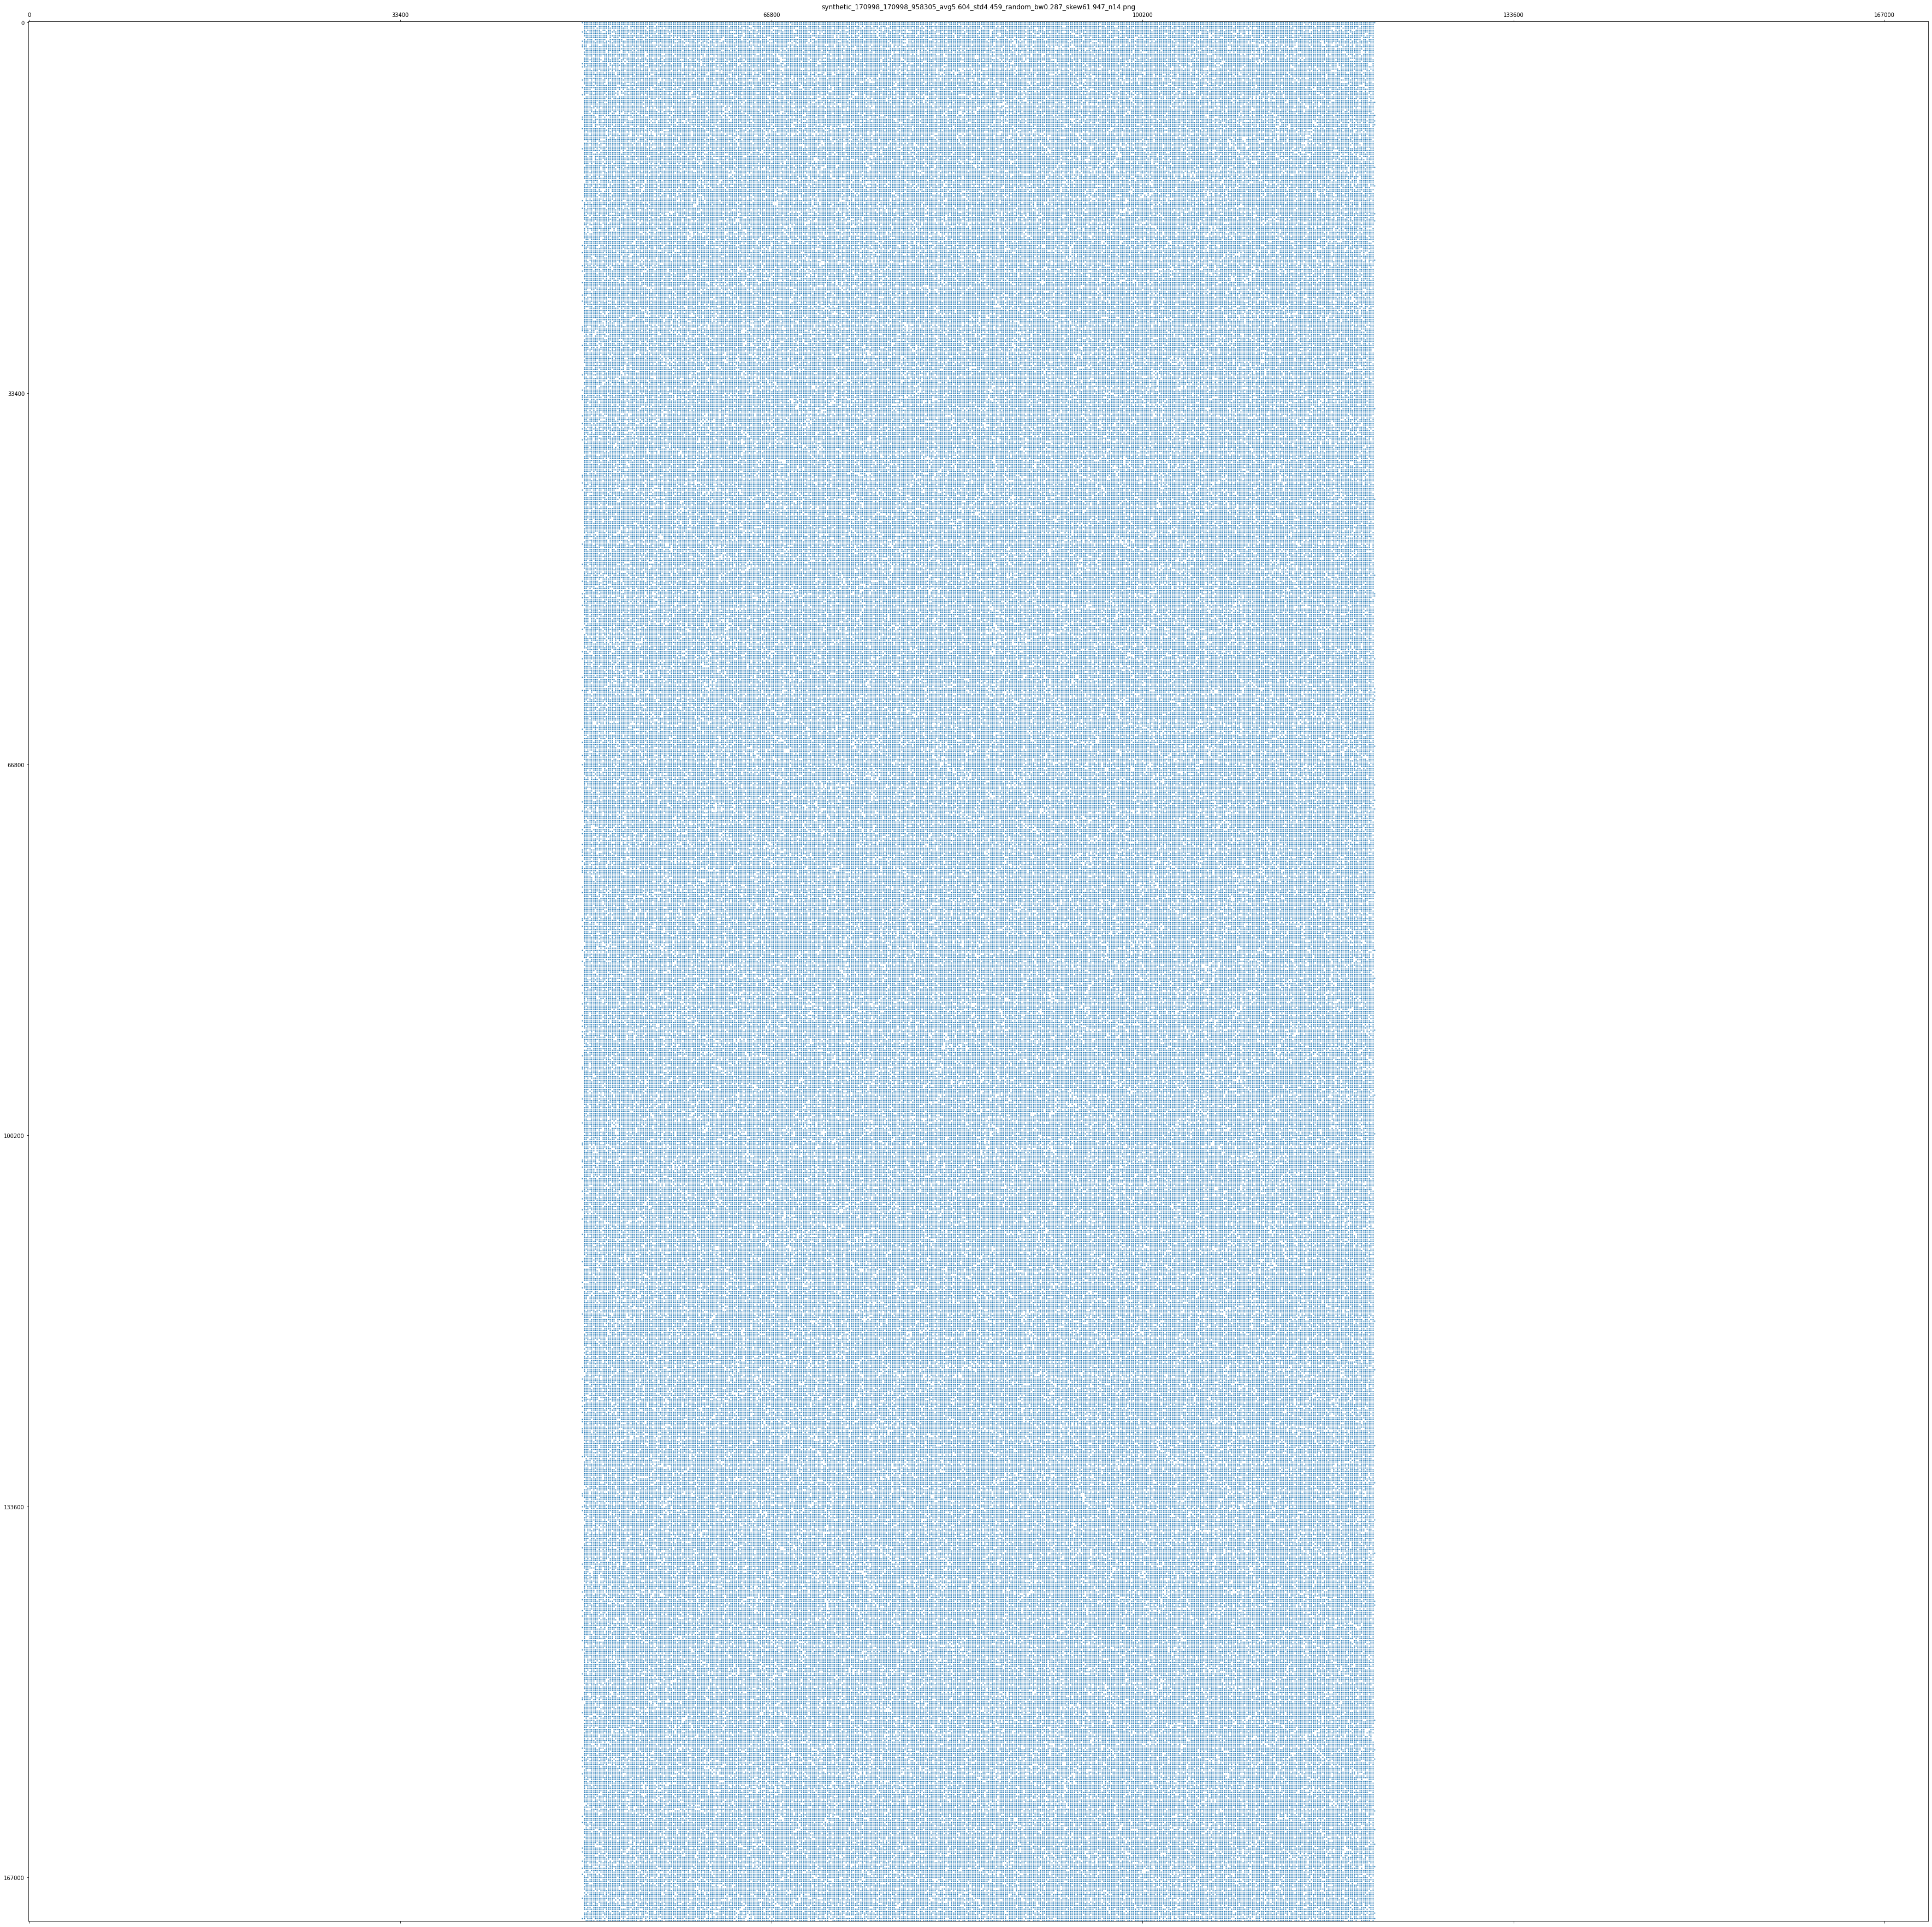

>>> Took me 3.614 seconds to plot and save image of matrix


synthetic_185639_185639_15011481_avg80.864_std117.762_random_bw0.188_skew7.187_n14.mtx :	dimensions (185639, 185639) / nnz 15011481 / mem footprint 172.501 MB (CSR)
>>> Took me 26.568 seconds to read matrix
>>> Took me 96.247 seconds to create image of matrix


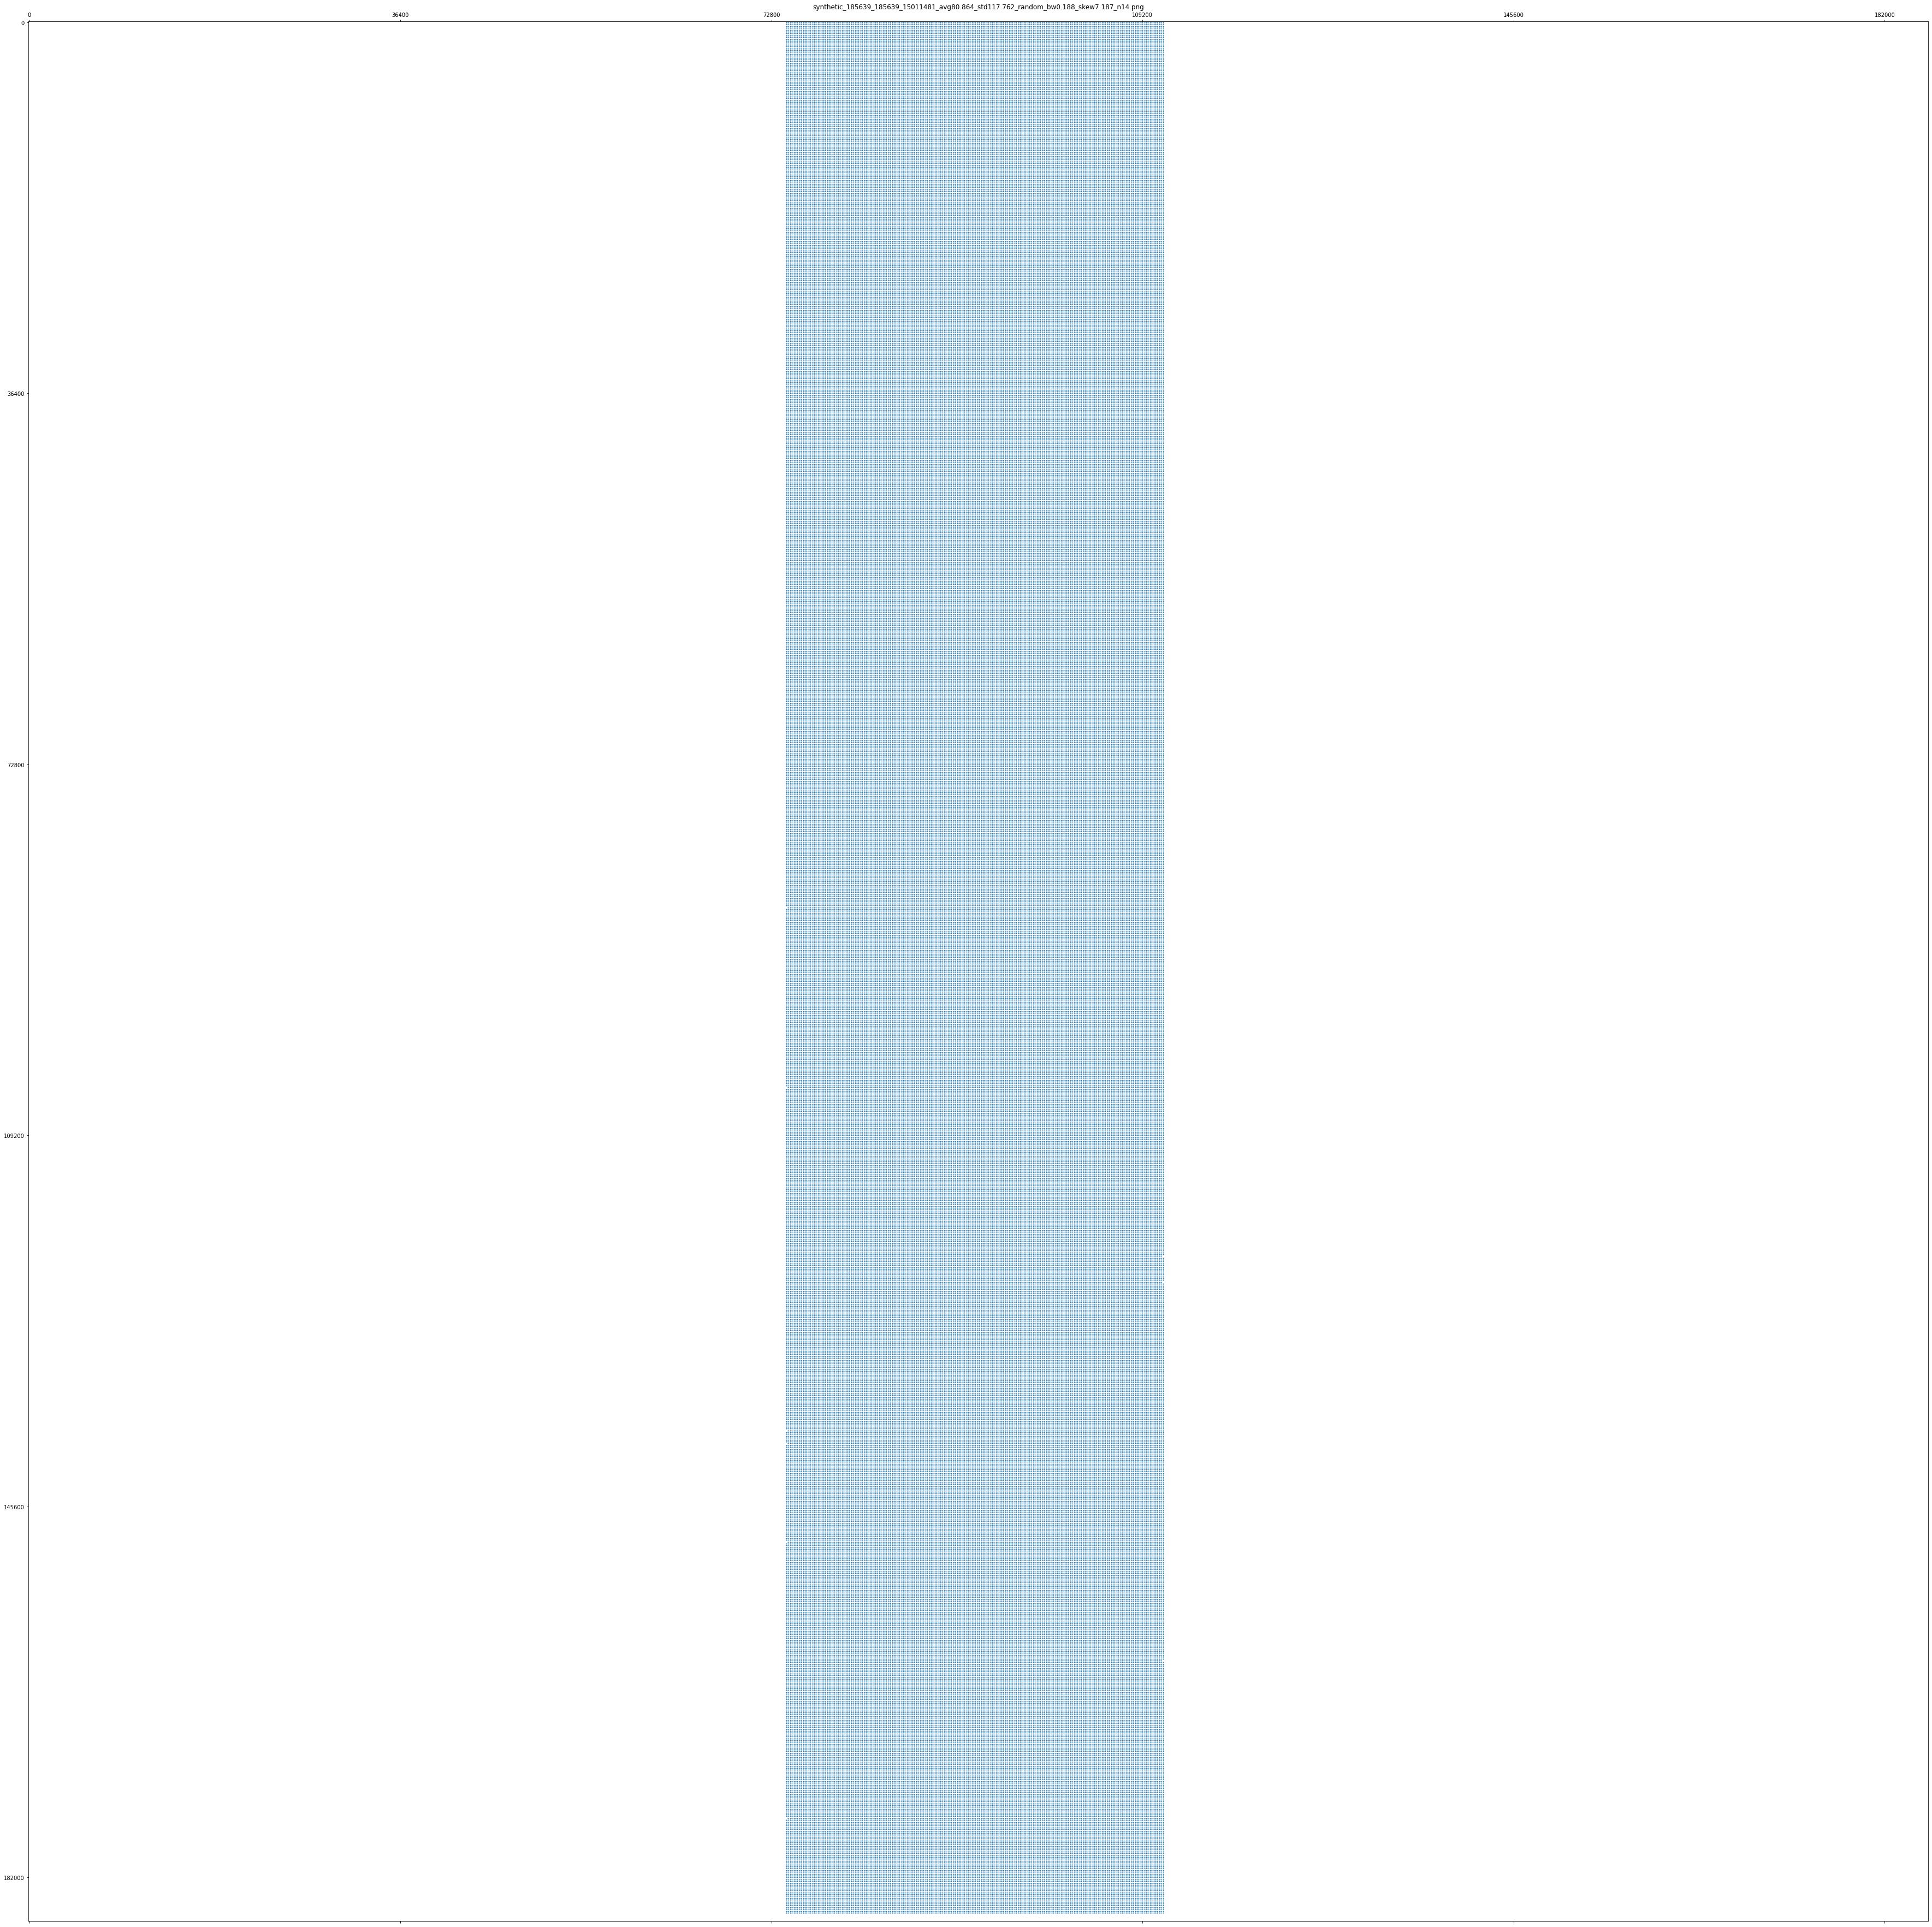

>>> Took me 2.696 seconds to plot and save image of matrix


synthetic_206500_206500_1273294_avg6.166_std4.444_random_bw0.002_skew6.135_n14.mtx :	dimensions (206500, 206500) / nnz 1273294 / mem footprint 15.359 MB (CSR)
>>> Took me 2.157 seconds to read matrix
>>> Took me 8.022 seconds to create image of matrix


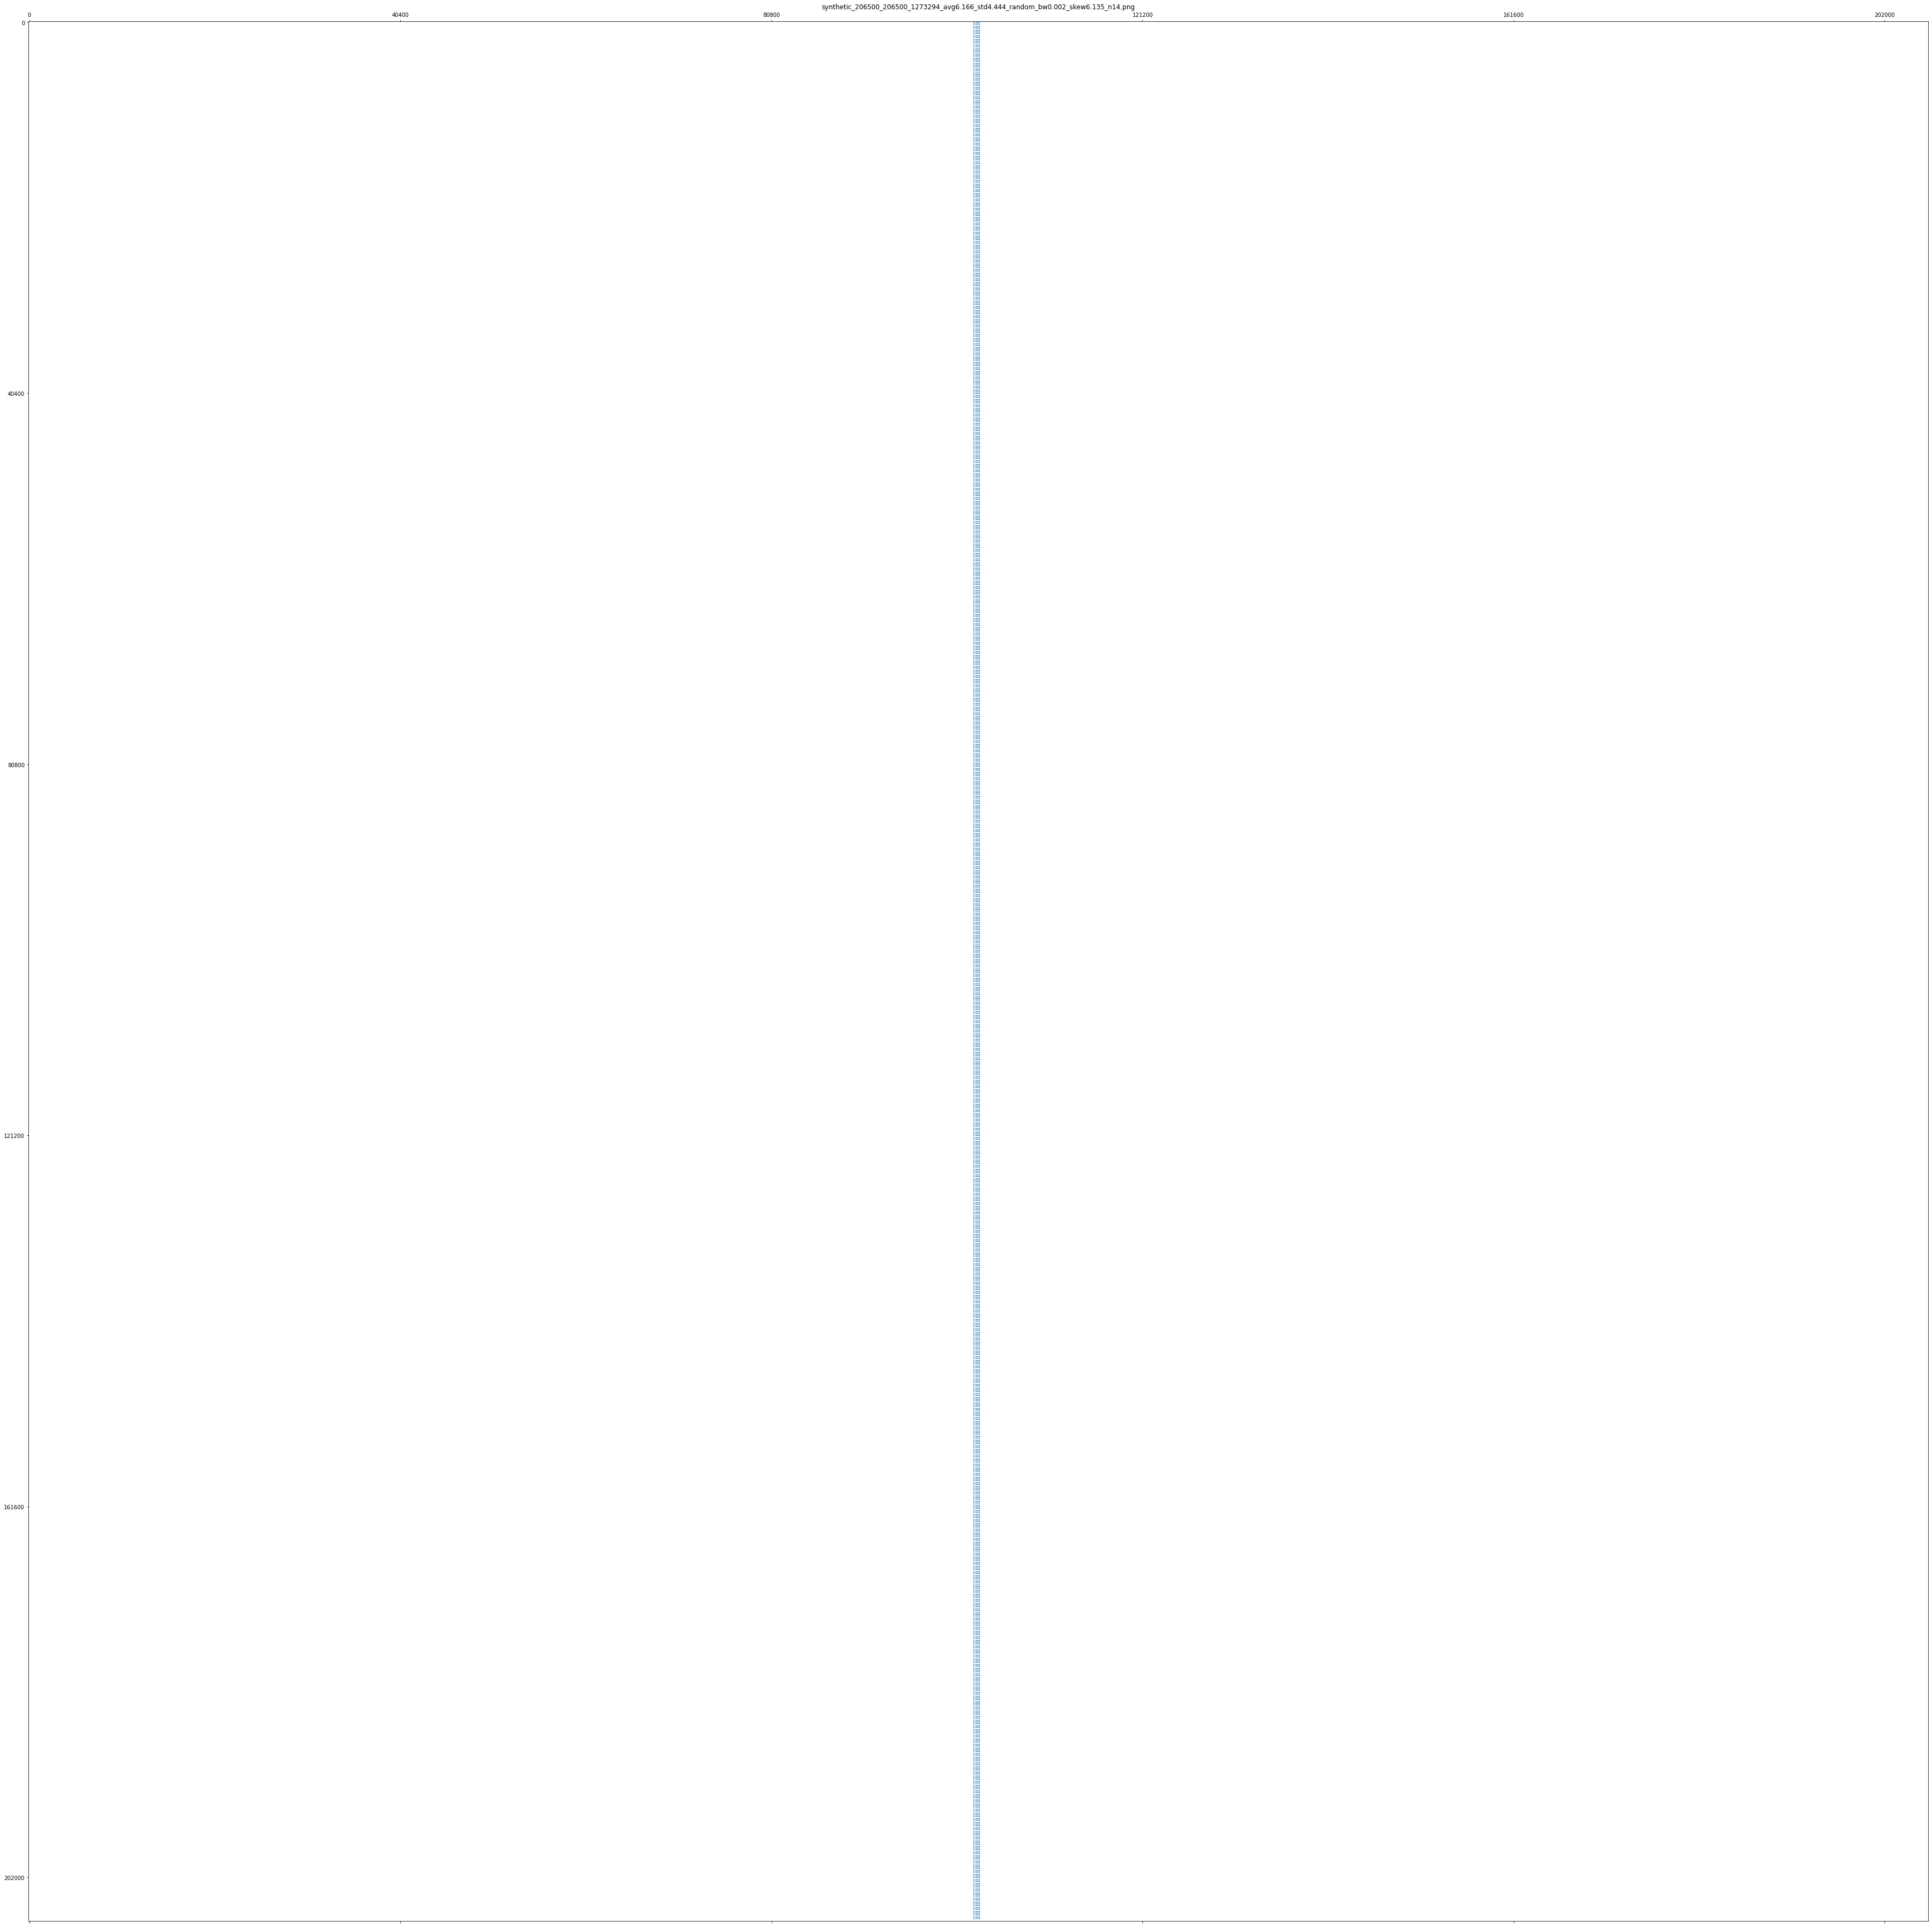

>>> Took me 2.405 seconds to plot and save image of matrix


synthetic_217918_217918_11619584_avg53.321_std4.756_random_bw0.059_skew2.371_n14.mtx :	dimensions (217918, 217918) / nnz 11619584 / mem footprint 133.807 MB (CSR)
>>> Took me 17.76 seconds to read matrix
>>> Took me 70.078 seconds to create image of matrix


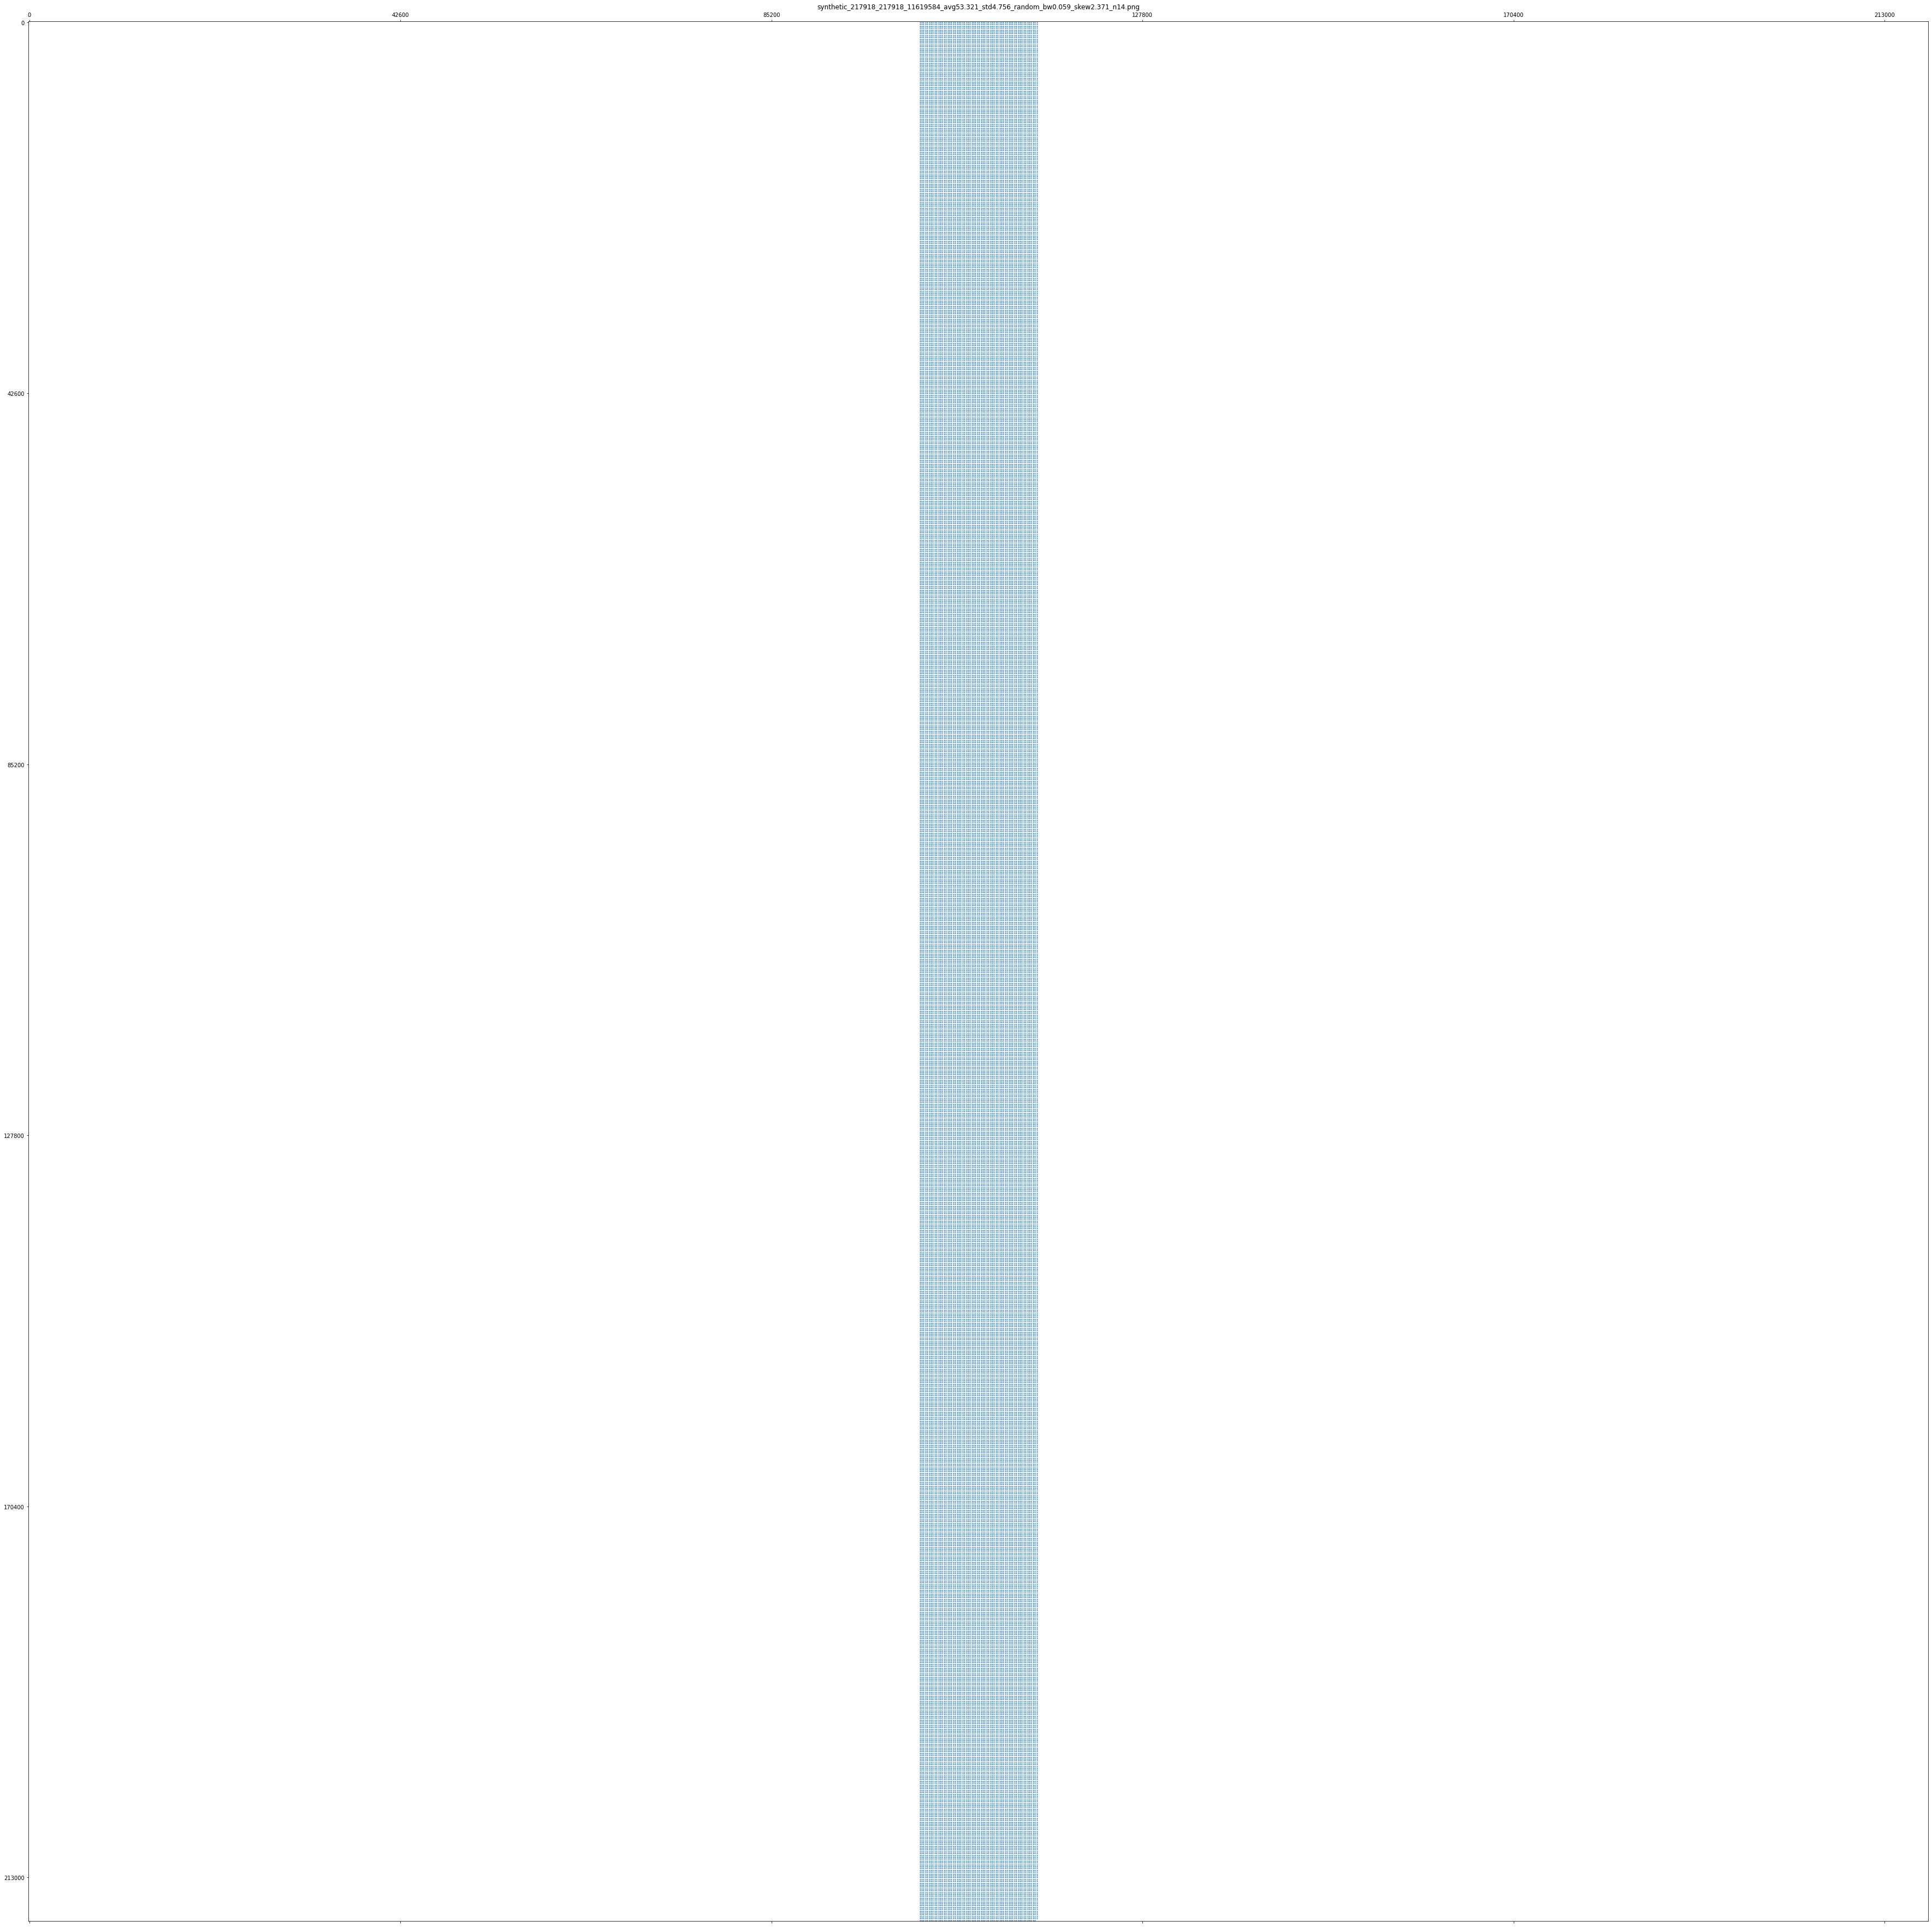

>>> Took me 2.448 seconds to plot and save image of matrix


synthetic_268096_268096_18498642_avg69.0_std101.276_random_bw0.168_skew9.179_n14.mtx :	dimensions (268096, 268096) / nnz 18498642 / mem footprint 212.723 MB (CSR)
>>> Took me 32.545 seconds to read matrix
>>> Took me 97.348 seconds to create image of matrix


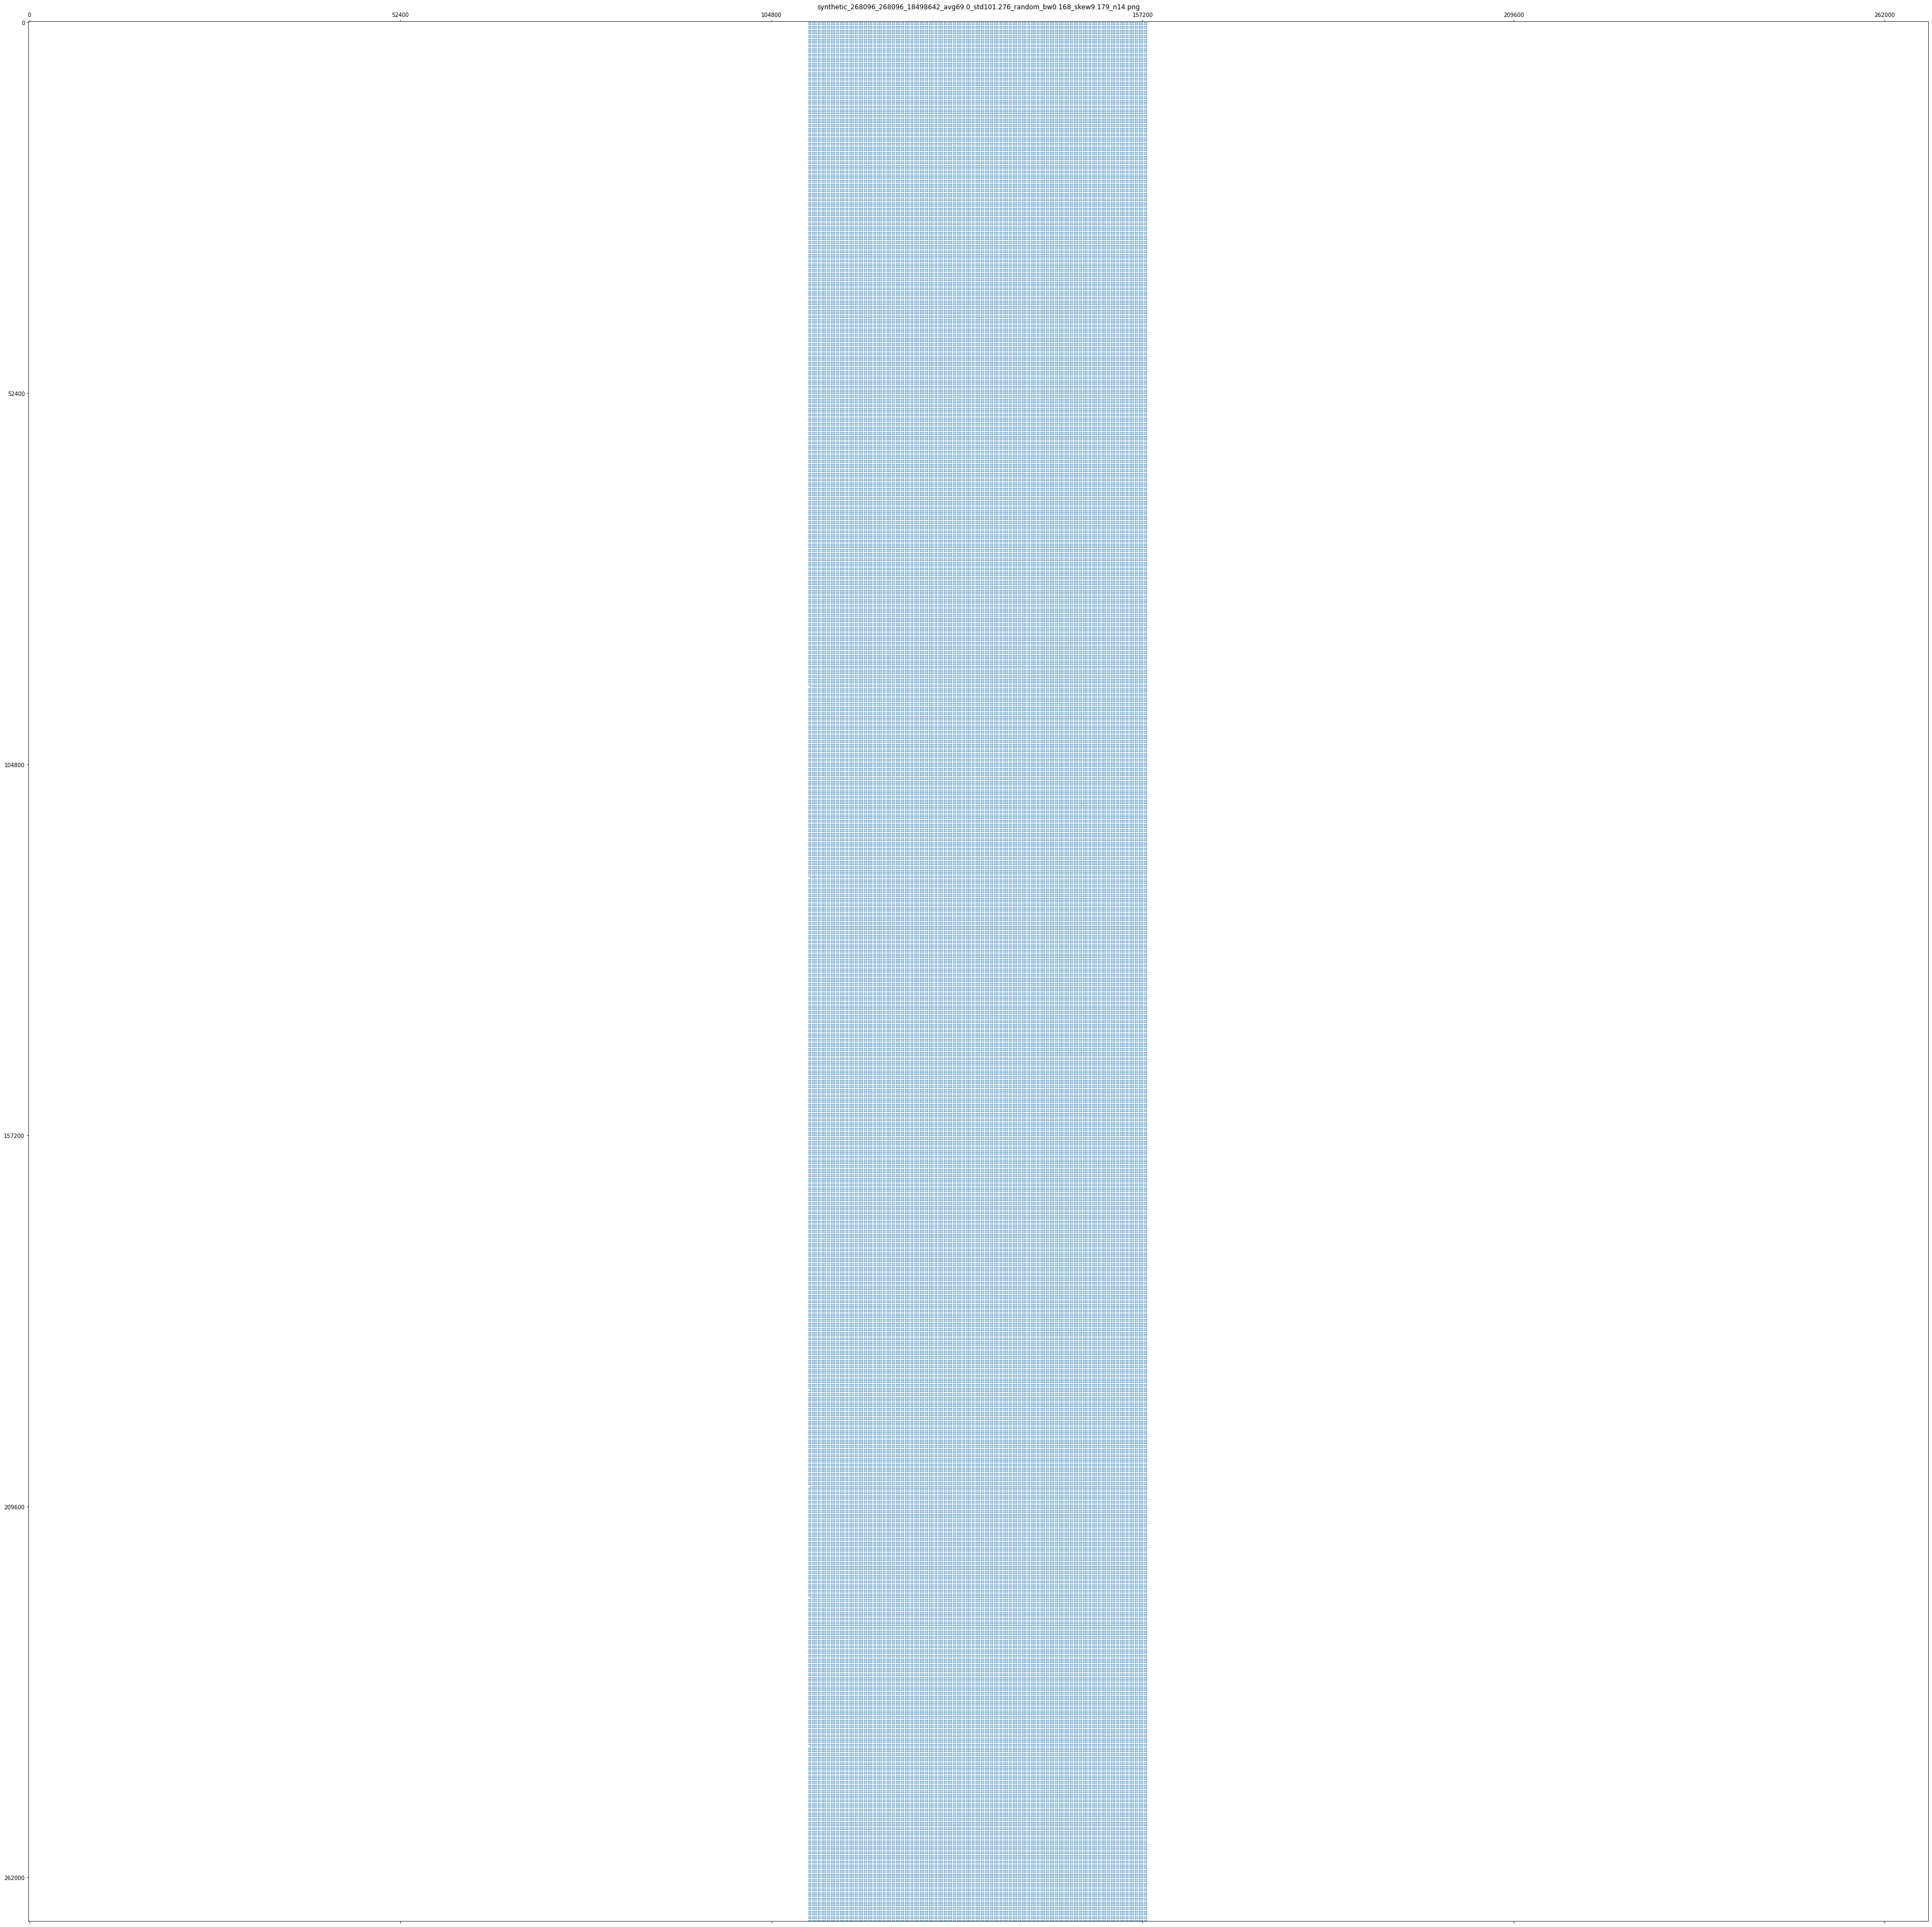

>>> Took me 2.305 seconds to plot and save image of matrix


synthetic_525825_525825_2104694_avg4.003_std0.078_random_bw0.001_skew0.001_n14.mtx :	dimensions (525825, 525825) / nnz 2104694 / mem footprint 26.092 MB (CSR)
>>> Took me 3.073 seconds to read matrix
>>> Took me 10.97 seconds to create image of matrix


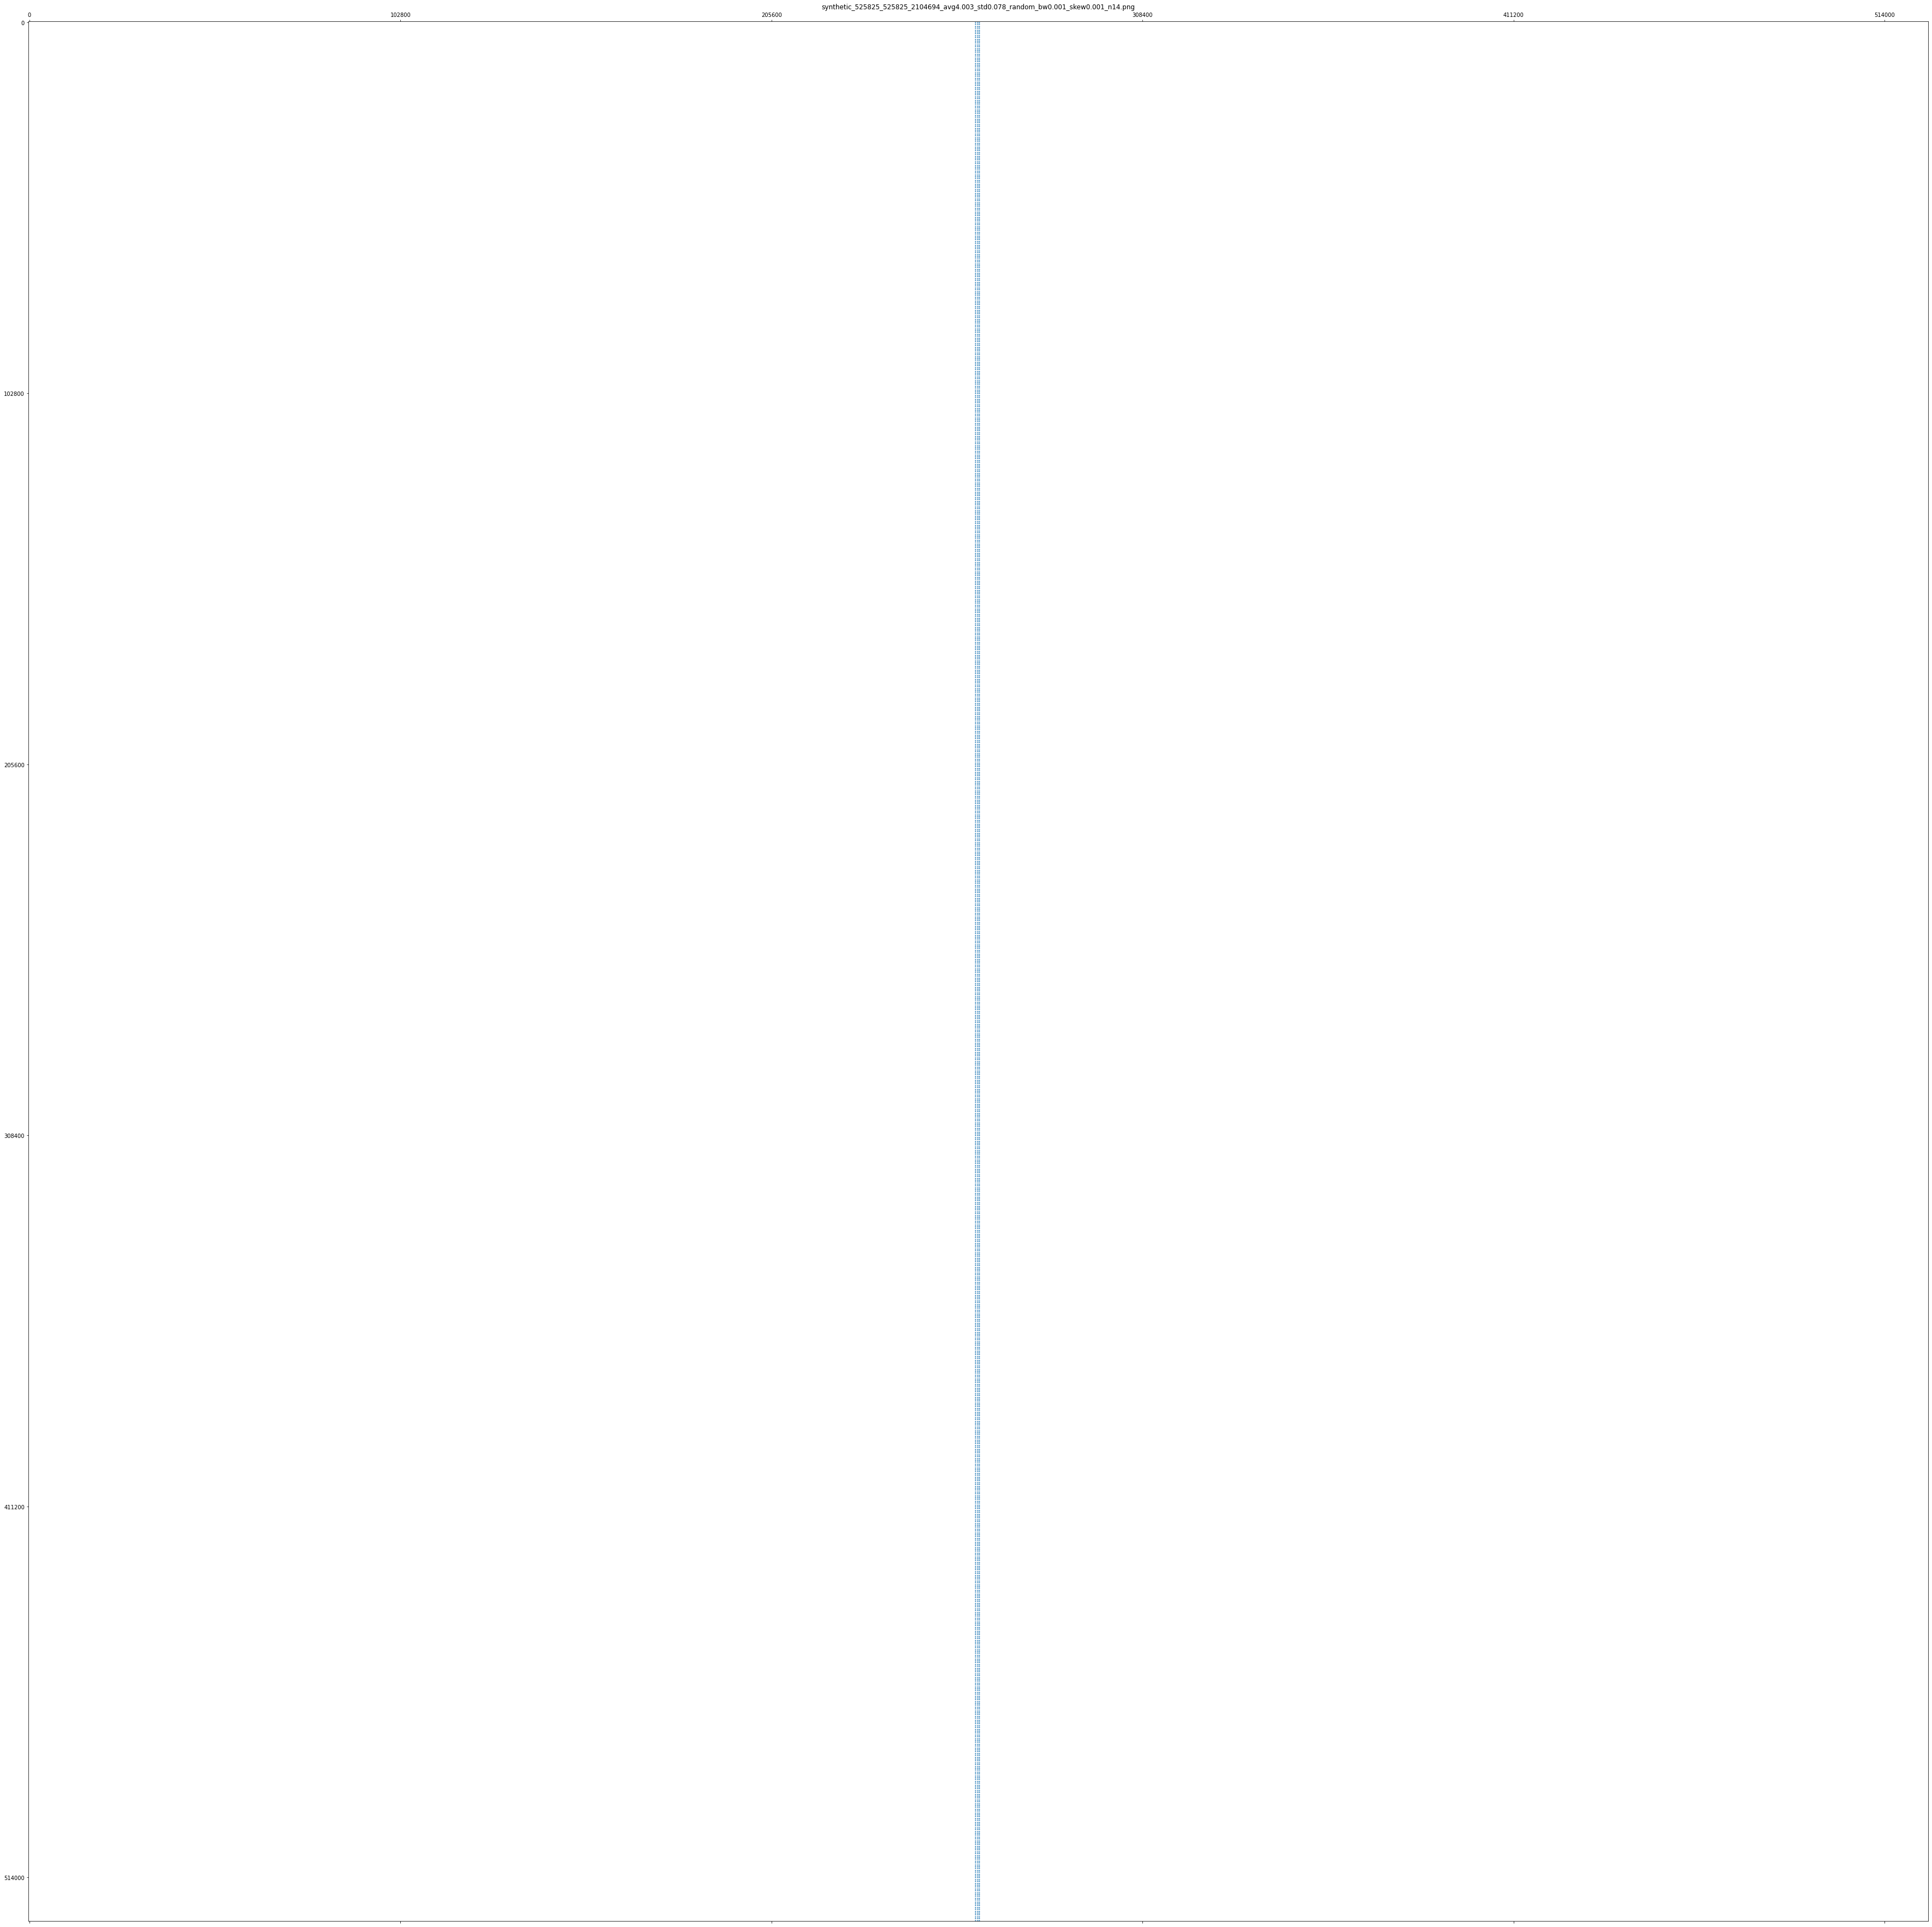

>>> Took me 2.084 seconds to plot and save image of matrix


synthetic_862664_862664_19213423_avg22.272_std29.816_random_bw0.249_skew312.266_n14.mtx :	dimensions (862664, 862664) / nnz 19213423 / mem footprint 223.171 MB (CSR)
>>> Took me 28.121 seconds to read matrix
>>> Took me 108.274 seconds to create image of matrix


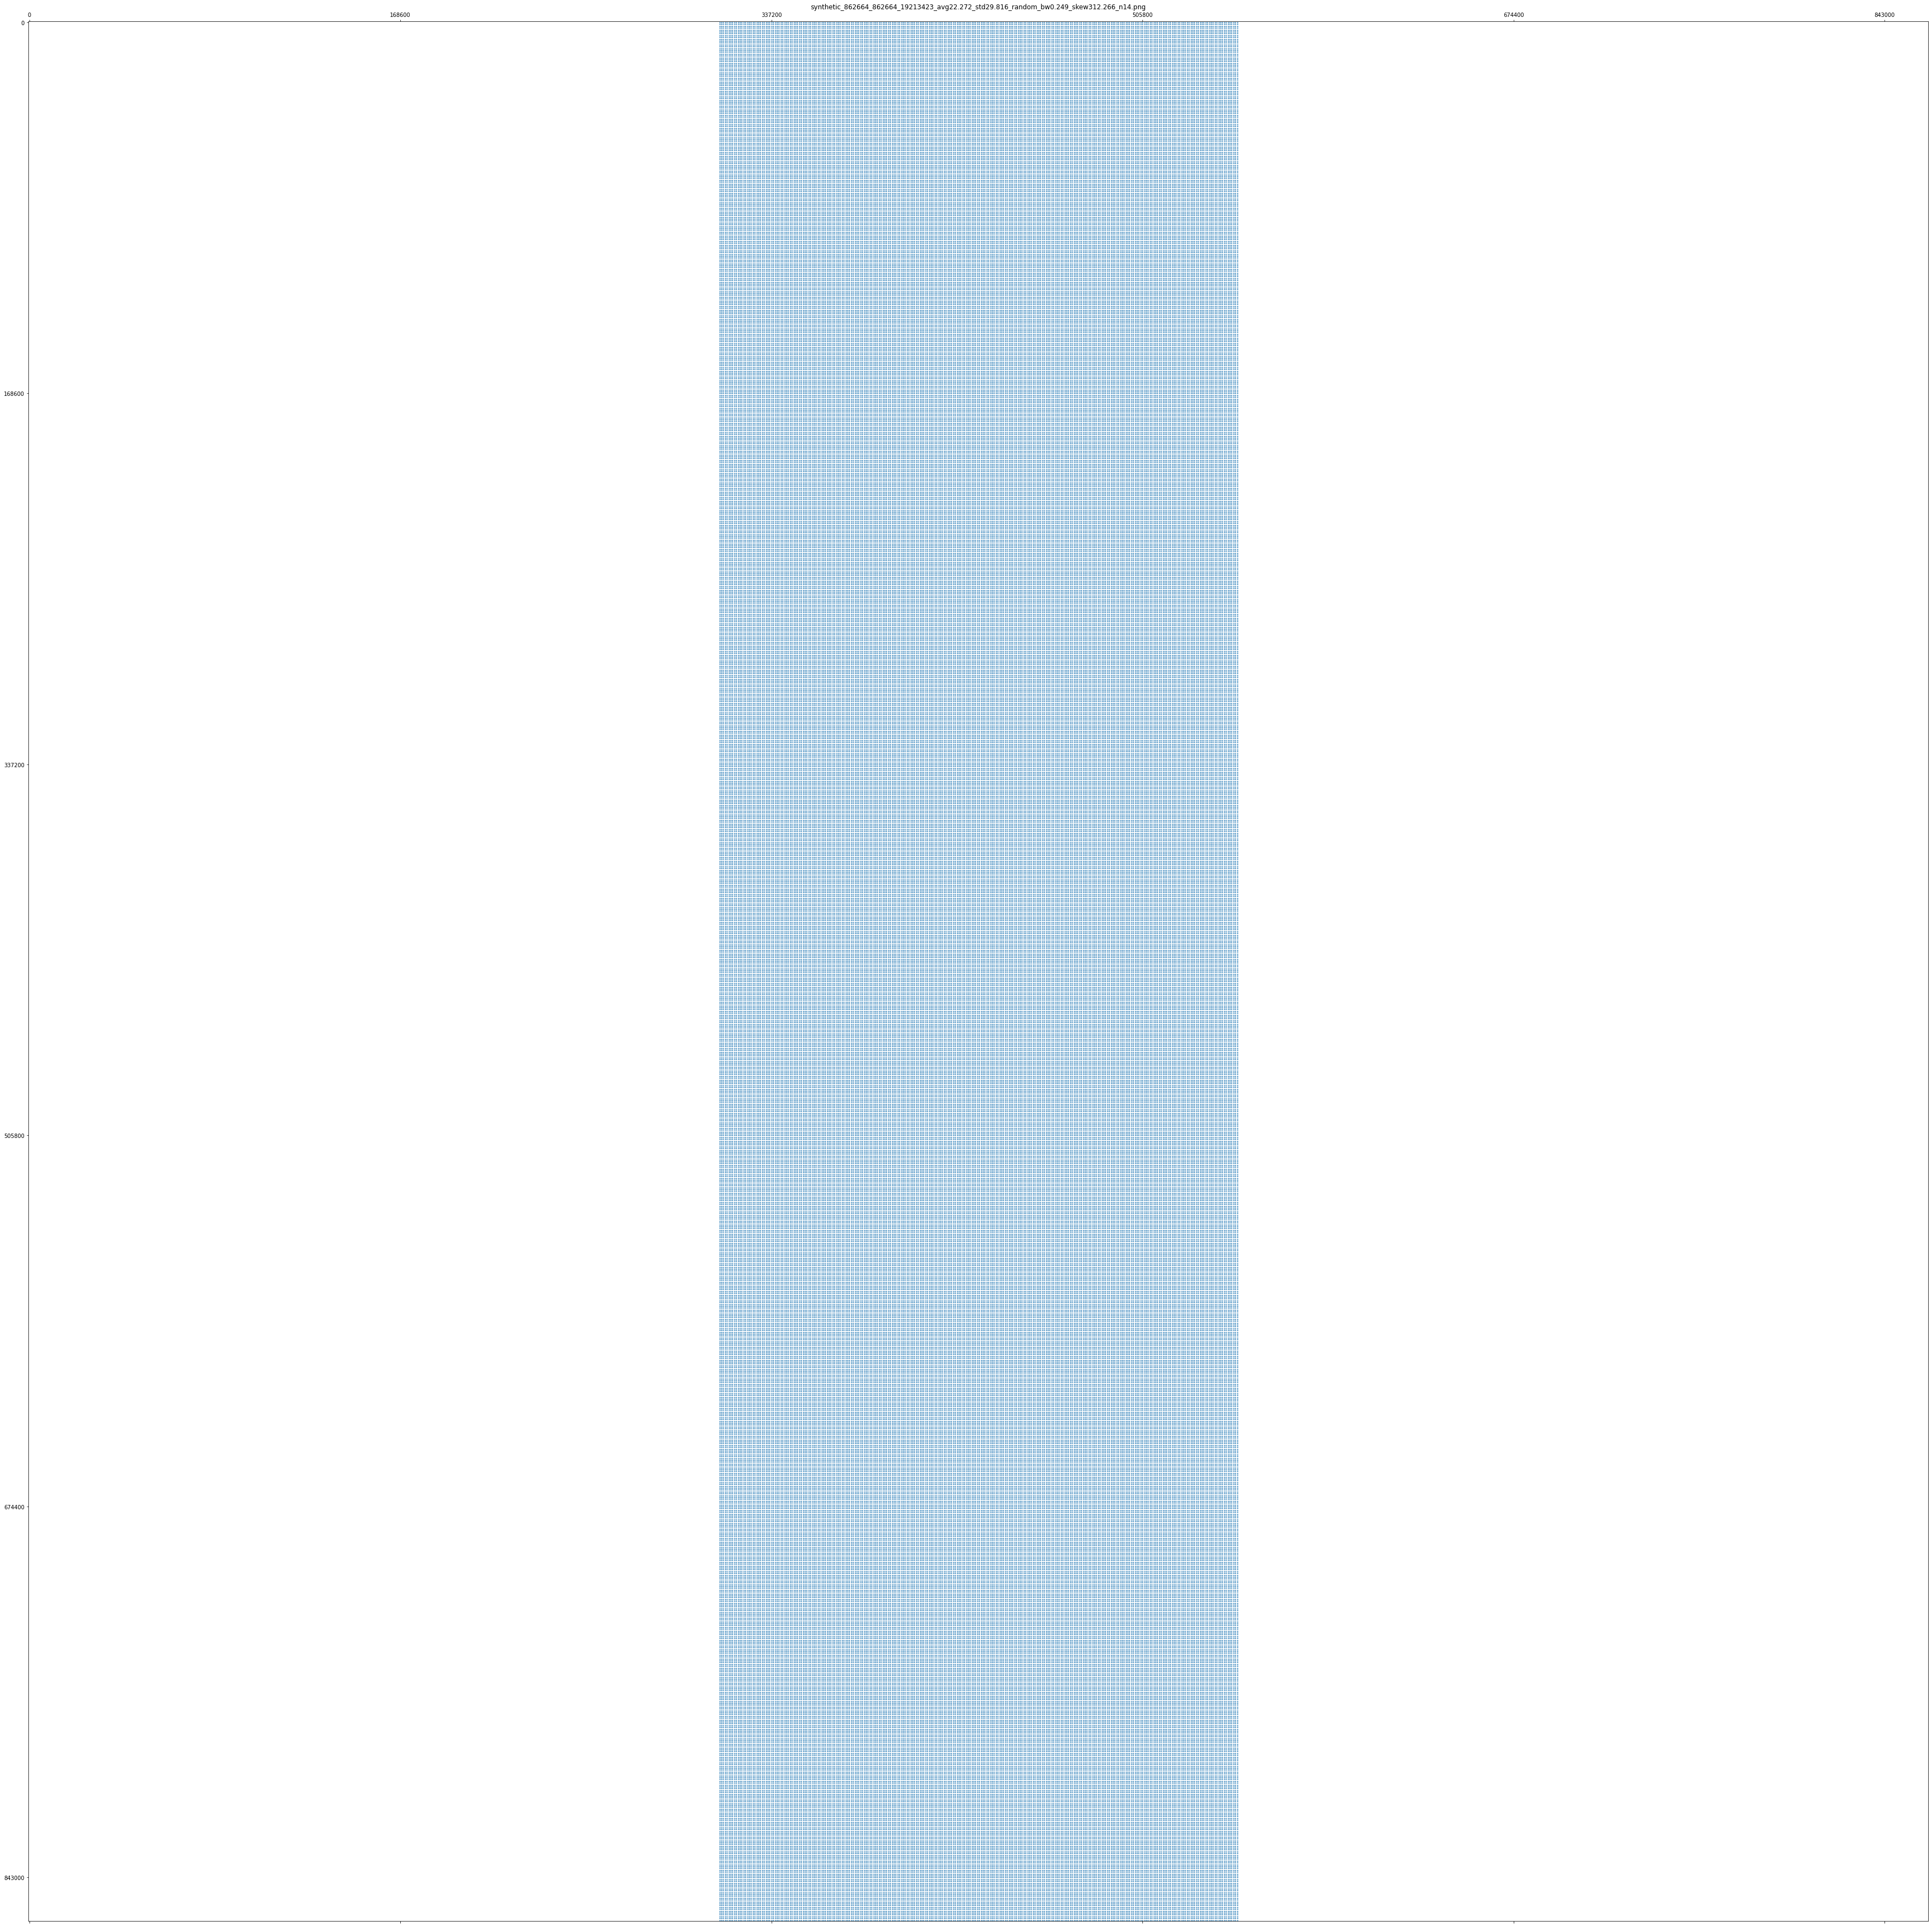

>>> Took me 2.455 seconds to plot and save image of matrix


synthetic_952203_952203_46522684_avg48.858_std11.947_random_bw0.204_skew0.576_n14.mtx :	dimensions (952203, 952203) / nnz 46522684 / mem footprint 536.042 MB (CSR)
>>> Took me 74.304 seconds to read matrix
>>> Took me 257.693 seconds to create image of matrix


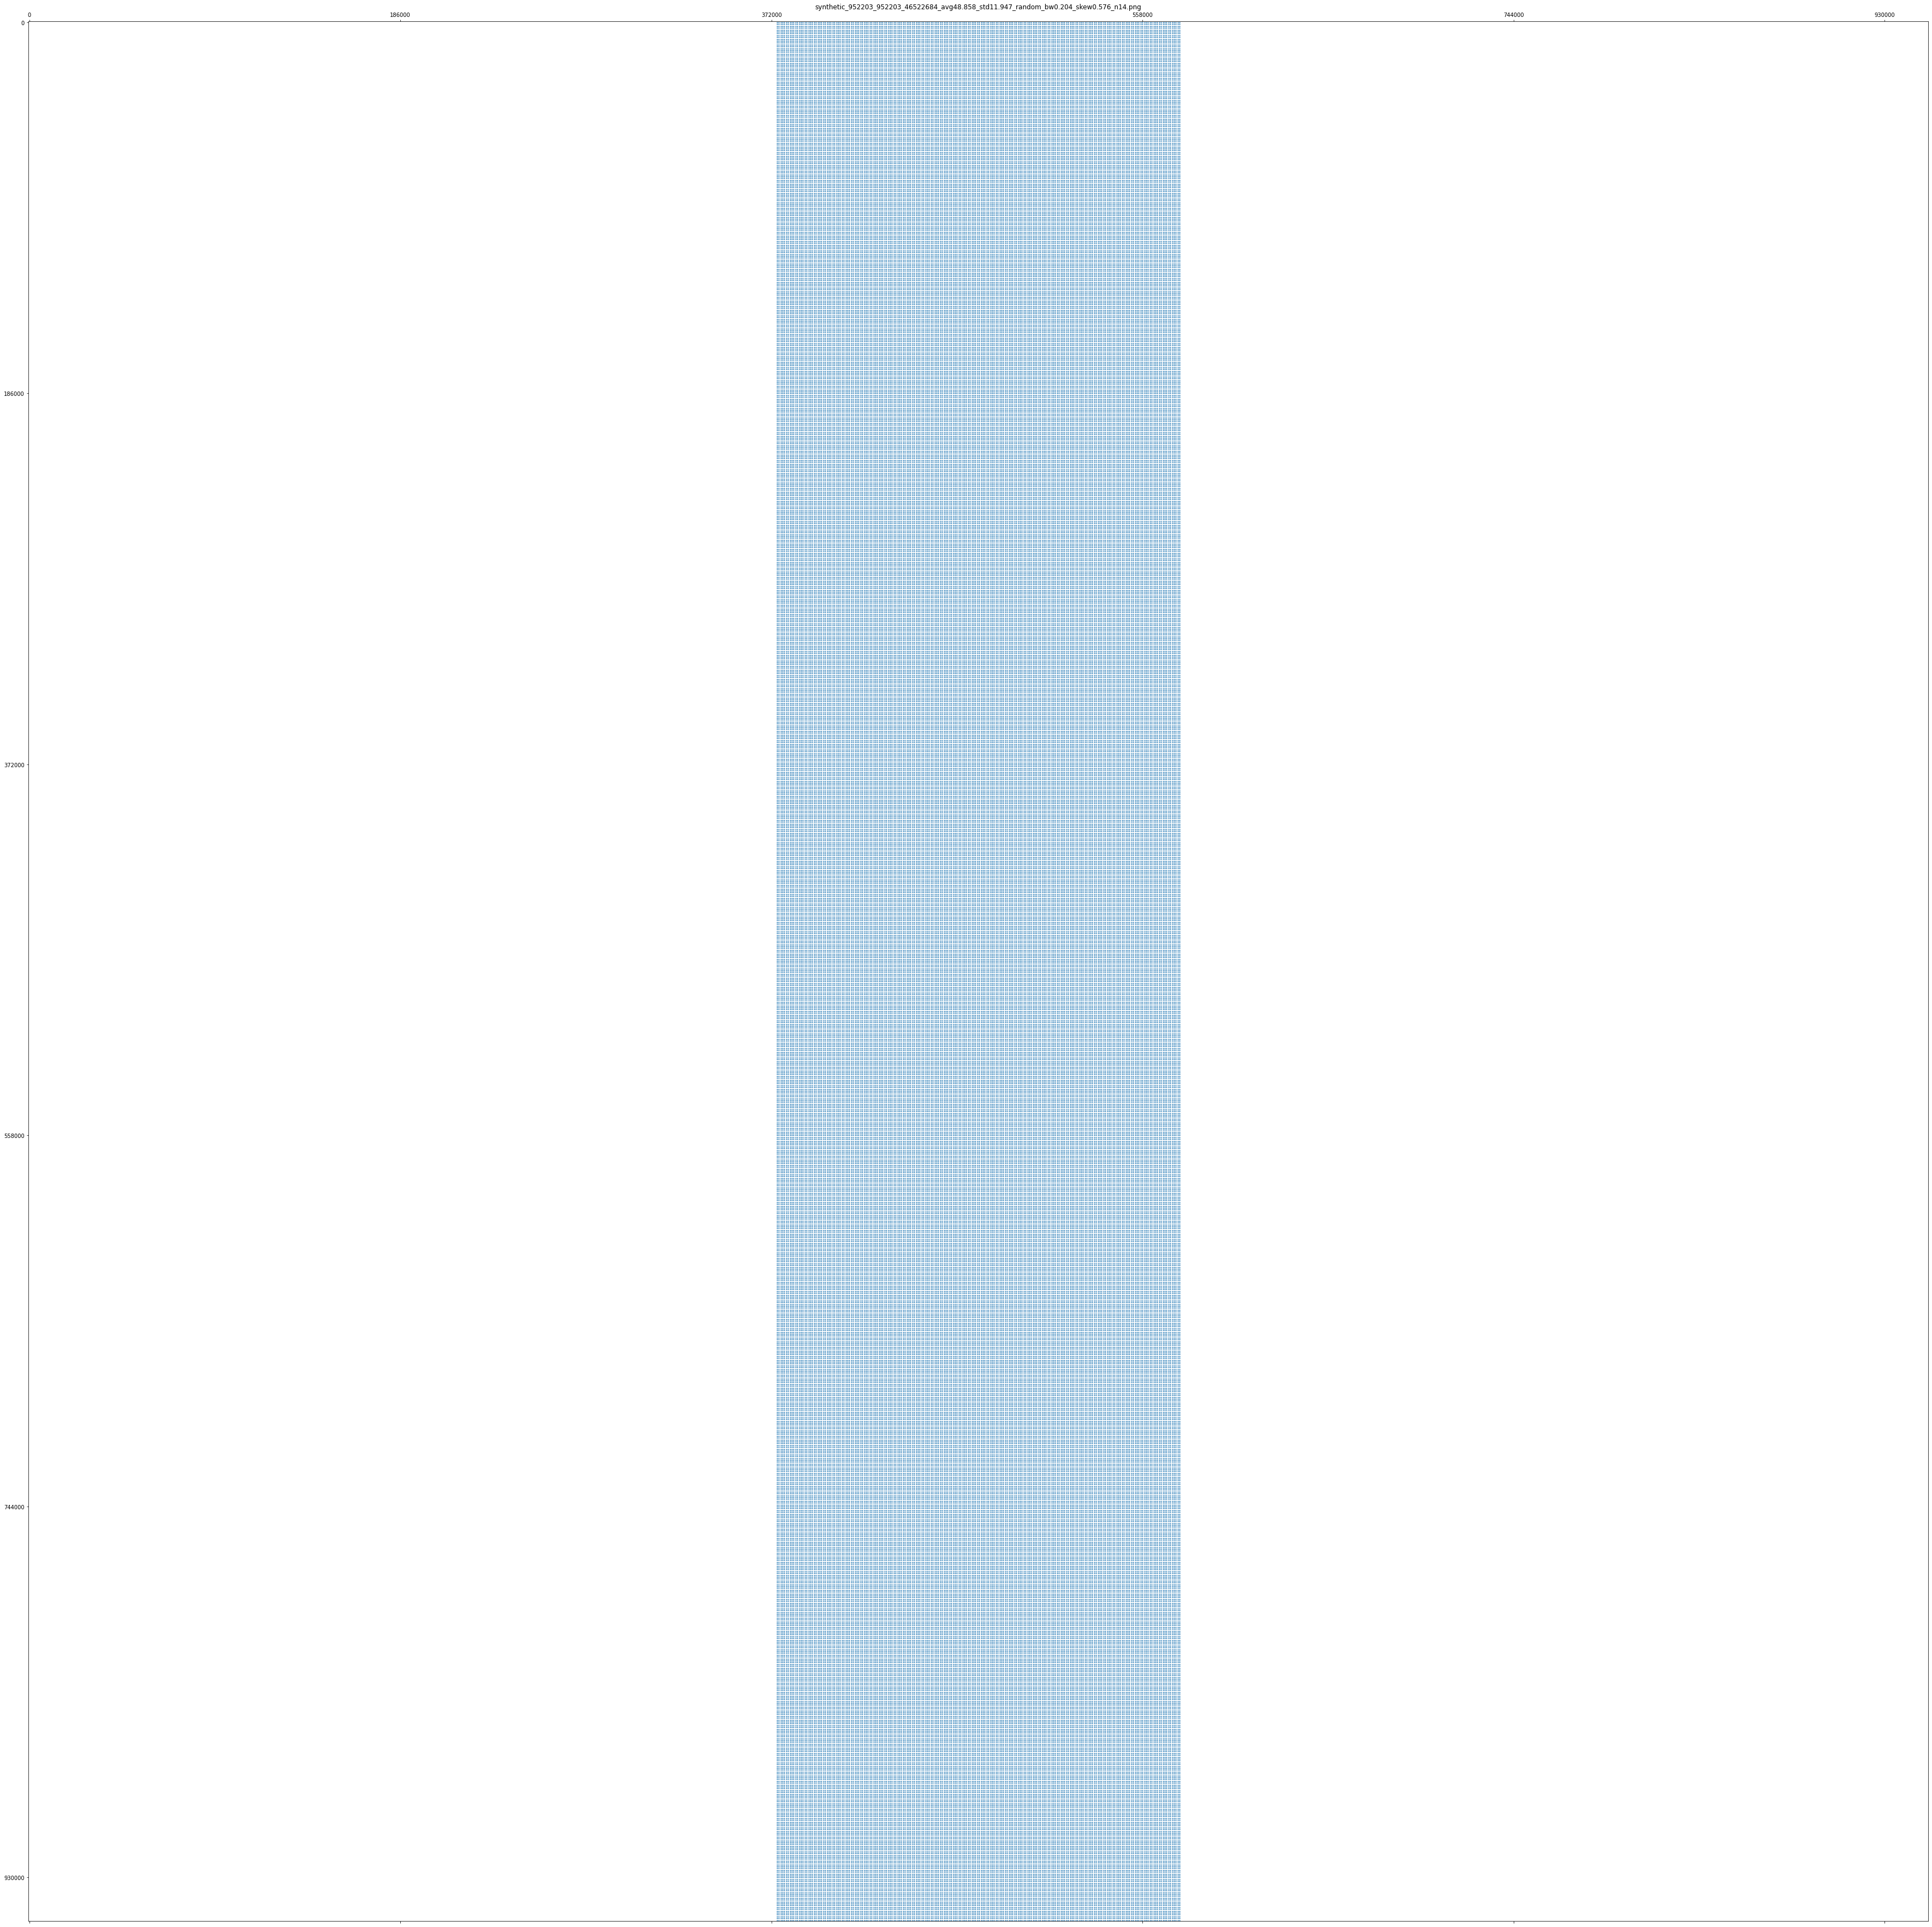

>>> Took me 2.586 seconds to plot and save image of matrix


synthetic_986703_986703_71659094_avg72.625_std15.808_random_bw0.018_skew0.115_n14.mtx :	dimensions (986703, 986703) / nnz 71659094 / mem footprint 823.837 MB (CSR)
>>> Took me 138.532 seconds to read matrix
>>> Took me 442.046 seconds to create image of matrix


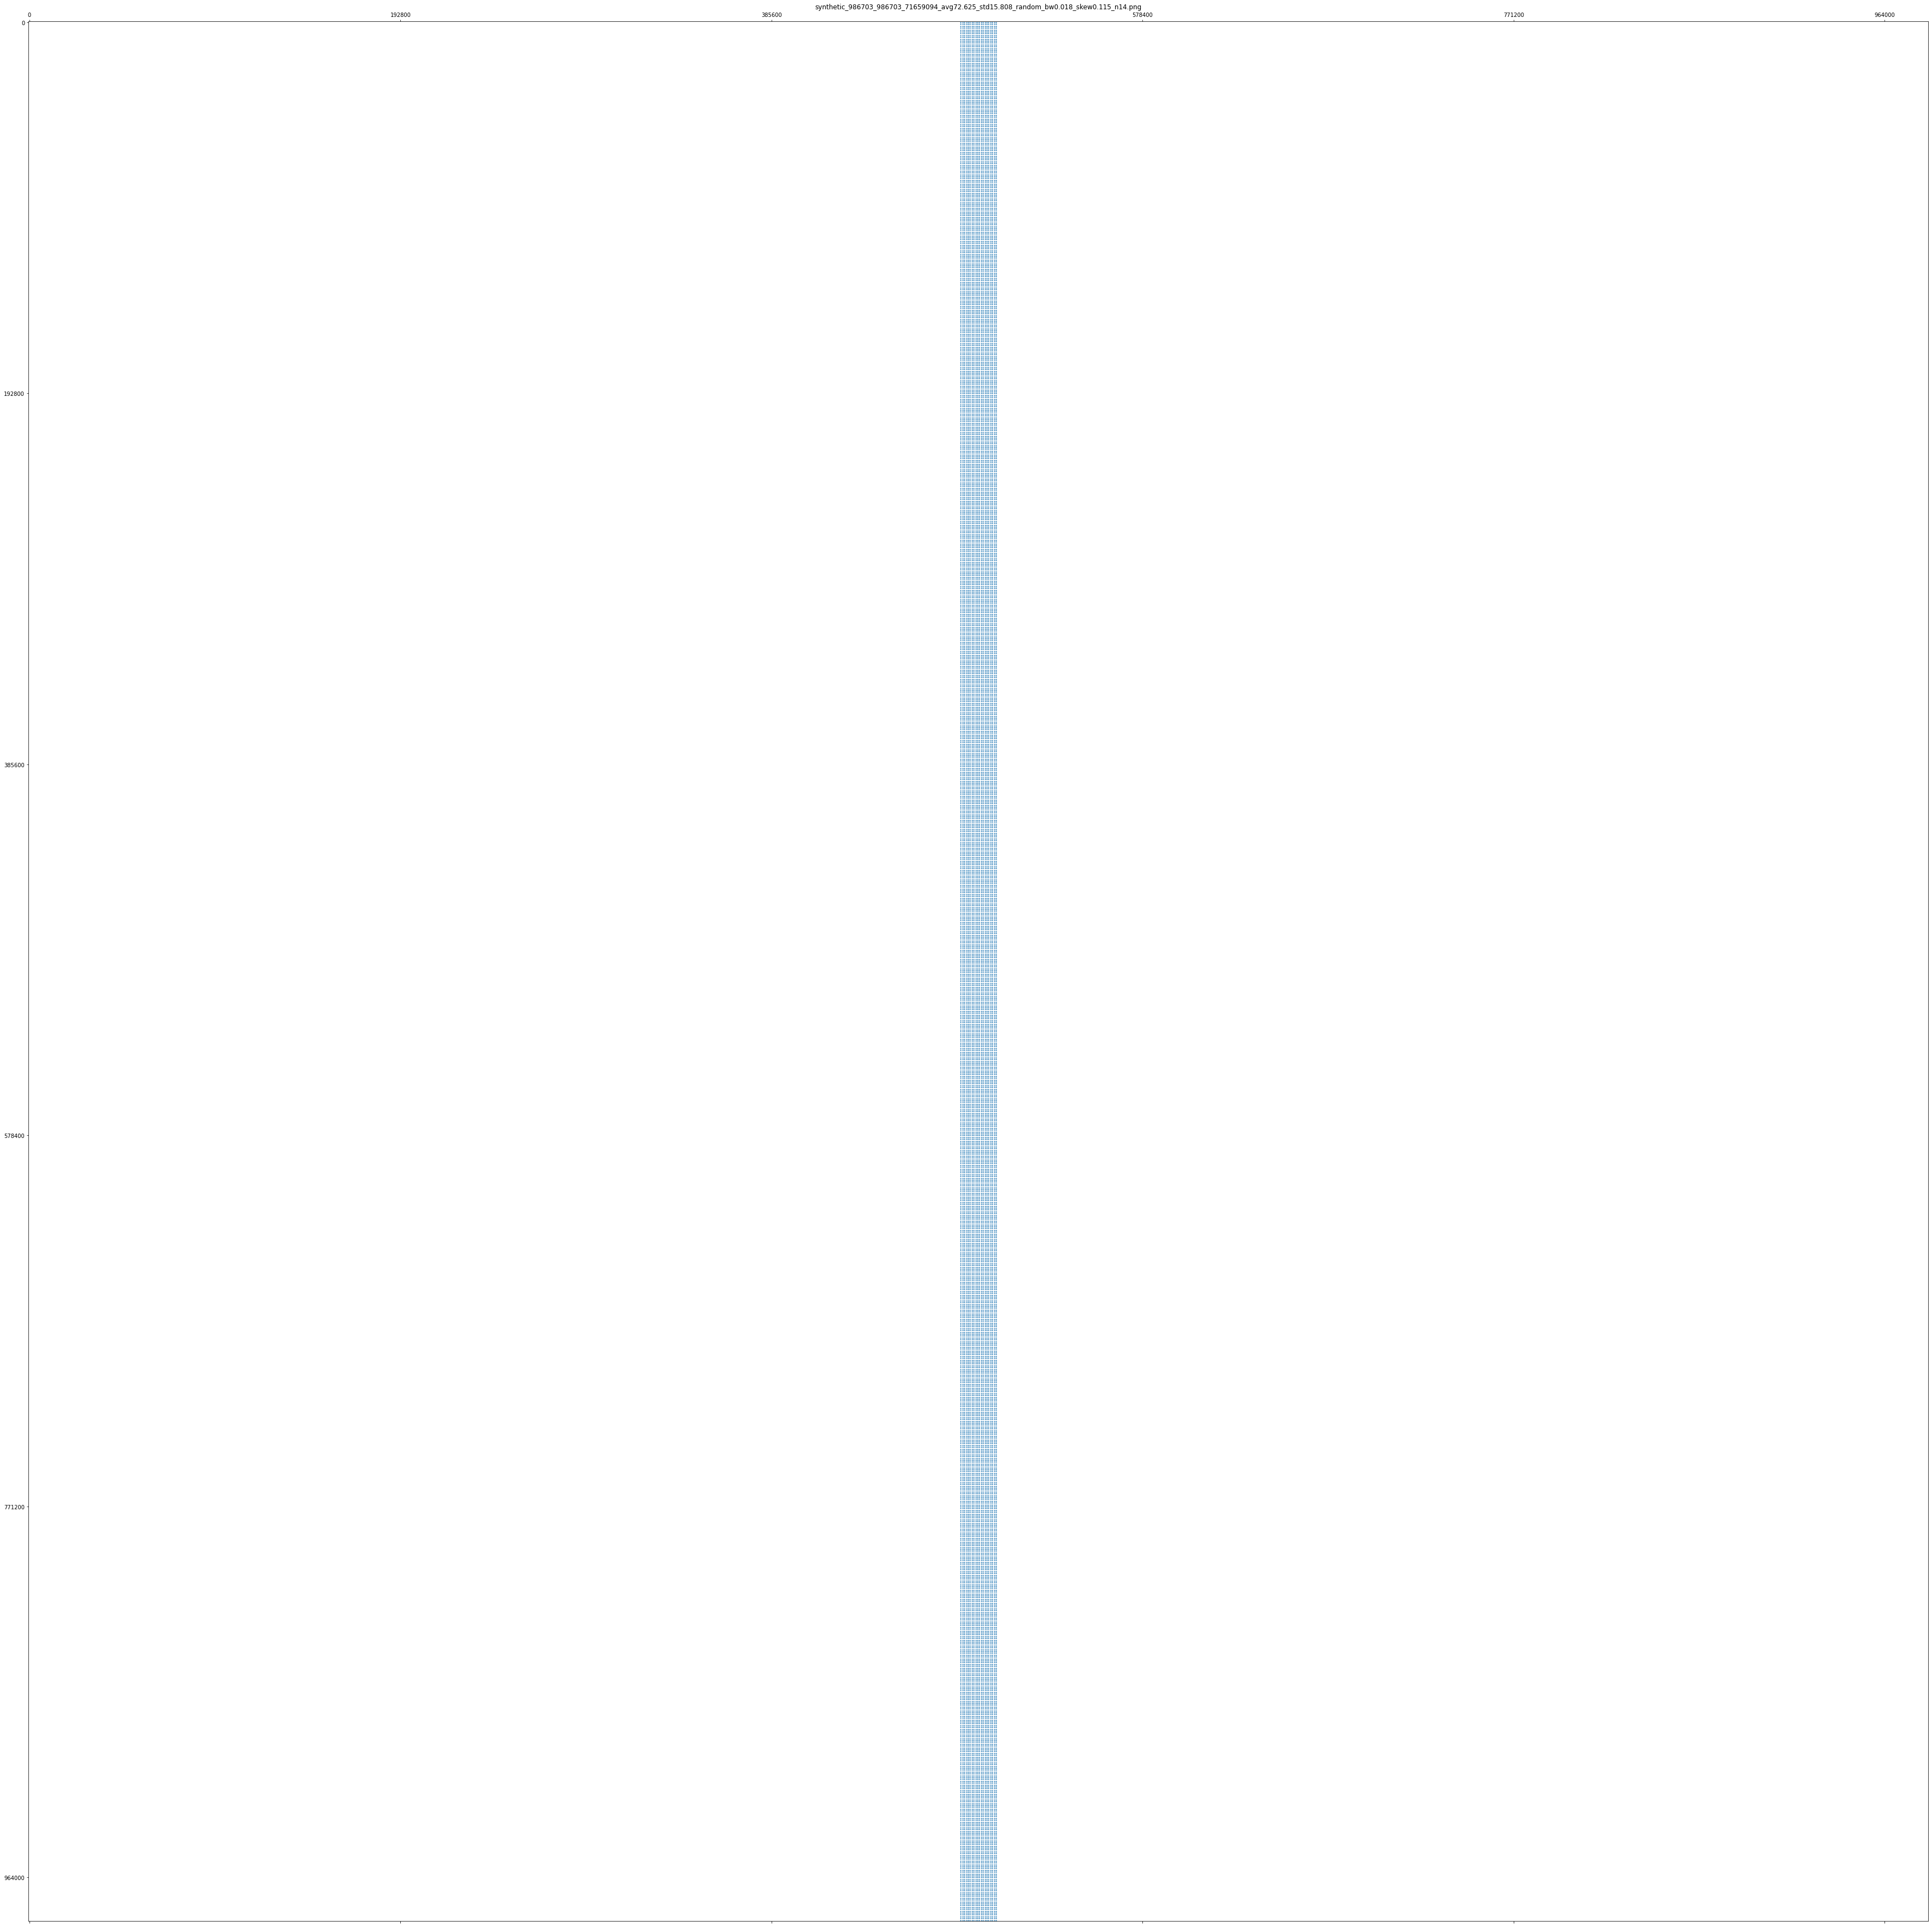

>>> Took me 2.549 seconds to plot and save image of matrix


synthetic_1000005_1000005_3170796_avg3.171_std25.563_random_bw0.147_skew1512.434_n14.mtx :	dimensions (1000005, 1000005) / nnz 3170796 / mem footprint 40.102 MB (CSR)
>>> Took me 6.475 seconds to read matrix
>>> Took me 19.272 seconds to create image of matrix


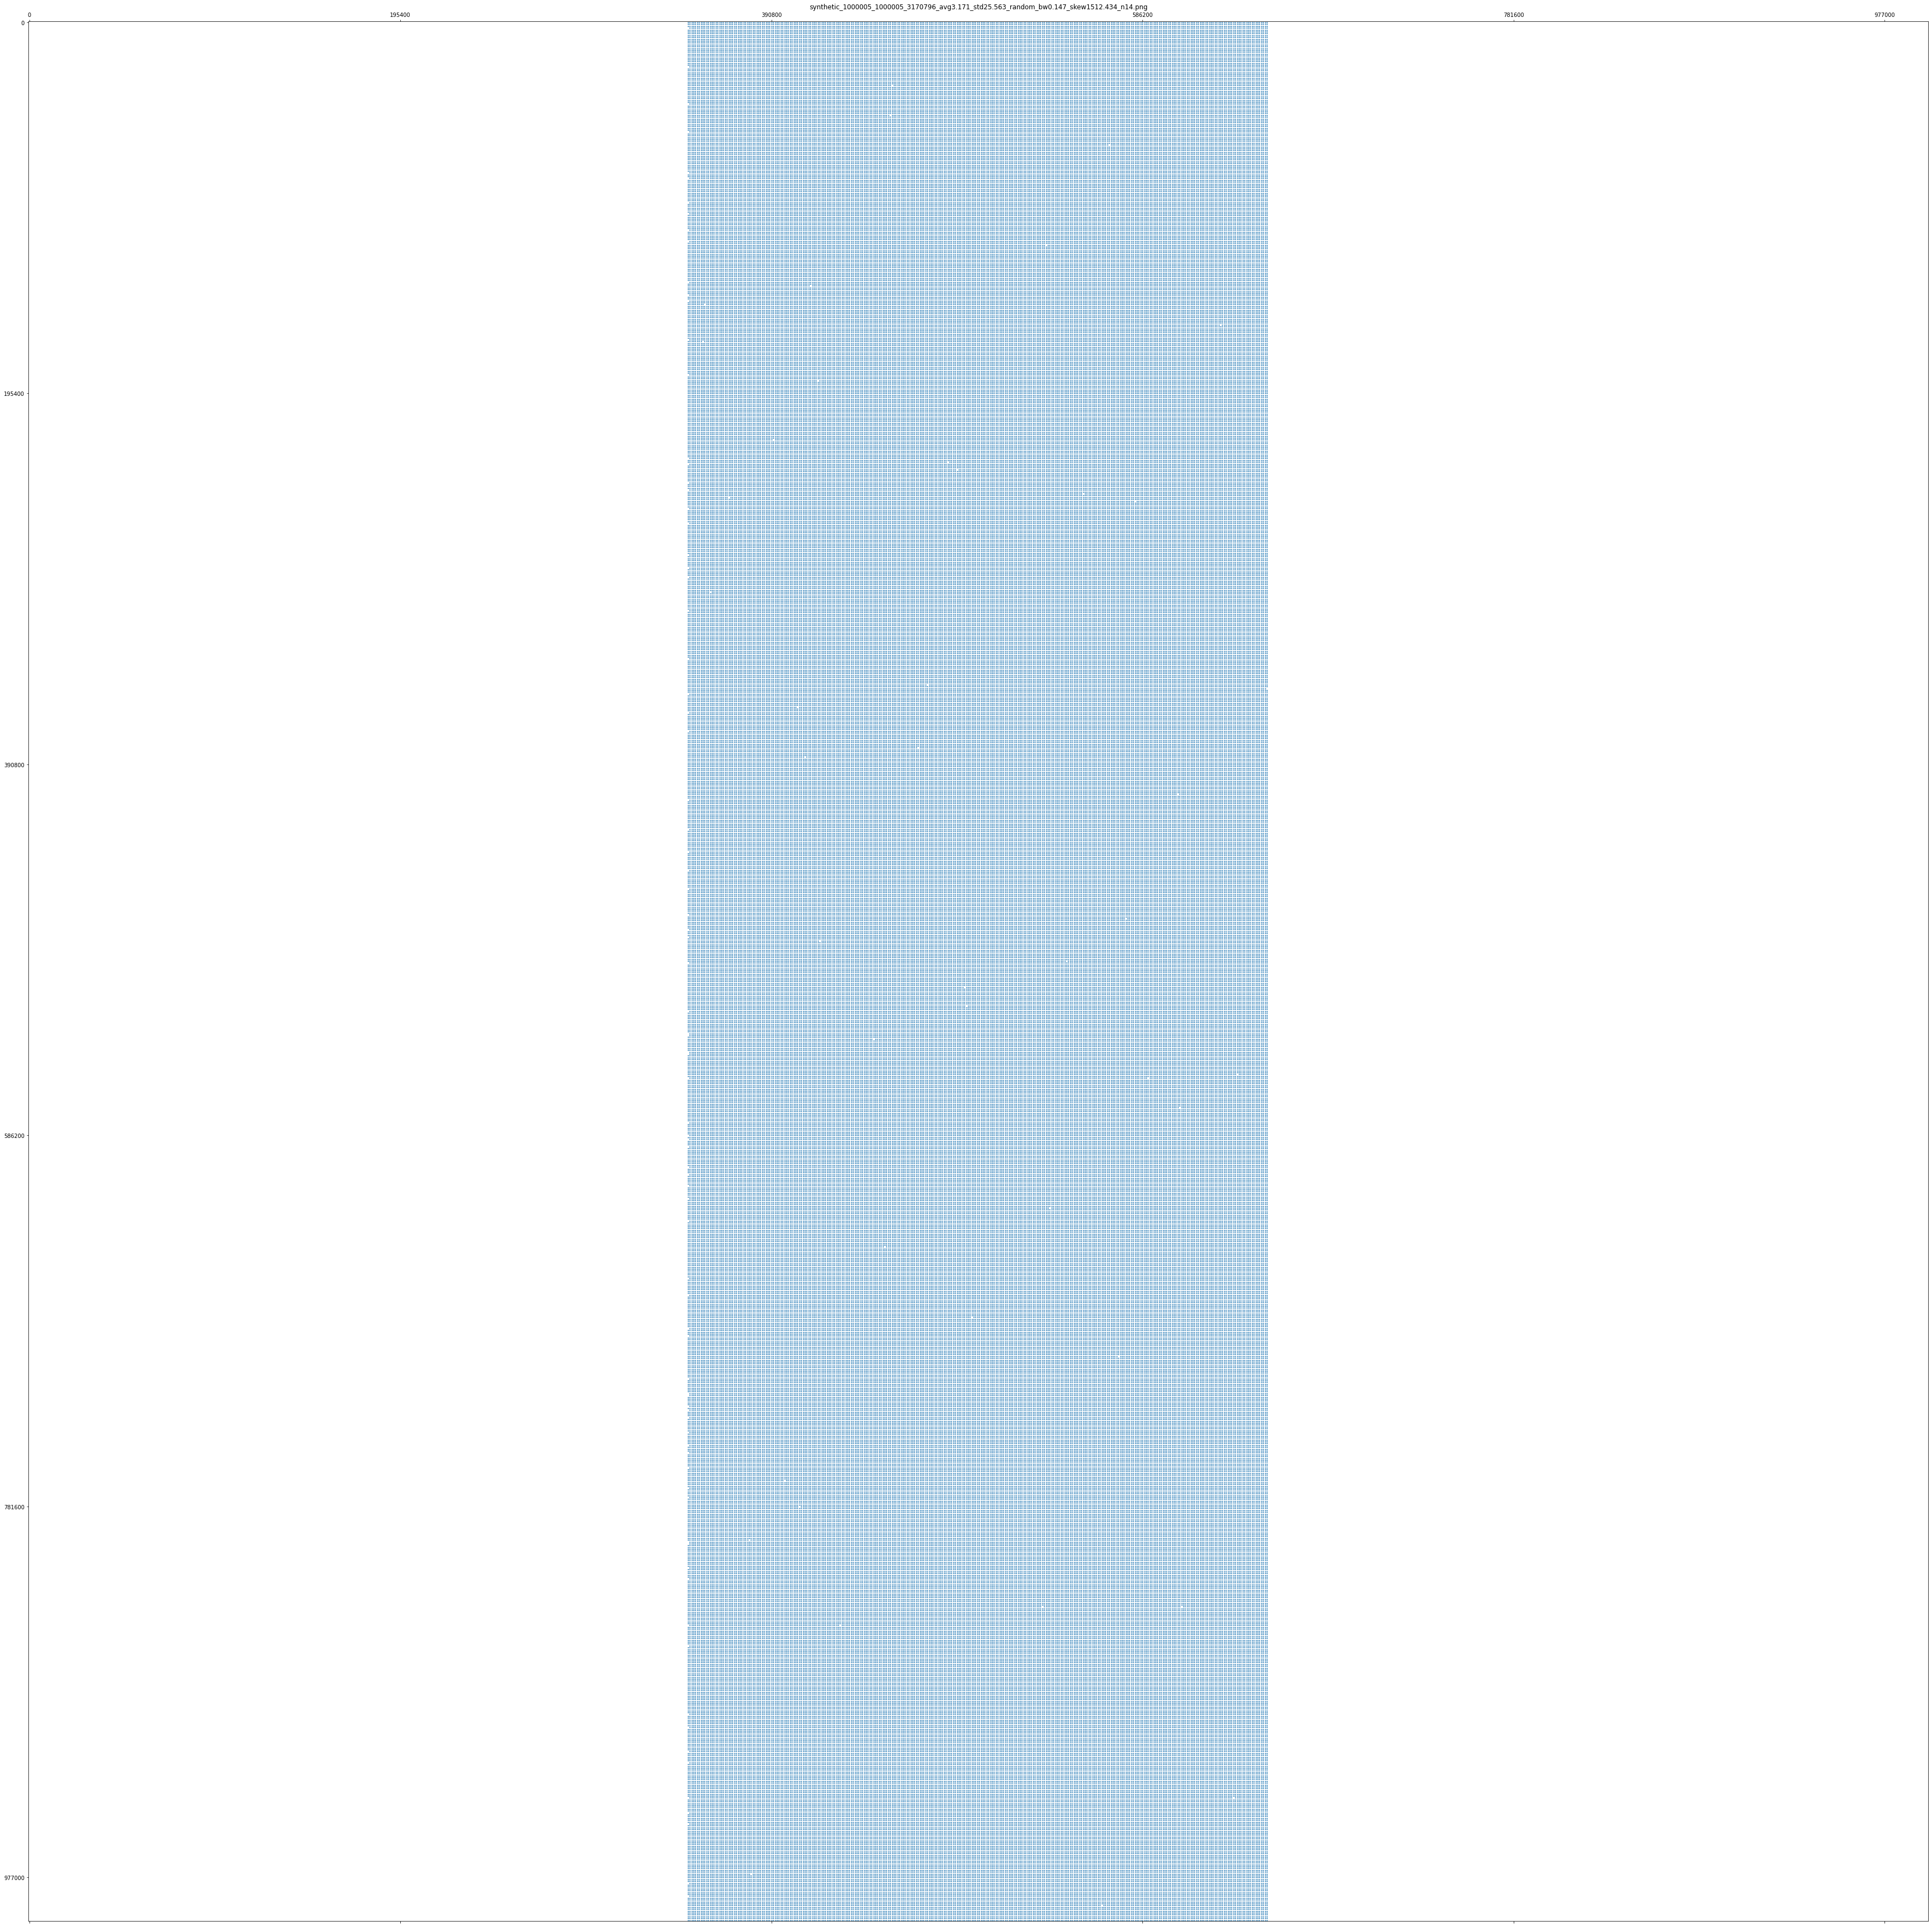

>>> Took me 2.909 seconds to plot and save image of matrix


synthetic_1382908_1382908_16945359_avg12.253_std37.522_random_bw0.021_skew632.78_n14.mtx :	dimensions (1382908, 1382908) / nnz 16945359 / mem footprint 199.2 MB (CSR)
>>> Took me 32.697 seconds to read matrix
>>> Took me 100.406 seconds to create image of matrix


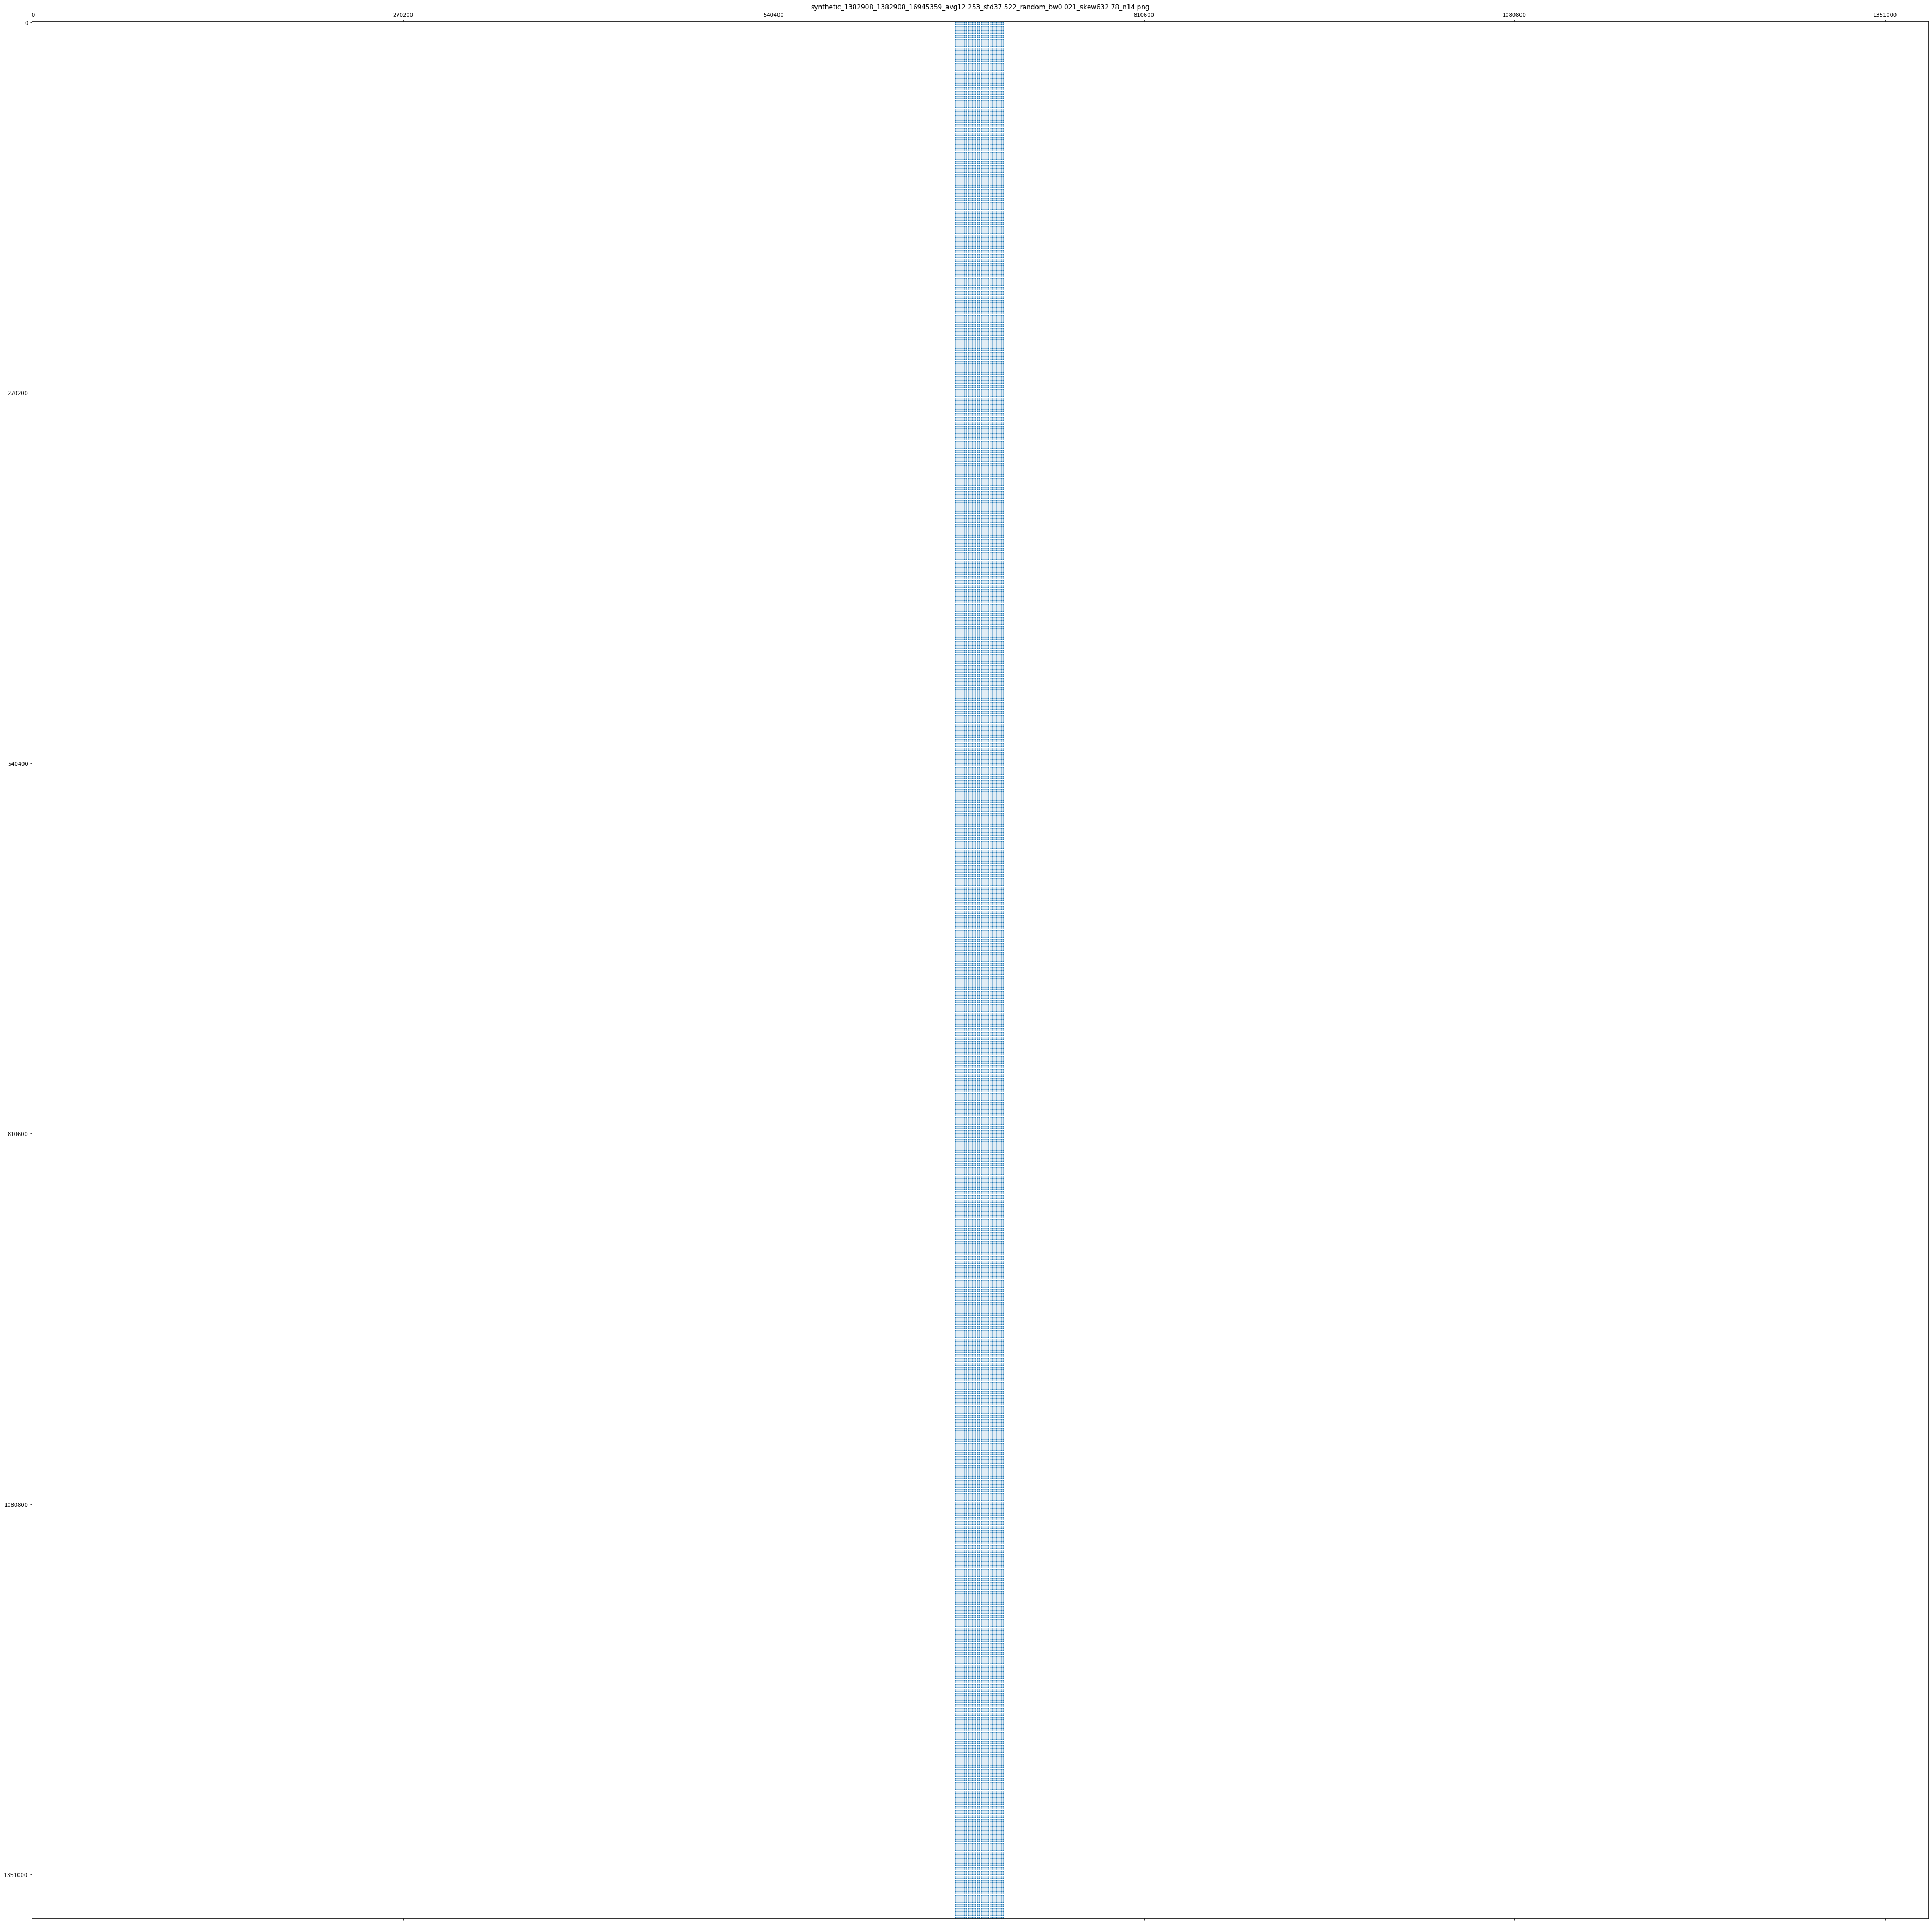

>>> Took me 2.2 seconds to plot and save image of matrix


synthetic_1634989_1634989_19780430_avg12.098_std31.198_random_bw0.339_skew410.374_n14.mtx :	dimensions (1634989, 1634989) / nnz 19780430 / mem footprint 232.606 MB (CSR)
>>> Took me 40.887 seconds to read matrix
>>> Took me 112.933 seconds to create image of matrix


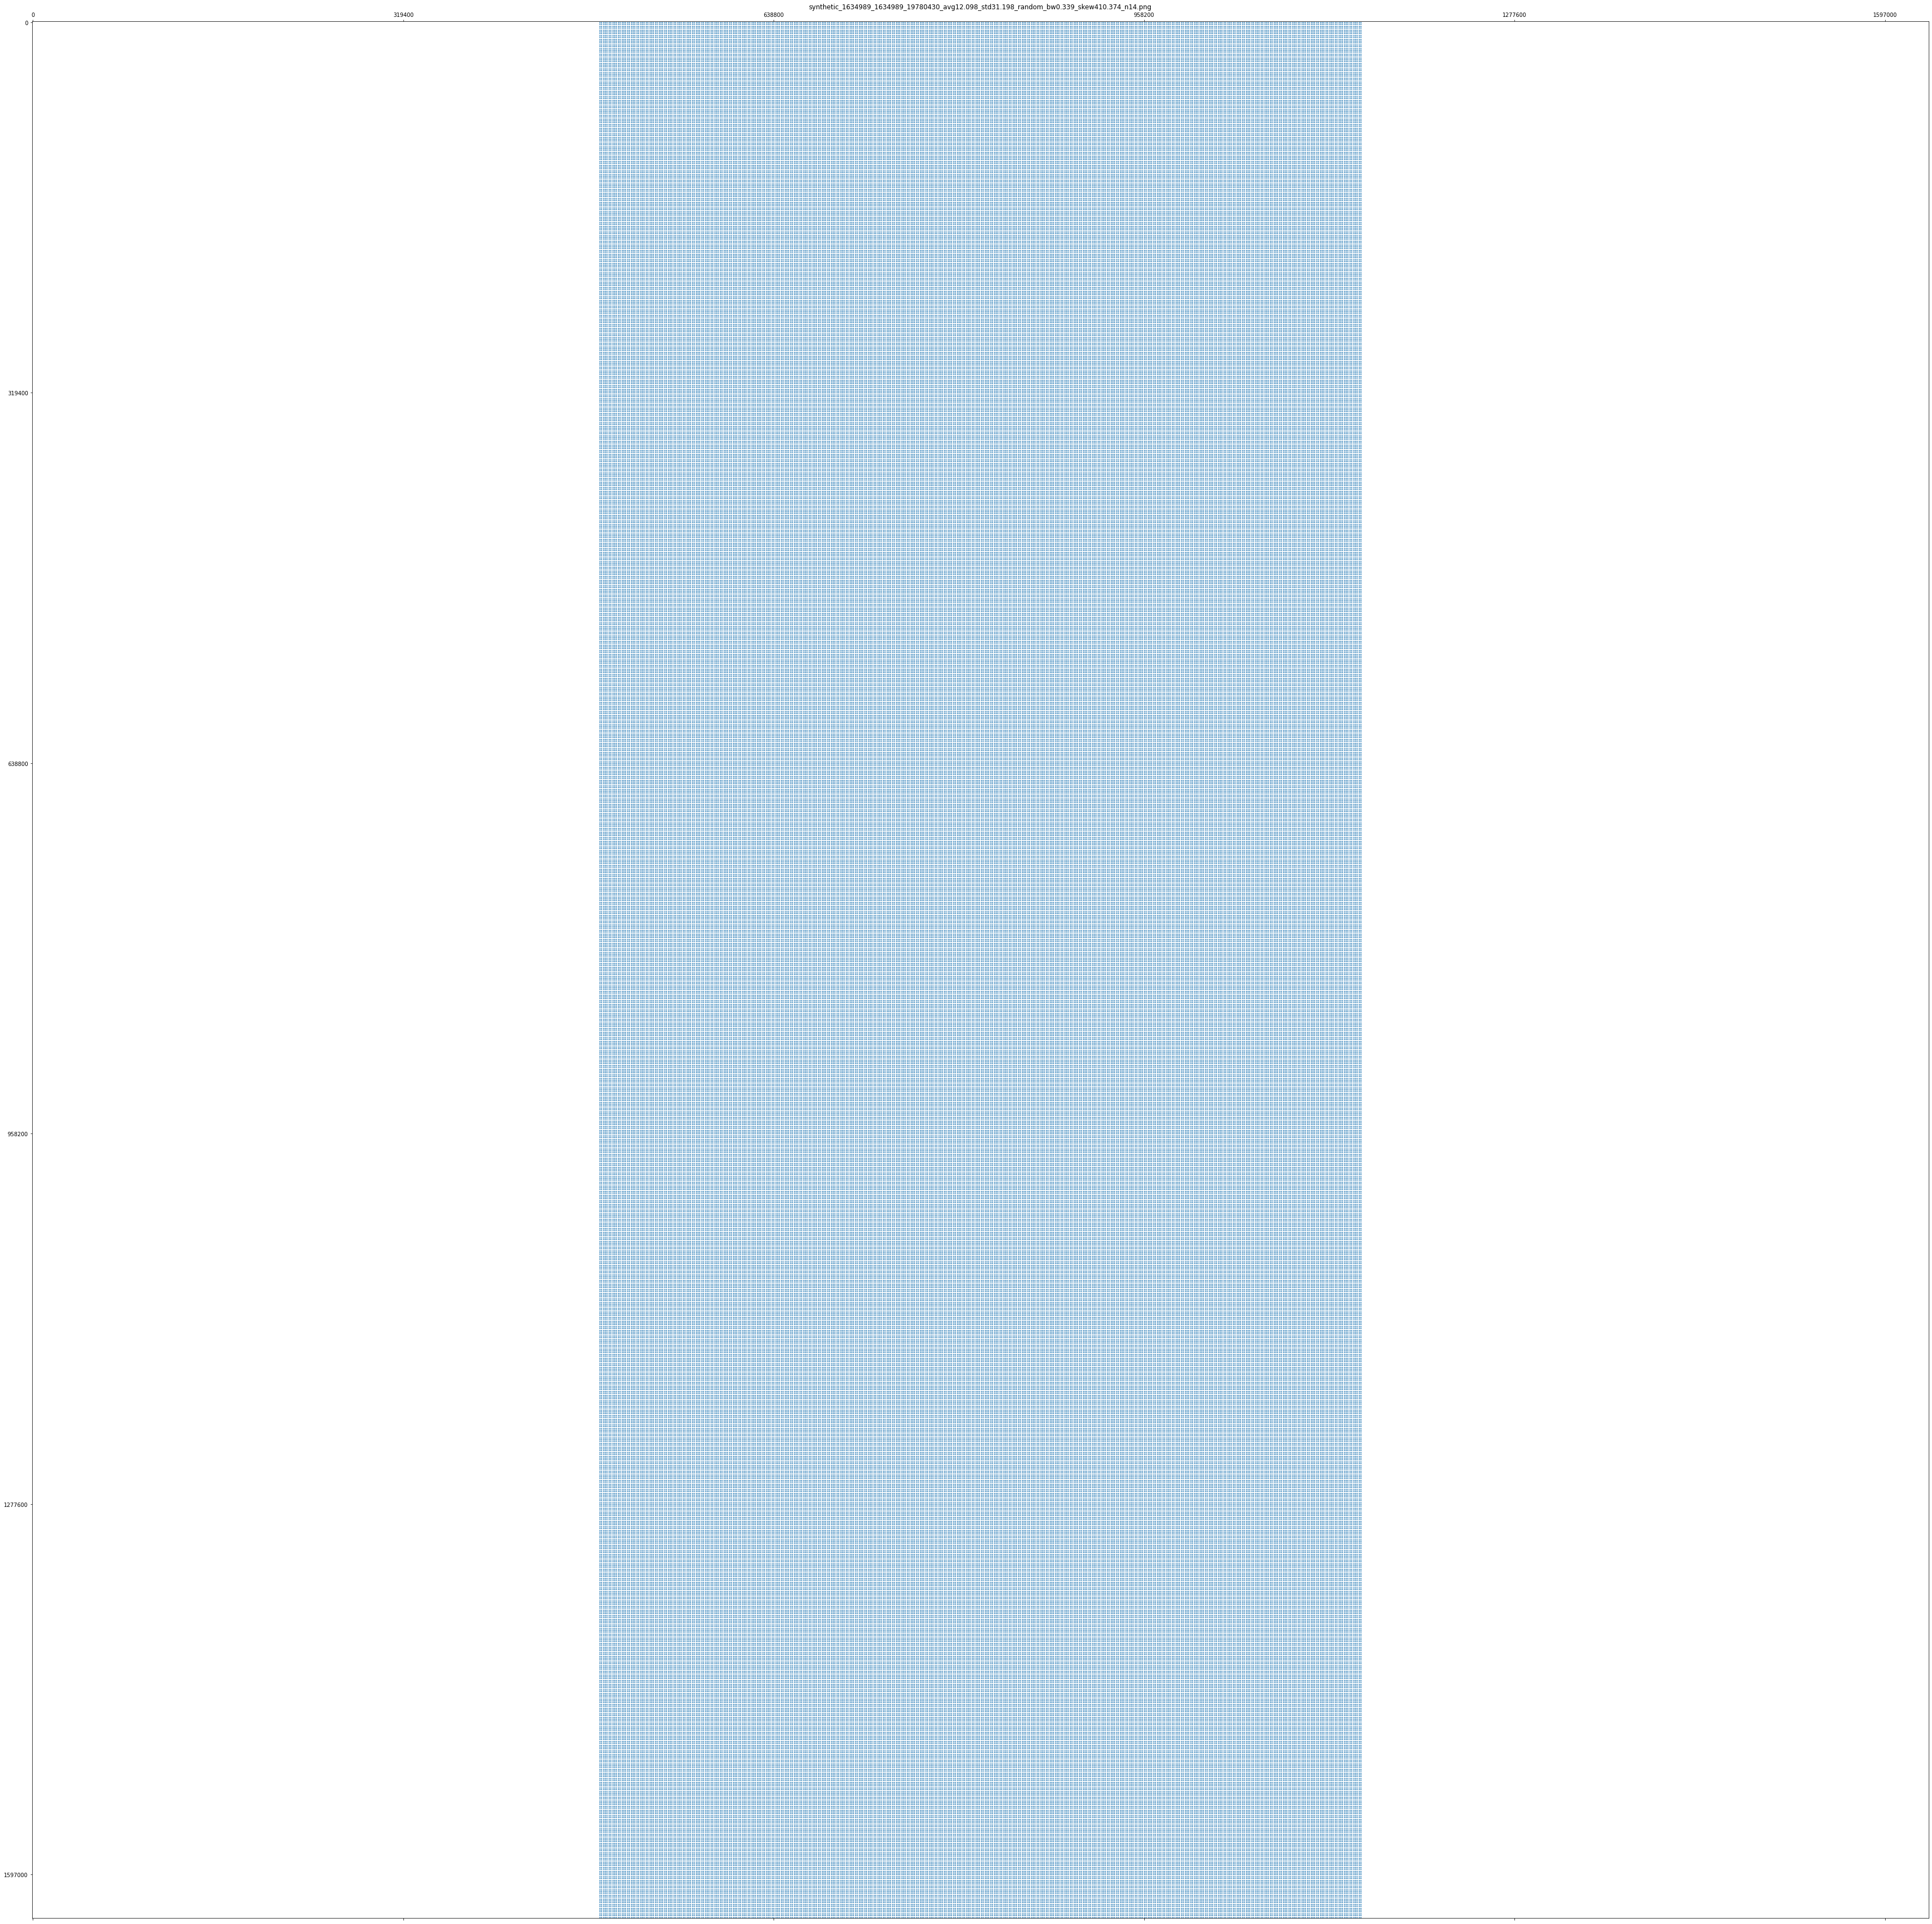

>>> Took me 2.681 seconds to plot and save image of matrix


synthetic_4690002_4690002_18769835_avg4.002_std1.183_random_bw0.001_skew288.024_n14.mtx :	dimensions (4690002, 4690002) / nnz 18769835 / mem footprint 232.695 MB (CSR)
>>> Took me 42.467 seconds to read matrix
>>> Took me 106.495 seconds to create image of matrix


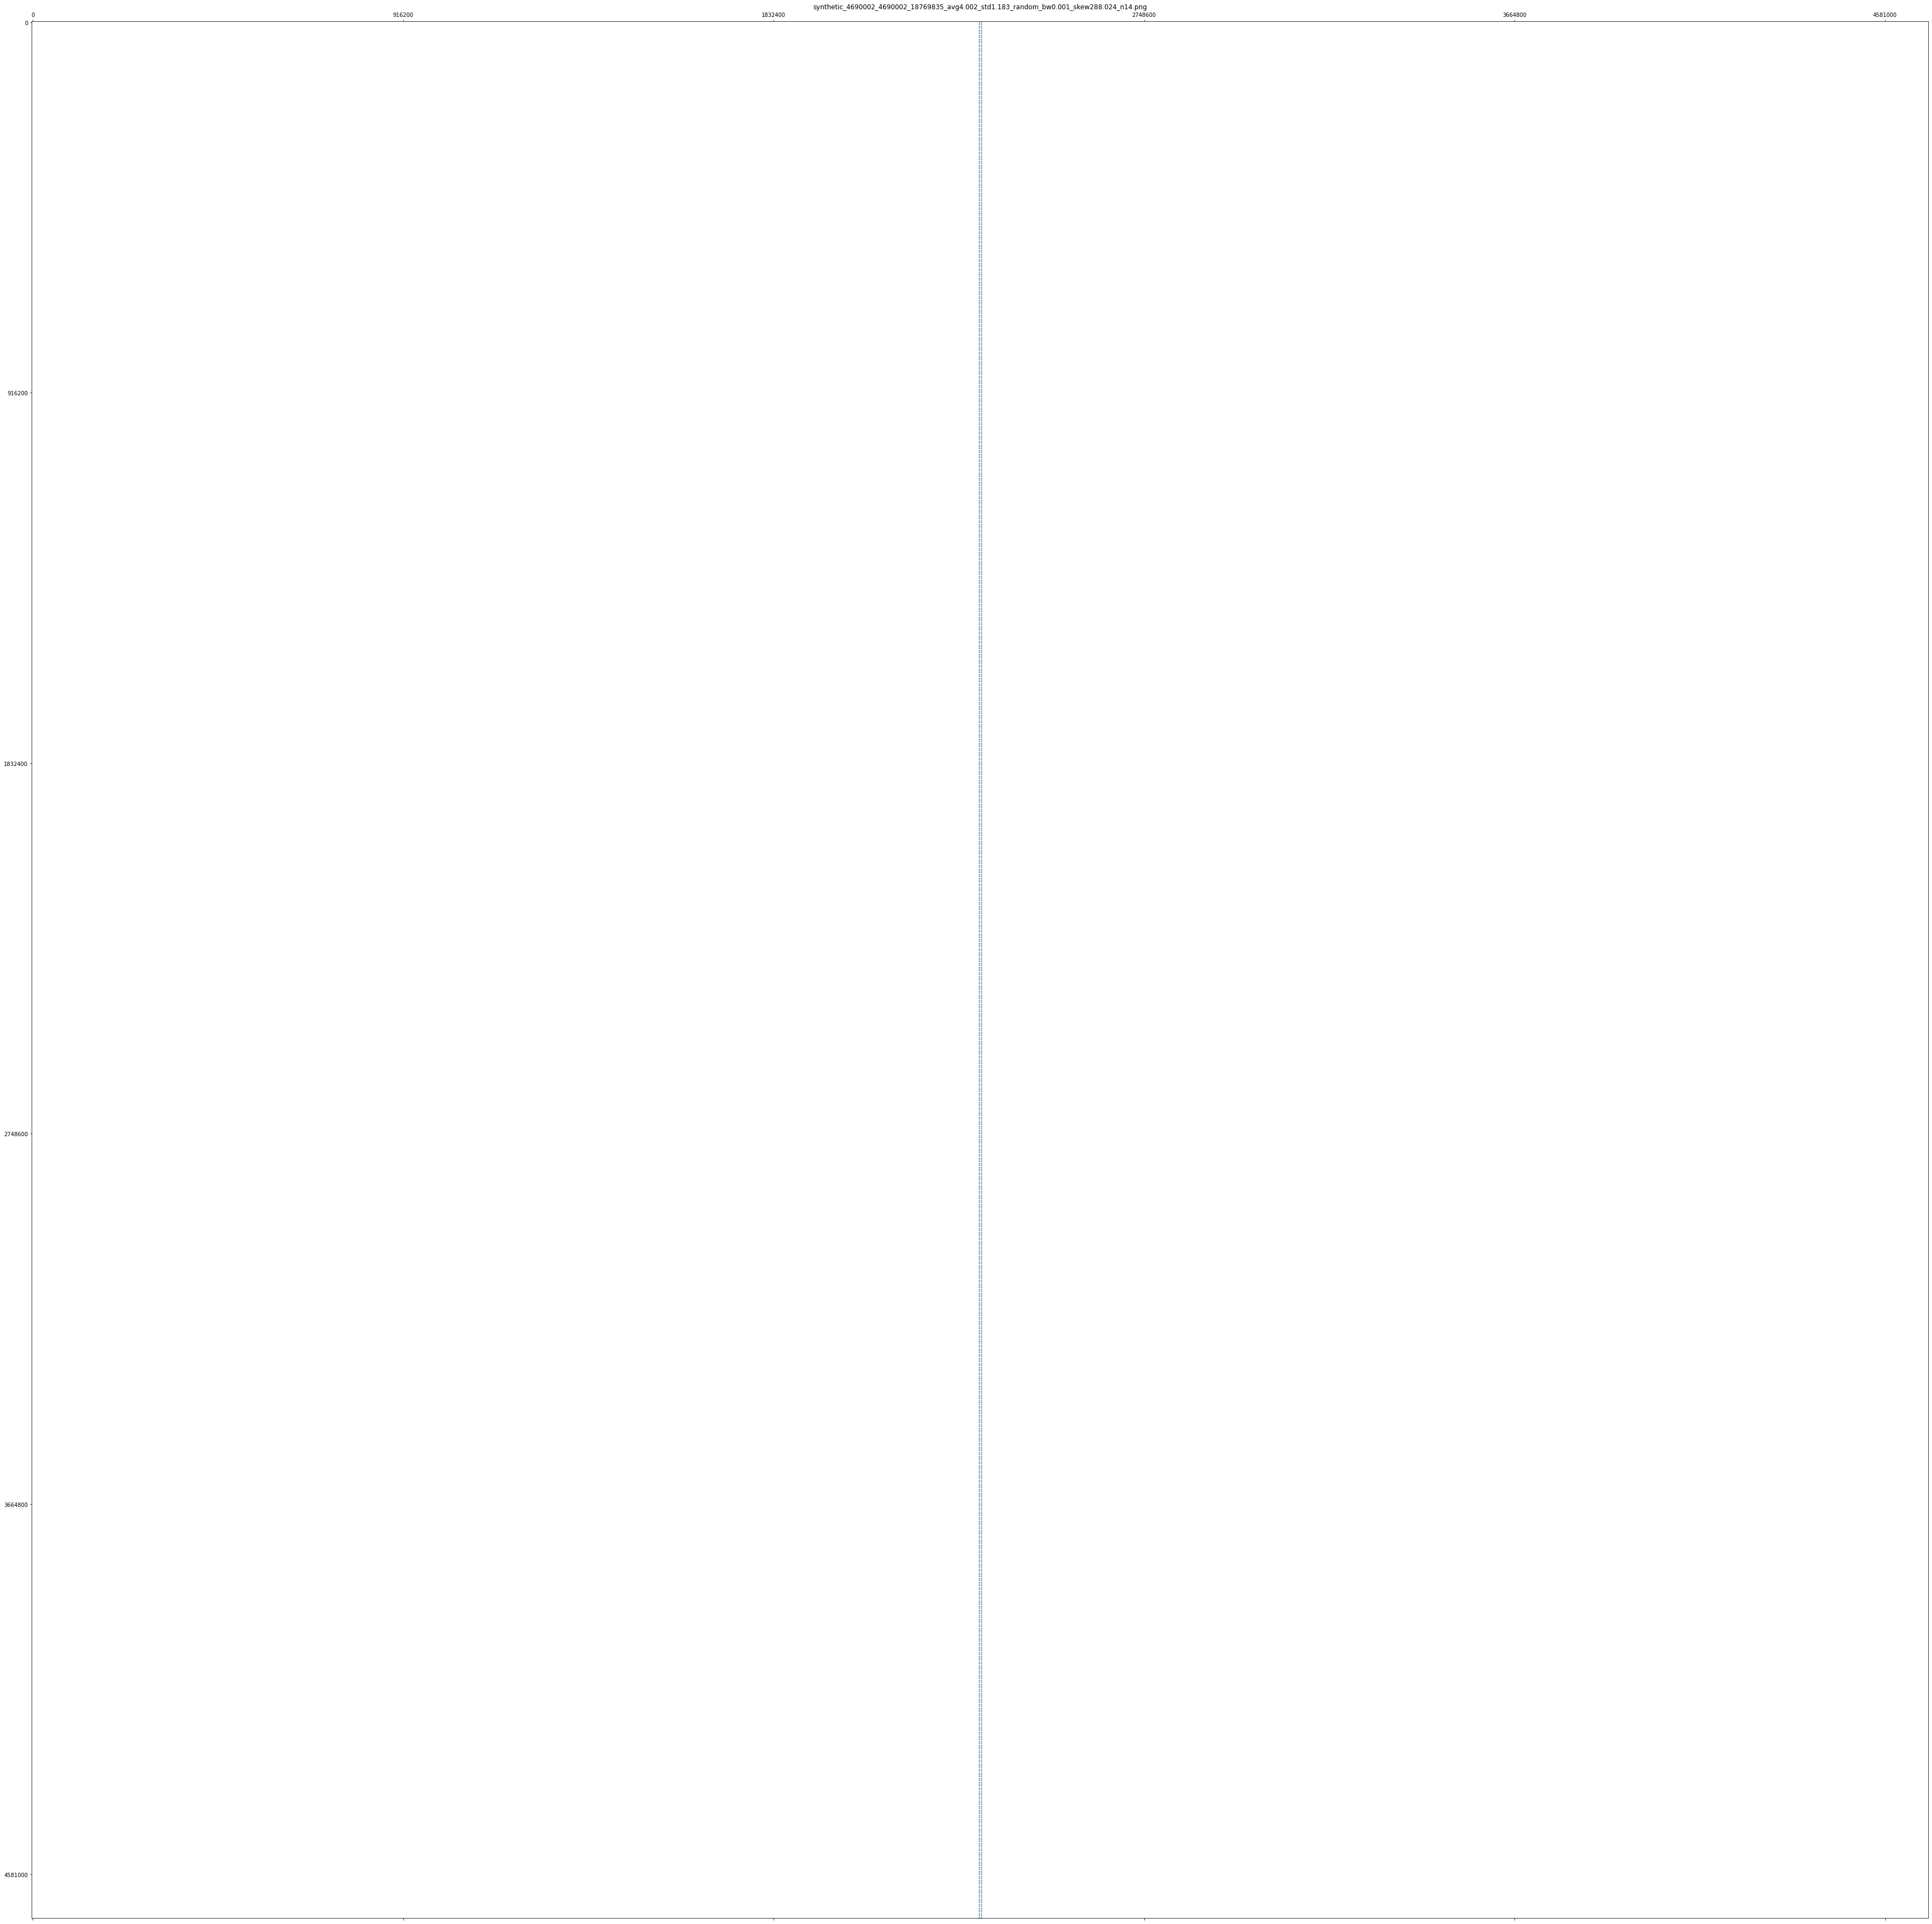

>>> Took me 2.345 seconds to plot and save image of matrix


synthetic_5154859_5154859_99196687_avg19.243_std5.743_random_bw0.211_skew1.442_n14.mtx :	dimensions (5154859, 5154859) / nnz 99196687 / mem footprint 1154.88 MB (CSR)
>>> Took me 155.964 seconds to read matrix
>>> Took me 537.578 seconds to create image of matrix


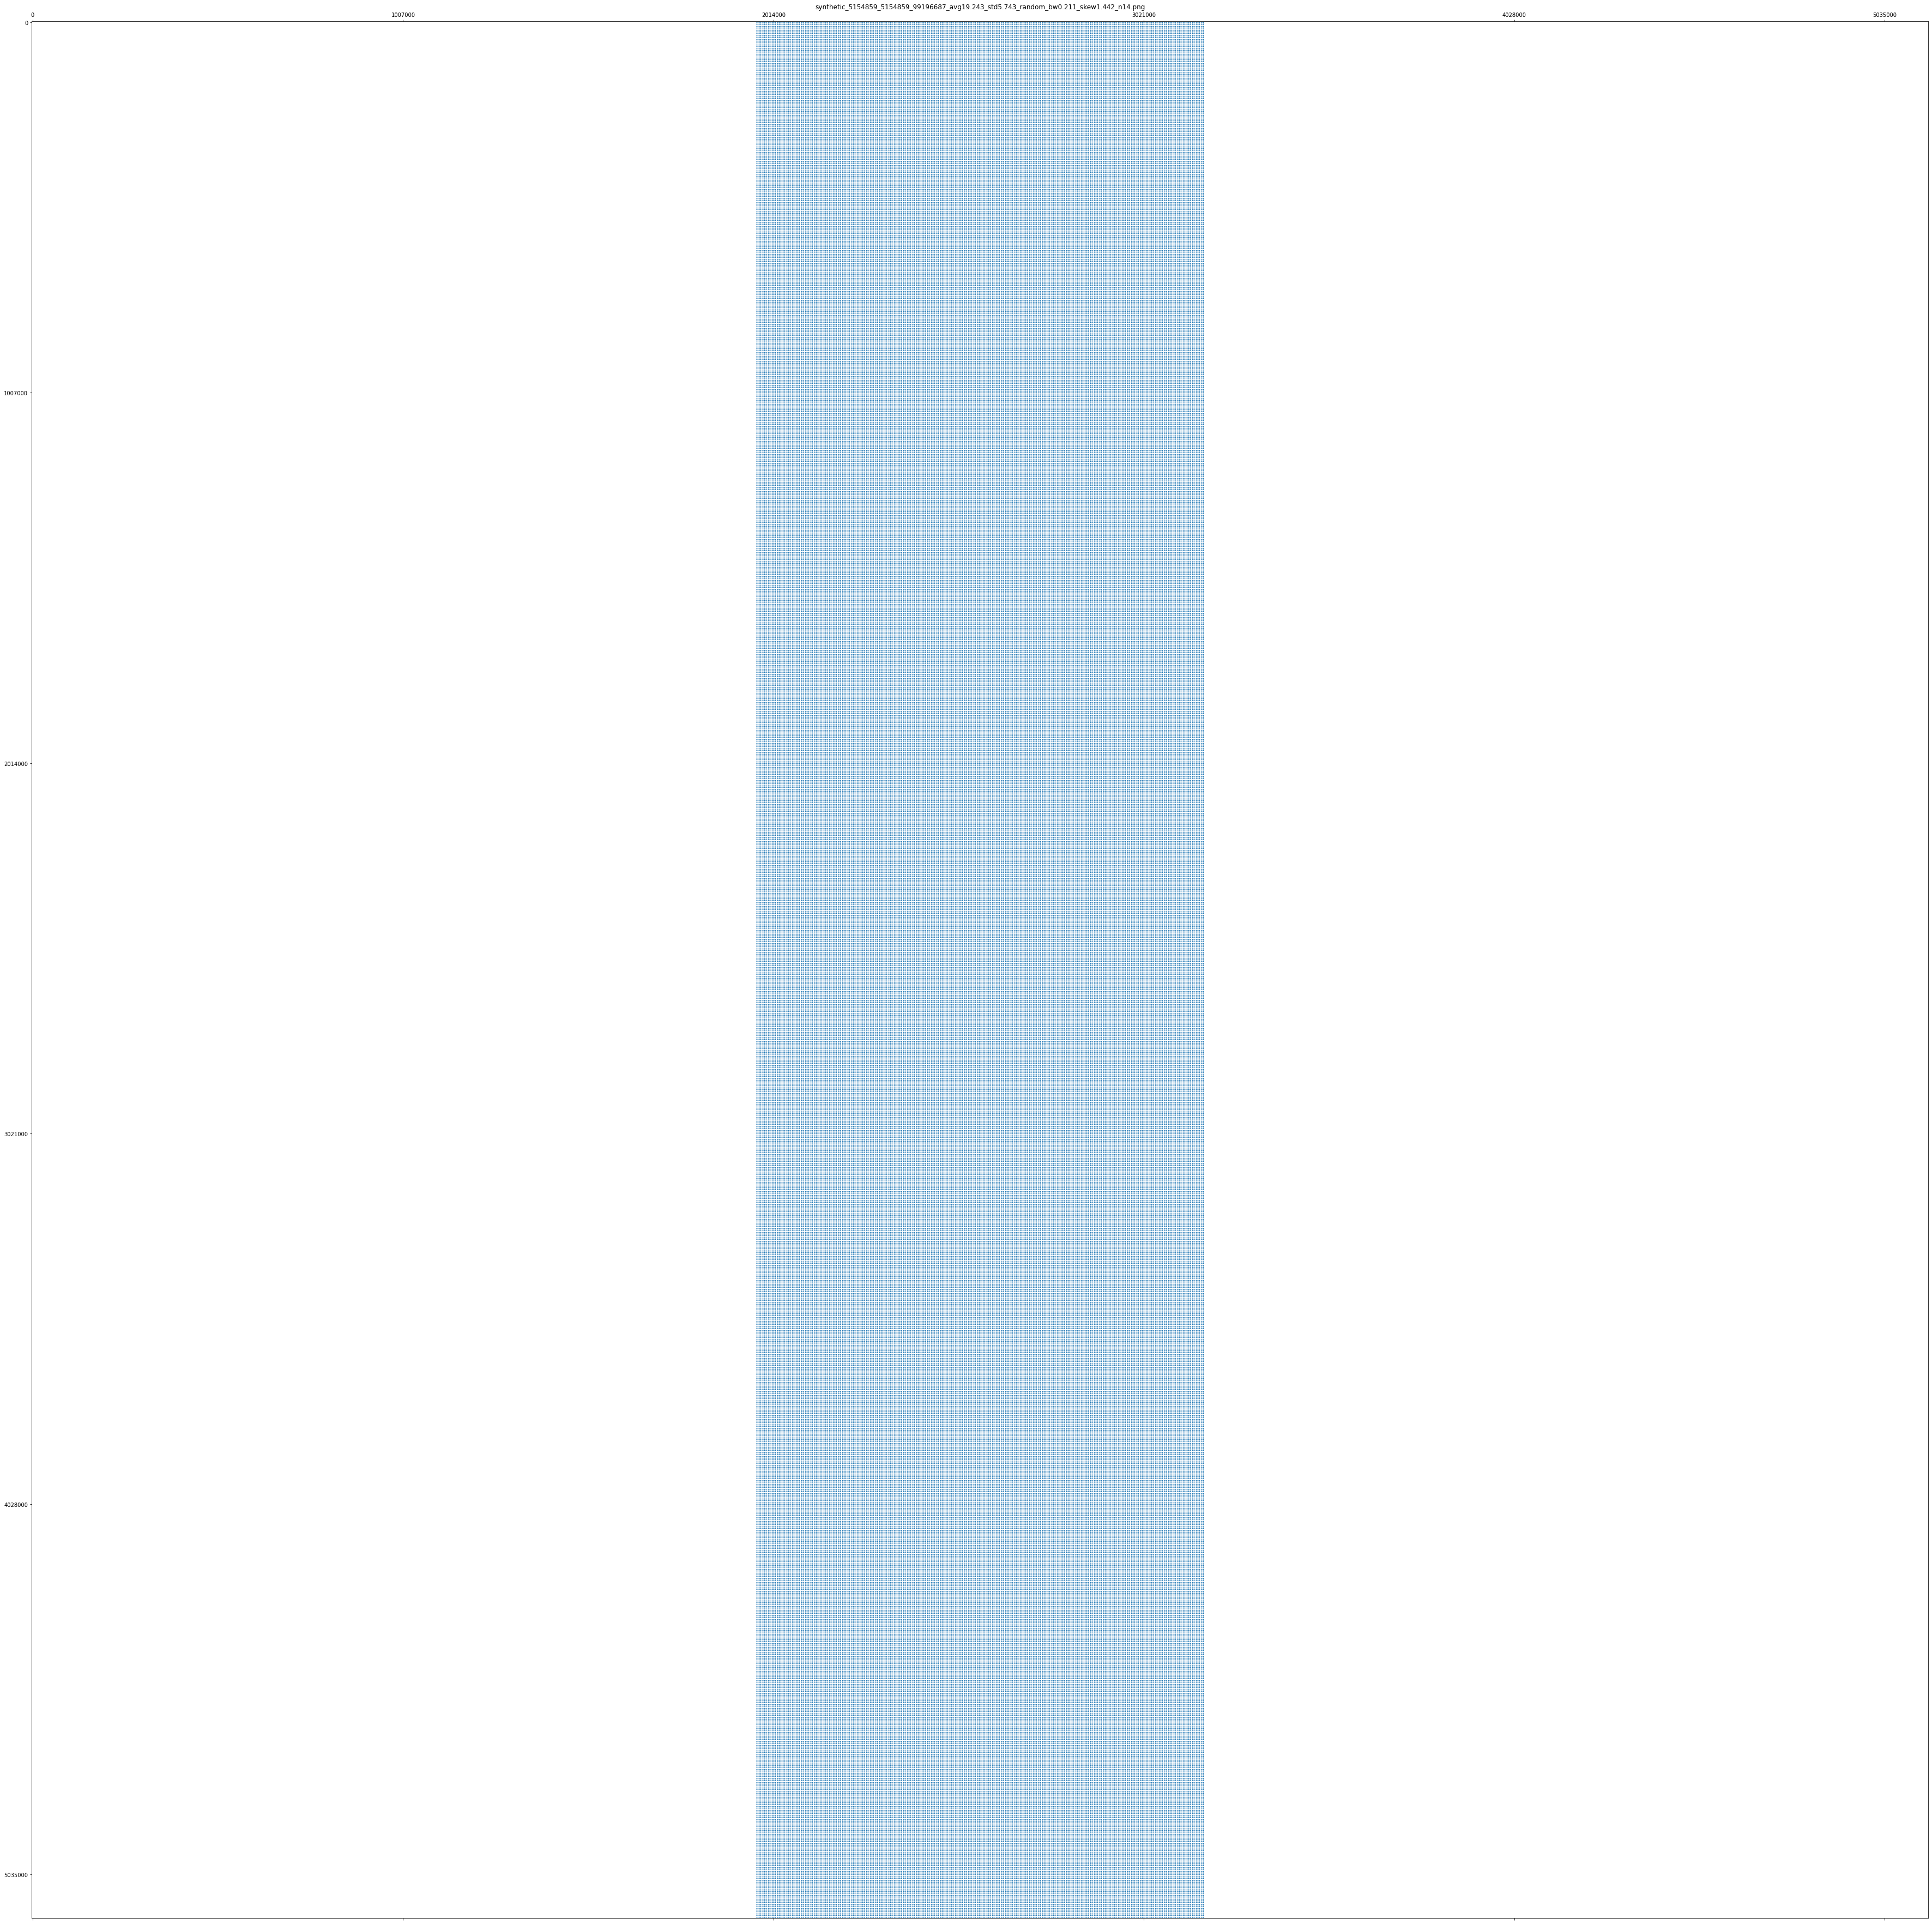

>>> Took me 2.56 seconds to plot and save image of matrix


synthetic_5558326_5558326_60190921_avg10.829_std1412.188_random_bw0.45_skew120504.85_n14.mtx :	dimensions (5558326, 5558326) / nnz 60190921 / mem footprint 710.034 MB (CSR)
>>> Took me 97.735 seconds to read matrix
>>> Took me 334.172 seconds to create image of matrix


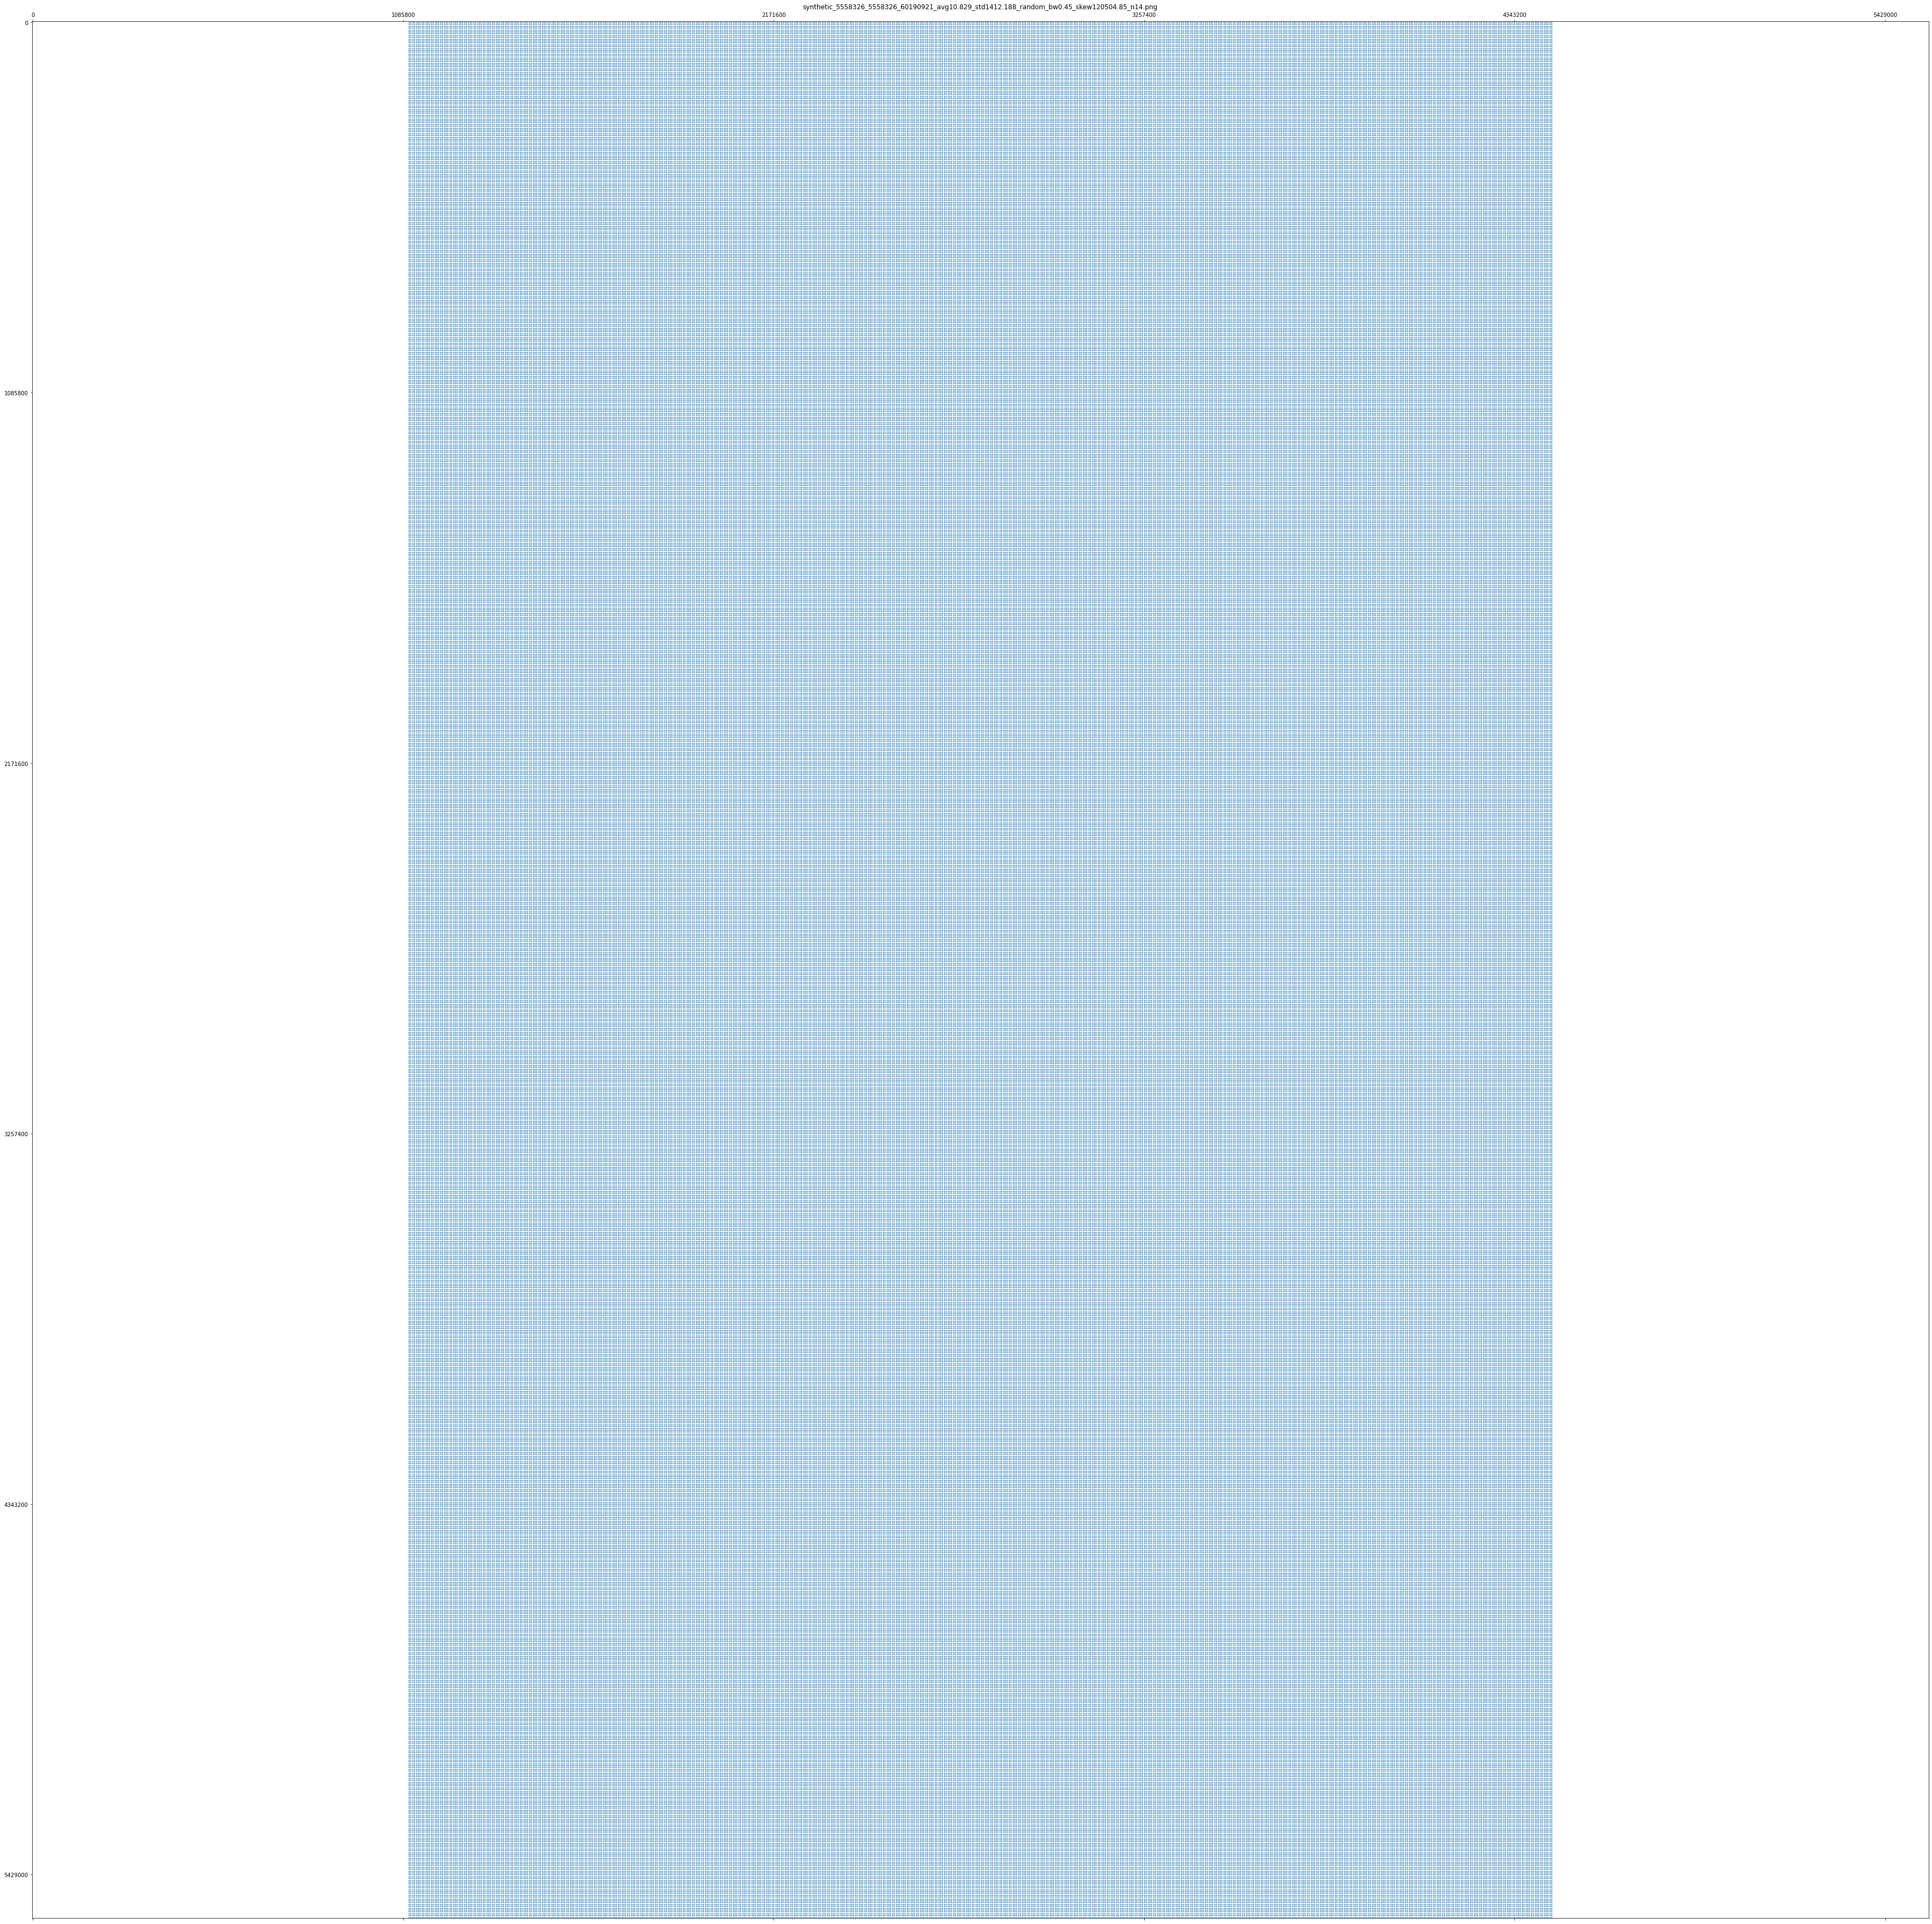

>>> Took me 2.993 seconds to plot and save image of matrix


CPU times: user 1h 57s, sys: 45.6 s, total: 1h 1min 42s
Wall time: 1h 5min 21s


In [12]:
%%time
filenames = [
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_4284_4284_9017780_avg2104.991_std764.374_random_bw1.0_skew20.33_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_21200_21200_1488681_avg70.221_std6.341_random_bw0.066_skew0.139_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_36417_36417_4343880_avg119.282_std31.869_random_bw0.13_skew0.71_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_38120_38120_14577949_avg382.423_std245.445_random_bw0.482_skew1.317_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_38744_38744_1768999_avg45.659_std31.436_random_bw0.029_skew1.755_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_42138_42138_3884671_avg92.189_std51.06_random_bw0.602_skew0.995_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_46835_46835_2372893_avg50.665_std27.766_random_bw0.186_skew1.861_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_62451_62451_4007810_avg64.175_std14.044_random_bw0.009_skew0.216_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_63838_63838_14150047_avg221.656_std96.326_random_bw0.866_skew14.444_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_66463_66463_10387201_avg156.285_std398.714_random_bw0.59_skew425.242_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_68121_68121_5407070_avg79.374_std1077.003_random_bw0.045_skew861.9_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_83334_83334_6011057_avg72.132_std19.105_random_bw0.07_skew0.123_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_121192_121192_2626755_avg21.674_std13.799_random_bw0.608_skew2.741_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_140874_140874_7813336_avg55.463_std11.085_random_bw0.046_skew0.839_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_161070_161070_8186221_avg50.824_std19.687_random_bw0.039_skew0.81_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_170998_170998_958305_avg5.604_std4.459_random_bw0.287_skew61.947_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_185639_185639_15011481_avg80.864_std117.762_random_bw0.188_skew7.187_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_206500_206500_1273294_avg6.166_std4.444_random_bw0.002_skew6.135_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_217918_217918_11619584_avg53.321_std4.756_random_bw0.059_skew2.371_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_268096_268096_18498642_avg69.0_std101.276_random_bw0.168_skew9.179_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_525825_525825_2104694_avg4.003_std0.078_random_bw0.001_skew0.001_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_862664_862664_19213423_avg22.272_std29.816_random_bw0.249_skew312.266_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_952203_952203_46522684_avg48.858_std11.947_random_bw0.204_skew0.576_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_986703_986703_71659094_avg72.625_std15.808_random_bw0.018_skew0.115_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_1000005_1000005_3170796_avg3.171_std25.563_random_bw0.147_skew1512.434_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_1382908_1382908_16945359_avg12.253_std37.522_random_bw0.021_skew632.78_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_1634989_1634989_19780430_avg12.098_std31.198_random_bw0.339_skew410.374_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_4690002_4690002_18769835_avg4.002_std1.183_random_bw0.001_skew288.024_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_5154859_5154859_99196687_avg19.243_std5.743_random_bw0.211_skew1.442_n14.mtx",
"/mnt/various/SpMV-Research/validation_matrices/v2_dgal/matrices/synthetic_5558326_5558326_60190921_avg10.829_std1412.188_random_bw0.45_skew120504.85_n14.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

# digital twins now (first, real matrices)

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/scircuit.mtx",
"/mnt/various/validation_matrices/mac_econ_fwd500.mtx",
"/mnt/various/validation_matrices/raefsky3.mtx",
"/mnt/various/validation_matrices/bbmat.mtx",
"/mnt/various/validation_matrices/conf5_4-8x8-15.mtx",
"/mnt/various/validation_matrices/mc2depi.mtx",
"/mnt/various/validation_matrices/rma10.mtx",
"/mnt/various/validation_matrices/cop20k_A.mtx",
"/mnt/various/validation_matrices/webbase-1M.mtx",
"/mnt/various/validation_matrices/cant.mtx",
"/mnt/various/validation_matrices/pdb1HYS.mtx",
"/mnt/various/validation_matrices/TSOPF_RS_b300_c3.mtx",
"/mnt/various/validation_matrices/Chebyshev4.mtx",
"/mnt/various/validation_matrices/consph.mtx",
"/mnt/various/validation_matrices/shipsec1.mtx",
"/mnt/various/validation_matrices/PR02R.mtx",
"/mnt/various/validation_matrices/mip1.mtx",
"/mnt/various/validation_matrices/rail4284.mtx",
"/mnt/various/validation_matrices/pwtk.mtx",
"/mnt/various/validation_matrices/crankseg_2.mtx",
"/mnt/various/validation_matrices/Si41Ge41H72.mtx",
"/mnt/various/validation_matrices/TSOPF_RS_b2383.mtx",
"/mnt/various/validation_matrices/in-2004.mtx",
"/mnt/various/validation_matrices/Ga41As41H72.mtx",
"/mnt/various/validation_matrices/eu-2005.mtx",
"/mnt/various/validation_matrices/wikipedia-20051105.mtx",
"/mnt/various/validation_matrices/rajat31.mtx",
"/mnt/various/validation_matrices/ldoor.mtx",
"/mnt/various/validation_matrices/circuit5M.mtx",
"/mnt/various/validation_matrices/bone010.mtx",
"/mnt/various/validation_matrices/cage15.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

---

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_scircuit_170998_170998_950086_diagonal_df0.005_seed_13.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_raefsky3_21200_21200_1477938_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_bbmat_38744_38744_1758250_diagonal_df0.005_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_conf5_4-8x8-15_49152_49152_1916928_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_rma10_46835_46835_2383899_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cop20k_A_121192_121192_2643139_diagonal_df0.005_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_webbase-1M_1000005_1000005_3079841_diagonal_df0.005_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cant_62451_62451_3973019_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pdb1HYS_36417_36417_4321056_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b300_c3_42138_42138_4393966_diagonal_df0.005_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Chebyshev4_68121_68121_5391103_diagonal_df0.005_seed_3.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_consph_83334_83334_5965043_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_shipsec1_140874_140874_7749299_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_PR02R_161070_161070_8130431_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_mip1_66463_66463_10386831_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_rail4284_4284_1096894_11294973_diagonal_df0.005_seed_4.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pwtk_217918_217918_11528534_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_crankseg_2_63838_63838_14139678_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Si41Ge41H72_185639_185639_14945031_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b2383_38120_38120_16109148_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Ga41As41H72_268096_268096_18358107_diagonal_df0.005_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_ldoor_952203_952203_46080696_diagonal_df0.005_seed_53.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_bone010_986703_986703_71196490_diagonal_df0.005_seed_0.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_scircuit_170998_170998_950086_diagonal_df0.5_seed_13.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_raefsky3_21200_21200_1477938_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_bbmat_38744_38744_1758250_diagonal_df0.5_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_conf5_4-8x8-15_49152_49152_1916928_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_rma10_46835_46835_2383899_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cop20k_A_121192_121192_2643139_diagonal_df0.5_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_webbase-1M_1000005_1000005_3079841_diagonal_df0.5_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cant_62451_62451_3973019_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pdb1HYS_36417_36417_4321056_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b300_c3_42138_42138_4393966_diagonal_df0.5_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Chebyshev4_68121_68121_5391103_diagonal_df0.5_seed_3.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_consph_83334_83334_5965043_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_shipsec1_140874_140874_7749299_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_PR02R_161070_161070_8130431_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_mip1_66463_66463_10386831_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_rail4284_4284_1096894_11294973_diagonal_df0.5_seed_4.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pwtk_217918_217918_11528534_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_crankseg_2_63838_63838_14139678_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Si41Ge41H72_185639_185639_14945031_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b2383_38120_38120_16109148_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Ga41As41H72_268096_268096_18358107_diagonal_df0.5_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_ldoor_952203_952203_46080696_diagonal_df0.5_seed_53.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_bone010_986703_986703_71196490_diagonal_df0.5_seed_0.mtx"
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

In [ ]:
%%time

filenames = [
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_scircuit_170998_170998_950086_random_seed_13.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_raefsky3_21200_21200_1477938_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_bbmat_38744_38744_1758250_random_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_conf5_4-8x8-15_49152_49152_1916928_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_rma10_46835_46835_2383899_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cop20k_A_121192_121192_2643139_random_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_webbase-1M_1000005_1000005_3079841_random_seed_2.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_cant_62451_62451_3973019_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pdb1HYS_36417_36417_4321056_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b300_c3_42138_42138_4393966_random_seed_1.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Chebyshev4_68121_68121_5391103_random_seed_3.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_consph_83334_83334_5965043_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_shipsec1_140874_140874_7749299_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_PR02R_161070_161070_8130431_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_mip1_66463_66463_10386831_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_rail4284_4284_1096894_11294973_random_seed_4.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_pwtk_217918_217918_11528534_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_crankseg_2_63838_63838_14139678_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Si41Ge41H72_185639_185639_14945031_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_TSOPF_RS_b2383_38120_38120_16109148_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_Ga41As41H72_268096_268096_18358107_random_seed_0.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_gamma_distribution_ldoor_952203_952203_46080696_random_seed_53.mtx",
"/mnt/various/validation_matrices/digital_twins/artificial_normal_distribution_bone010_986703_986703_71196490_random_seed_0.mtx",
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

---

In [ ]:
%%time

filenames = [
"/mnt/various/athena_ppopp_matrices/filtered/Ronis/xenon2.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Ronis/xenon2_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/PARSEC/Si41Ge41H72.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/PARSEC/Si41Ge41H72_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/Botonakis/thermomech_dK.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Botonakis/thermomech_dK_rcm.mtx",

"/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/Sandia/ASIC_680k.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Sandia/ASIC_680k_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/LAW/in-2004.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/LAW/in-2004_rcm.mtx",
    
"/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M.mtx",
"/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M_rcm.mtx",
    
"/mnt/various/exafoam_matrices/100K.mtx",
"/mnt/various/exafoam_matrices/100K_rcm.mtx",
    
"/mnt/various/exafoam_matrices/600K.mtx",
"/mnt/various/exafoam_matrices/600K_rcm.mtx"    
]

for filename in filenames:
    break
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

#     no longer needed ... 
#     spm_coo_rcm=reverse_cuthill_mckee_conversion(spm_coo, spm)
#     img_filename = filename.split("/")[-1].replace(".mtx","_rcm.png")
#     visualize_matrix(spm_coo_rcm, img_filename)

In [ ]:
%%time

filenames = [
    "/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M_sorted_1.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M_sorted_2.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M_sorted_3.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Freescale/circuit5M_sorted_4.mtx",

    "/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real_sorted_1.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real_sorted_2.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real_sorted_3.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Dziekonski/dielFilterV3real_sorted_4.mtx",

    "/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1_sorted_1.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1_sorted_2.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1_sorted_3.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/SNAP/soc-LiveJournal1_sorted_4.mtx",

    "/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105_sorted_1.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105_sorted_2.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105_sorted_3.mtx",
    "/mnt/various/athena_ppopp_matrices/filtered/Gleich/wikipedia-20051105_sorted_4.mtx"
]

for filename in filenames:
    break
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

In [ ]:
%%time

filenames = [
"/home/pmpakos/generated_matrices/synthetic_65536_65536_2407832_mu_32_std_32_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_2081984_mu_32_std_16_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_2064131_mu_32_std_8_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_1839685_mu_16_std_32_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_1187706_mu_16_std_16_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_1024643_mu_16_std_8_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_1688547_mu_8_std_32_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_903701_mu_8_std_16_random_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_577663_mu_8_std_8_random_seed_14.mtx",
]

for filename in filenames:
    break
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)

In [ ]:
%%time

filenames = [
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2407832_mu_32_std_32_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2407832_mu_32_std_32_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2407832_mu_32_std_32_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2407832_mu_32_std_32_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2081984_mu_32_std_16_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2081984_mu_32_std_16_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2081984_mu_32_std_16_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2081984_mu_32_std_16_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2064131_mu_32_std_8_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2064131_mu_32_std_8_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2064131_mu_32_std_8_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_2064131_mu_32_std_8_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1839685_mu_16_std_32_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1839685_mu_16_std_32_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1839685_mu_16_std_32_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1839685_mu_16_std_32_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1187706_mu_16_std_16_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1187706_mu_16_std_16_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1187706_mu_16_std_16_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1187706_mu_16_std_16_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1024643_mu_16_std_8_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1024643_mu_16_std_8_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1024643_mu_16_std_8_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1024643_mu_16_std_8_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1688547_mu_8_std_32_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1688547_mu_8_std_32_diagonal_df0.005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1688547_mu_8_std_32_diagonal_df0.05_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_1688547_mu_8_std_32_diagonal_df0.5_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_903701_mu_8_std_16_diagonal_df0.0005_seed_14.mtx",
# "/home/pmpakos/generated_matrices/synthetic_65536_65536_903701_mu_8_std_16_diagonal_df0.005_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_903701_mu_8_std_16_diagonal_df0.05_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_903701_mu_8_std_16_diagonal_df0.5_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_577663_mu_8_std_8_diagonal_df0.0005_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_577663_mu_8_std_8_diagonal_df0.005_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_577663_mu_8_std_8_diagonal_df0.05_seed_14.mtx",
"/home/pmpakos/generated_matrices/synthetic_65536_65536_577663_mu_8_std_8_diagonal_df0.5_seed_14.mtx"
]

for filename in filenames:
    spm_coo, spm = mmread_fun(filename)
    img_filename = filename.split("/")[-1].replace(".mtx",".png")
    visualize_matrix(spm_coo, img_filename)